# Сборный проект - 1
## Выявление закономерностей, определяющих успешность игр.

### Описание проекта

Интернет-магазин «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Необходимо выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Есть данные до 2016 года. Планируется кампания на 2017-й. Нужно отработать принцип работы с данными.

Аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Описание данных

- **Name** — название игр
- **Platform** — платформа
- **Year_of_Release** — год выпуска
- **Genre** — жанр игры
- **NA_sales** — продажи в Северной Америке (миллионы проданных копий)
- **EU_sales** — продажи в Европе (миллионы проданных копий)
- **JP_sales** — продажи в Японии (миллионы проданных копий)
- **Other_sales** — продажи в других странах (миллионы проданных копий)
- **Critic_Score** — оценка критиков (максимум 100)
- **User_Score** — оценка пользователей (максимум 10)
- **Rating** — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.


### <a id="content"><a>Содержание проекта:


- #### <a href='#step1'>Шаг 1. Открытие и изучение данных</a>
- #### <a href='#step2'>Шаг 2. Предобработка данных</a>
    - <a href='#step2.1'>2.1 Изменение названий столбцов</a>
    - <a href='#step2.2'>2.2 Обработка пропусков и изменение типов данных</a>
        - <a href='#step2.2.1'>2.2.1 Обработка значений столбца "name"</a>
        - <a href='#step2.2.2'>2.2.2 Обработка значений столбца "platform"</a>
        - <a href='#step2.2.3'>2.2.3 Обработка значений столбца "year_of_release"</a>
        - <a href='#step2.2.4'>2.2.4 Обработка значений столбца "genre"</a>
        - <a href='#step2.2.5'>2.2.5 Обработка значений столбца "na_sales"</a>
        - <a href='#step2.2.6'>2.2.6 Обработка значений столбца "eu_sales"</a>
        - <a href='#step2.2.7'>2.2.7 Обработка значений столбца "jp_sales"</a>
        - <a href='#step2.2.8'>2.2.8 Обработка значений столбца "other_sales"</a>
        - <a href='#step2.2.9'>2.2.9 Обработка значений столбца "critic_score"</a>
        - <a href='#step2.2.10'>2.2.10 Обработка значений столбца "user_score"</a>
        - <a href='#step2.2.11'>2.2.11 Обработка значений столбца "rating"</a>
    - <a href='#step2.3'>2.3 Необходимые расчеты</a>
    - <a href='#conclution2'>Общий вывод по шагу 2:</a>
- #### <a href='#step3'>Шаг 3. Исследовательский анализ данных</a>
    - <a href='#step3.1'>3.1 Количество игр, выпущенных в разные годы</a>
    - <a href='#step3.2'>3.2 Изменение продаж по платформам</a>
    - <a href='#step3.3'>3.3 Определение актуального периода и срез данных по данному периоду</a>
    - <a href='#step3.4'>3.4 Выбор потенциально прибыльных платформ</a>
    - <a href='#step3.5'>3.5 Глобальные продажи игр в разбивке по платформам</a>
    - <a href='#step3.6'>3.6 Влияние отзывов на продажи для топовых платформ</a>
    - <a href='#step3.7'>3.7 Распределение игр по жанрам</a>
    - <a href='#conclution3'>Общий вывод по шагу 3:</a>
- #### <a href='#step4'>Шаг 4. Портрет пользователя каждого региона</a>
    - <a href='#conclution4'>Общий вывод по шагу 4:</a>
- #### <a href='#step5'>Шаг 5. Проверка гипотез</a>
    - <a href='#step5.1'>5.1 Сравнение пользовательских рейтингов платформ Xbox One и PC</a>
    - <a href='#step5.2'>5.2 Средние пользовательские рейтинги жанров Action и Sports разные.</a>
- #### <a href='#step6'>Шаг 6. Общий вывод</a>

## <a id="step1"><a>Шаг 1. Открытие и изучение данных

###### Подключение необходимых библиотек

In [1]:
import pandas as pd
from textwrap import dedent
from IPython import get_ipython
from IPython.display import display
import random

import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt

import math
from datetime import datetime
import numpy as np
import scipy.stats as st

import warnings
warnings.filterwarnings('ignore')

###### Загрузка таблицы, вывод общих данных и первых 20 строк

In [2]:
# Сохранение таблицы с исходными данными:
games_data = pd.read_csv('/datasets/games.csv')

# Вывод обще информации по таблице:
display(games_data.info())

# Вывод первых 20 строк таблицы:
games_data.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

Name Platform  Year_of_Release  \
0                                     Wii Sports      Wii           2006.0   
1                              Super Mario Bros.      NES           1985.0   
2                                 Mario Kart Wii      Wii           2008.0   
3                              Wii Sports Resort      Wii           2009.0   
4                       Pokemon Red/Pokemon Blue       GB           1996.0   
5                                         Tetris       GB           1989.0   
6                          New Super Mario Bros.       DS           2006.0   
7                                       Wii Play      Wii           2006.0   
8                      New Super Mario Bros. Wii      Wii           2009.0   
9                                      Duck Hunt      NES           1984.0   
10                                    Nintendogs       DS           2005.0   
11                                 Mario Kart DS       DS           2005.0   
12                   Pokemon Gold/Pokemon Silver       GB           1999.0   
13                                       Wii Fit      Wii           2007.0   
14                            Kinect Adventures!     X360           2010.0   
15                                  Wii Fit Plus      Wii           2009.0   
16                            Grand Theft Auto V      PS3           2013.0   
17                 Grand Theft Auto: San Andreas      PS2           2004.0   
18                             Super Mario World     SNES           1990.0   
19  Brain Age: Train Your Brain in Minutes a Day       DS           2005.0   

           Genre  NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score  \
0         Sports     41.36     28.96      3.77         8.45          76.0   
1       Platform     29.08      3.58      6.81         0.77           NaN   
2         Racing     15.68     12.76      3.79         3.29          82.0   
3         Sports     15.61     10.93      3.28         2.95          80.0   
4   Role-Playing     11.27      8.89     10.22         1.00           NaN   
5         Puzzle     23.20      2.26      4.22         0.58           NaN   
6       Platform     11.28      9.14      6.50         2.88          89.0   
7           Misc     13.96      9.18      2.93         2.84          58.0   
8       Platform     14.44      6.94      4.70         2.24          87.0   
9        Shooter     26.93      0.63      0.28         0.47           NaN   
10    Simulation      9.05     10.95      1.93         2.74           NaN   
11        Racing      9.71      7.47      4.13         1.90          91.0   
12  Role-Playing      9.00      6.18      7.20         0.71           NaN   
13        Sports      8.92      8.03      3.60         2.15          80.0   
14          Misc     15.00      4.89      0.24         1.69          61.0   
15        Sports      9.01      8.49      2.53         1.77          80.0   
16        Action      7.02      9.09      0.98         3.96          97.0   
17        Action      9.43      0.40      0.41        10.57          95.0   
18      Platform     12.78      3.75      3.54         0.55           NaN   
19          Misc      4.74      9.20      4.16         2.04          77.0   

   User_Score Rating  
0           8      E  
1         NaN    NaN  
2         8.3      E  
3           8      E  
4         NaN    NaN  
5         NaN    NaN  
6         8.5      E  
7         6.6      E  
8         8.4      E  
9         NaN    NaN  
10        NaN    NaN  
11        8.6      E  
12        NaN    NaN  
13        7.7      E  
14        6.3      E  
15        7.4      E  
16        8.2      M  
17          9      M  
18        NaN    NaN  
19        7.9      E

### Вывод:

- **Названия столбцов**: в названиях столбцов использован разный регистр - для удобства работы лучше привести все к нижнему регистру
- **Наличие пропусков**: во многих столбцах обнаружены пропуски, в некоторых число пропусков очень большое - до половины значений отсутствуют;
- **Предположение о причине проявления**: большая часть пропусков в столбцах с отзывами пользователей, критиков, а также в столбце с данными о возрастной категории. По первым пяти сторокам таблицы можно предположить, что в основном, значения пропущены для одних и тех же игр. Эти игры были выпущены достаточно давно и могут не иметь информации об отзывах пользователей и критиков. Год основания организации Entertainment Software Rating Board - 1994, скорее всего не все игры, выпущенные до этого времени имеют рейтинг ESRB.
- **Типы данных**: наблюдается некоторое несоответствие типа данных с данными столбца: год выпуска и оценка пользователей имеют тип object.

<a href='#content'>К содержанию</a>

## <a id="step2"><a>Шаг 2. Предобработка данных

### <a id="step2.1"><a>2.1 Изменение названий столбцов

In [3]:
# Вывод списка названий столбцов:
games_data.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [4]:
# Приведение названий столбцов к нижнему регистру в цикле:
for i, column in reversed(list(enumerate(games_data))):
    games_data.rename(columns={column: column.lower()}, inplace=True)
    
# Проверка - вывод первых 5 строк таблицы:
games_data.head()

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

### <a id="step2.2"><a>2.2 Обработка пропусков и изменение типов данных

In [5]:
# Функция для создания ячки:
def create_cell(shell, text):
    payload = dict(
        source='set_next_input',
        text=text,
        replace=False,
    )
    shell.payload_manager.write_payload(payload, single=False)

# Функция для создания необходимых ячеек для каждого шага предобработки данных:
def generate_column_preprocess(data):
    shell = get_ipython()
    for i, column in reversed(list(enumerate(data))):
        
        
        create_cell(shell, dedent(
            '''
        <a href='#content'>*К содержанию*</a>
            '''
        ))
        create_cell(shell, dedent(
            '''
        * #### Изменение:
            '''
        ))
        create_cell(shell, dedent(
            '''
            #### Предварительный вывод:
            - **Пропущенные значения:** ...
            - **Возможные причины возникновения пропусков:** ...
            - **Способы обработки пропусков:** ...
            - **Аномальные значения:** ...
            - **Возможные причины возникновения аномальных значений:** ...
            - **Способ устранения аномальных значений:** ...
            - **Наличие дубликатов:** ...
            - **Тип данных:** ...
            '''
        ))
        create_cell(shell, dedent(
            f'''
            describe_and_plot(games_data,'{column}')
            '''
        
        ))
        create_cell(shell, dedent(
            '''
        * #### Числовые характеристики и график boxplot или другие характеристики (для типа "*object*"):
            '''
        ))
        create_cell(shell, dedent(
            f'''
            <a id="step2.2.{i+1}"><a>
            * ### 2.2.{i+1} Обработка значений столбца "{column}"
            '''
        ))

In [6]:
# Функция для вывода необходимой информации для предобработки данных в столбце:
def describe_and_plot(data, column):
    """
    Функция принимает на вход таблицу и значение столбца, по которому необходимо провести исследование.
    Действия функции:
        - Вычисление и вывод количества пропущенных значений;
        - Вычисление и вывод доли пропусков от общего числа значений в столбце;
        - Вывод основных числовых характеристик данных столбца;
        - Определение и вывод типа данных в столбце;
        - Для типа данных "object":
                                    - Вычисление и вывод количества уникальных значений;
                                    - Вычисление и вывод количества дубликатов;
                                    - Вывод первых 10 строк;
        - Для других типов данных:
                                    - Построение графика boxplot().
    """
    
    print ('Пропущенные значения:', data[column].isna().sum())
    na_part = data[column].isna().sum() / data[column].shape[0]
    print ('Доля пропущенных значений: {:.2%}'.format(na_part))
    display(data[column].describe())
    print ('Тип данных:', data[column].dtype)
    print ()
    if data[column].dtype == 'object':
        print ('Количество уникальных значений:', len(data[column].unique()))
        print ()
        print ('Наличие дубликатов:', data[column].duplicated().sum())
        print ()
        display (data.head(10))
              
    else:
        plt.figure(figsize=(15, 5), dpi = 200)
        ax = sns.boxplot(data[column])
        ax.set_title('График boxplot для ' + column, fontdict = {'fontsize': 15})
        plt.show()

In [7]:
# Вызов функции "generate_column_preprocess()" для создания необходимых ячеек для раздела "Предобработка данных"
#generate_column_preprocess(games_data)


<a id="step2.2.1"><a>
* ### 2.2.1 Обработка значений столбца "name"



* #### Числовые характеристики и график boxplot или другие характеристики (для типа "*object*"):


In [8]:

describe_and_plot(games_data,'name')


Пропущенные значения: 2
Доля пропущенных значений: 0.01%


count                           16713
unique                          11559
top       Need for Speed: Most Wanted
freq                               12
Name: name, dtype: object

Тип данных: object

Количество уникальных значений: 11560

Наличие дубликатов: 5155



name platform  year_of_release         genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros.      NES           1985.0      Platform   
2             Mario Kart Wii      Wii           2008.0        Racing   
3          Wii Sports Resort      Wii           2009.0        Sports   
4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                     Tetris       GB           1989.0        Puzzle   
6      New Super Mario Bros.       DS           2006.0      Platform   
7                   Wii Play      Wii           2006.0          Misc   
8  New Super Mario Bros. Wii      Wii           2009.0      Platform   
9                  Duck Hunt      NES           1984.0       Shooter   

   na_sales  eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     41.36     28.96      3.77         8.45          76.0          8      E  
1     29.08      3.58      6.81         0.77           NaN        NaN    NaN  
2     15.68     12.76      3.79         3.29          82.0        8.3      E  
3     15.61     10.93      3.28         2.95          80.0          8      E  
4     11.27      8.89     10.22         1.00           NaN        NaN    NaN  
5     23.20      2.26      4.22         0.58           NaN        NaN    NaN  
6     11.28      9.14      6.50         2.88          89.0        8.5      E  
7     13.96      9.18      2.93         2.84          58.0        6.6      E  
8     14.44      6.94      4.70         2.24          87.0        8.4      E  
9     26.93      0.63      0.28         0.47           NaN        NaN    NaN

In [9]:
# Вывод строк с пропусками в столбце "name":
games_data.query('name.isna() == True')

name platform  year_of_release genre  na_sales  eu_sales  jp_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       other_sales  critic_score user_score rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN


#### Предварительный вывод:
- **Пропущенные значения:** обнаружено 2 пропущенных значения
- **Возможные причины возникновения пропусков:** ???
- **Способы обработки пропусков:** удалить данные строки, как неинформативные
- **Аномальные значения:** не обнаружено
- **Наличие дубликатов:** обнаружено большое количество дубликатов - это говорит о том, что возможно, некоторые игры перевыпускались в разные годы под одним названием, либо некоторые строки действительно являются дубликатами - проверим это в конце раздела по обработке данных
- **Тип данных:** *object* соответствует значениям столбца



* #### Изменение:


In [10]:
# Удаление сторок с пропусками в столбце "name":
games_data.dropna(subset = ['name'], inplace = True)

# Проверка на наличеи пропусков:
games_data['name'].isna().sum()

0


<a href='#content'>*К содержанию*</a>



<a id="step2.2.2"><a>
* ### 2.2.2 Обработка значений столбца "platform"



* #### Числовые характеристики и график boxplot или другие характеристики (для типа "*object*"):


In [11]:

describe_and_plot(games_data,'platform')


Пропущенные значения: 0
Доля пропущенных значений: 0.00%


count     16713
unique       31
top         PS2
freq       2161
Name: platform, dtype: object

Тип данных: object

Количество уникальных значений: 31

Наличие дубликатов: 16682



name platform  year_of_release         genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros.      NES           1985.0      Platform   
2             Mario Kart Wii      Wii           2008.0        Racing   
3          Wii Sports Resort      Wii           2009.0        Sports   
4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                     Tetris       GB           1989.0        Puzzle   
6      New Super Mario Bros.       DS           2006.0      Platform   
7                   Wii Play      Wii           2006.0          Misc   
8  New Super Mario Bros. Wii      Wii           2009.0      Platform   
9                  Duck Hunt      NES           1984.0       Shooter   

   na_sales  eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     41.36     28.96      3.77         8.45          76.0          8      E  
1     29.08      3.58      6.81         0.77           NaN        NaN    NaN  
2     15.68     12.76      3.79         3.29          82.0        8.3      E  
3     15.61     10.93      3.28         2.95          80.0          8      E  
4     11.27      8.89     10.22         1.00           NaN        NaN    NaN  
5     23.20      2.26      4.22         0.58           NaN        NaN    NaN  
6     11.28      9.14      6.50         2.88          89.0        8.5      E  
7     13.96      9.18      2.93         2.84          58.0        6.6      E  
8     14.44      6.94      4.70         2.24          87.0        8.4      E  
9     26.93      0.63      0.28         0.47           NaN        NaN    NaN

In [12]:
# Вывод уникальных значений столбца "platform" с числом их повторений:
games_data['platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
WS         6
SCD        6
3DO        3
TG16       2
PCFX       1
GG         1
Name: platform, dtype: int64


#### Предварительный вывод:
- **Пропущенные значения:** не обнаружено
- **Аномальные значения:** обнаружены платформы, на которых выходило очень мало игр
- **Возможные причины возникновения аномальных значений:** скорее всего, это модификации других платформ, которые не пользовались спросом, поэтому для них было выпущено малое количество игр, либо, для них подходили игры других платформ.
- **Способ устранения аномальных значений:** оставим
- **Наличие дубликатов:** наличие дубликотов говорит о том, что многие игры выходят на одной платформе, что логично
- **Тип данных:** *object* - соответствует значениям столбца



<a href='#content'>*К содержанию*</a>



<a id="step2.2.3"><a>
* ### 2.2.3 Обработка значений столбца "year_of_release"



* #### Числовые характеристики и график boxplot или другие характеристики (для типа "*object*"):


Пропущенные значения: 269
Доля пропущенных значений: 1.61%


count    16444.000000
mean      2006.486256
std          5.875525
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year_of_release, dtype: float64

Тип данных: float64



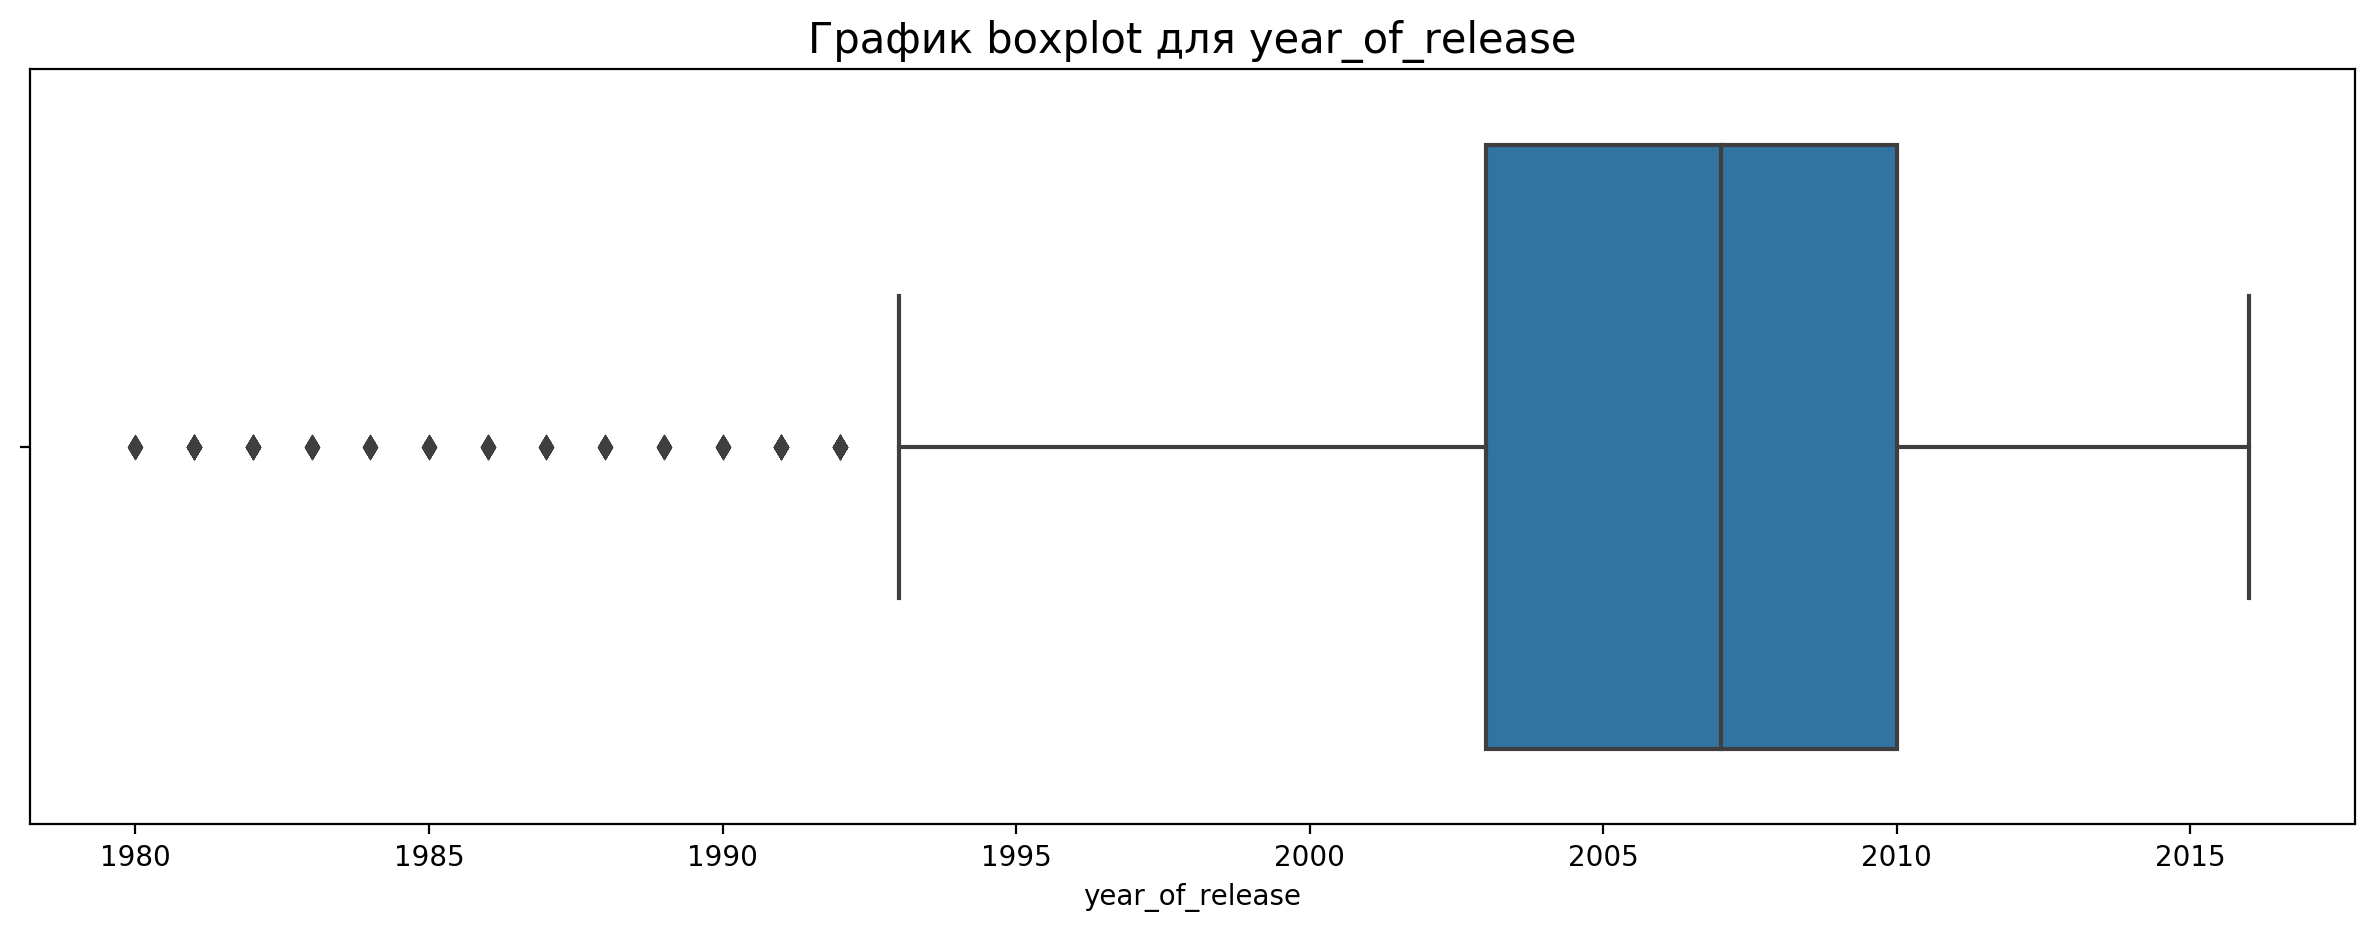

In [13]:

describe_and_plot(games_data,'year_of_release')


In [14]:
# Вывод первых 10 строк по срезу с условием 'year_of_release.isna() == True':
games_data.query('year_of_release.isna() == True').head(10)

name platform  year_of_release  \
183                              Madden NFL 2004      PS2              NaN   
377                             FIFA Soccer 2004      PS2              NaN   
456                   LEGO Batman: The Videogame      Wii              NaN   
475                   wwe Smackdown vs. Raw 2006      PS2              NaN   
609                               Space Invaders     2600              NaN   
627                                    Rock Band     X360              NaN   
657     Frogger's Adventures: Temple of the Frog      GBA              NaN   
678  LEGO Indiana Jones: The Original Adventures      Wii              NaN   
719                               Call of Duty 3      Wii              NaN   
805                                    Rock Band      Wii              NaN   

         genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
183     Sports      4.26      0.26      0.01         0.71          94.0   
377     Sports      0.59      2.36      0.04         0.51          84.0   
456     Action      1.80      0.97      0.00         0.29          74.0   
475   Fighting      1.57      1.02      0.00         0.41           NaN   
609    Shooter      2.36      0.14      0.00         0.03           NaN   
627       Misc      1.93      0.33      0.00         0.21          92.0   
657  Adventure      2.15      0.18      0.00         0.07          73.0   
678     Action      1.51      0.61      0.00         0.21          78.0   
719    Shooter      1.17      0.84      0.00         0.23          69.0   
805       Misc      1.33      0.56      0.00         0.20          80.0   

    user_score rating  
183        8.5      E  
377        6.4      E  
456        7.9   E10+  
475        NaN    NaN  
609        NaN    NaN  
627        8.2      T  
657        tbd      E  
678        6.6   E10+  
719        6.7      T  
805        6.3      T


#### Предварительный вывод:
- **Пропущенные значения:** обнаружено 269 пропущенных значений
- **Возможные причины возникновения пропусков:** для некоторых значений пропуски могут быть связаны с тем, что год указан в названии игры, либо для одной игры, выпустившейся для разных платформ, год указан только для игры для одной из платформ. Возможна ошибка выгрузки данных.
- **Способы обработки пропусков:** в названиях некоторых игр указан год, в этом случае, можно заполнить пропуск этим значением
- **Аномальные значения:** по графику *boxplot* видно, что есть игры, которые не входят в размах "усов"
- **Возможные причины возникновения аномальных значений:** это связано с тем, что изначально количество выпускающихся игр было мало
- **Способ устранения аномальных значений:** оставим
- **Тип данных:** *float64* - логично привести данные к типу *DateTime*, но так же подойдет и *int64*

**Примечание:** при дальнейшем исследовании было обнаружено, что для некоторых платформ выпуск некоторых игр происходил значительно раньше, по сравнению с основной массой. Поэтому, необходимо выявить для каких игр год выпуска на конкретной платформе "выбивается", какие игры были выпущены до появления платформы. А так же добавить условие для предотвращения появления таких значений при заполнении пропусков.


* #### Изменение:


In [15]:
# Функция для визуализации диапазонов, во время которых игры выпускались для каждой платформы:
def heatmap_platform_year(data):
    """
    Функция принимает на вход таблицу с данными.
    Действия функции:
    - Создание сводной таблицы с годом выпуска в качестве индексов, названиями платформ в качестве столбцов и
      суммарным количеством игр для каждой платформы и года в качаестве данных;
    - Построение графика типа "heatmap" для сводной таблицы
    """
    # Сводная таблица:
    platform_summary = data.pivot_table(index = 'year_of_release', columns = 'platform',
                                          values = 'name', aggfunc = 'count')
    
    # Построение графика:
    plt.figure(figsize=(10, 5), dpi = 200)
    
    ax = sns.heatmap(platform_summary, linewidths=.5, linecolor='black')
    ax.set_title('Количество игр, выходивших на платформах в разные годы ', fontdict = {'fontsize': 10})

    plt.show()
    plt.close()

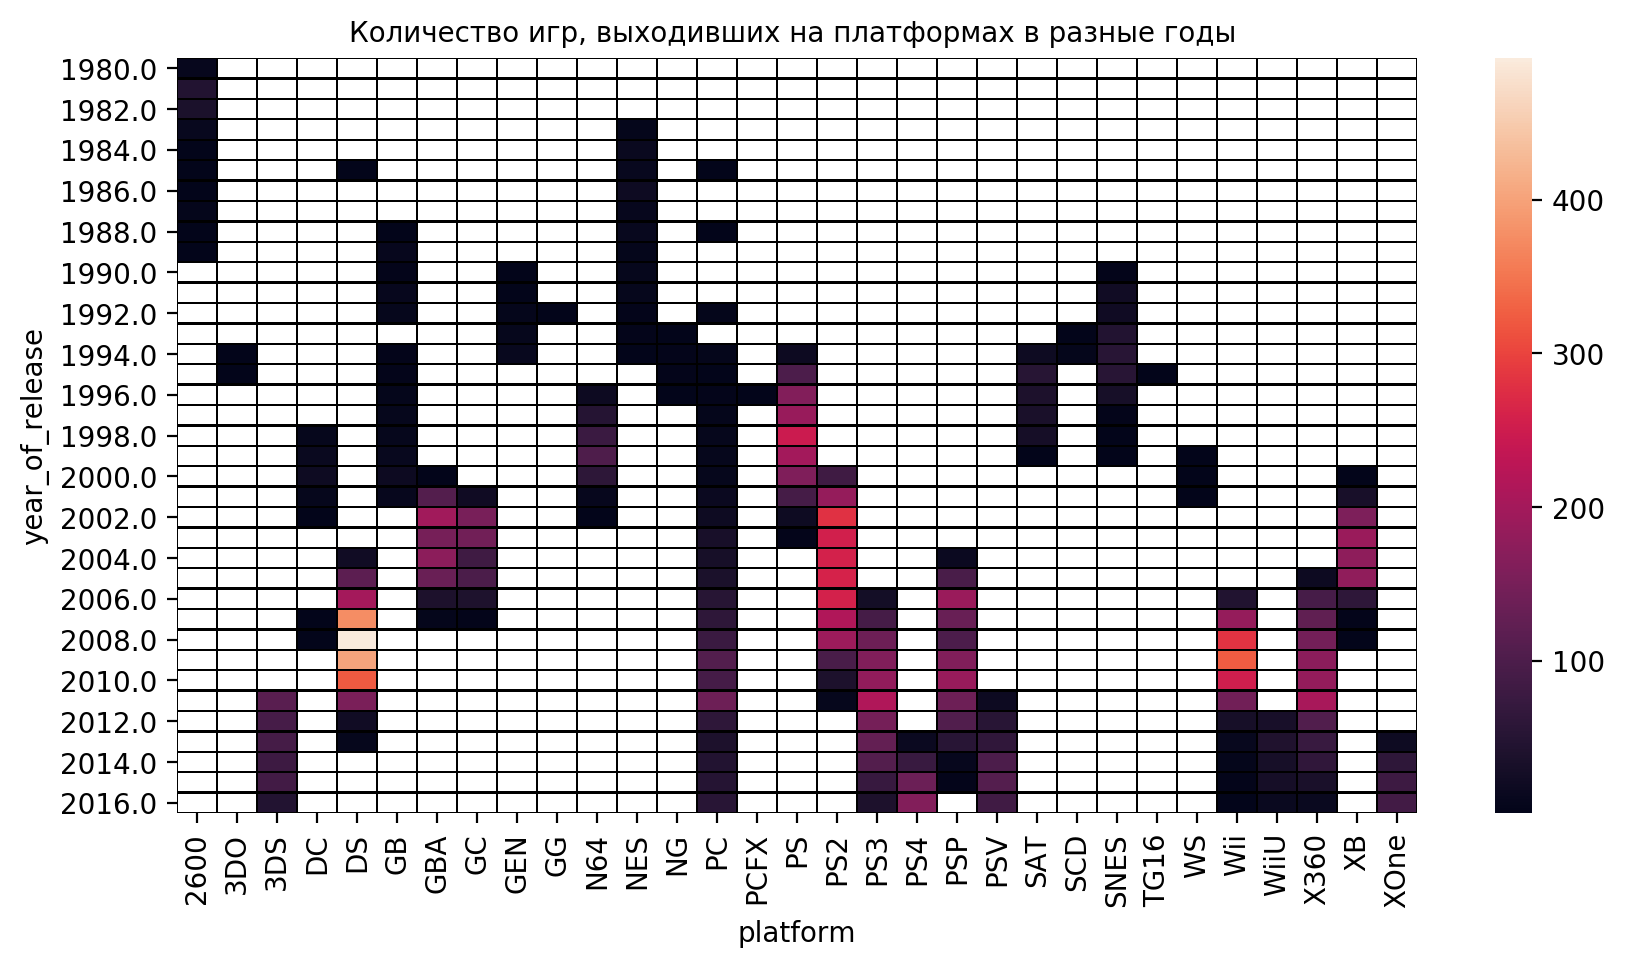

In [16]:
# Вызов функции "heatmap_platform_year()" для таблицы "games_data":
heatmap_platform_year(games_data)

По полученной таблице видно, что есть несколько игровых платформ с нехарактерными перерывами выпуска игр в несколько лет: "DC", "DS", "PC"


In [17]:
# Вывод срезов указанных выше платформ по "выбивающимся" годам:
display(games_data.query('platform in "DC"  & year_of_release > 2006 '))
display(games_data.query('platform in "DS"  & year_of_release < 1986 '))
display(games_data.query('platform in "PC"  & year_of_release < 1995 ').sort_values(by = 'year_of_release'))

name platform  year_of_release      genre  \
14006  Pia Carrot e Youkoso!! 2.5       DC           2008.0  Adventure   
15997        Triggerheart Exelica       DC           2007.0    Shooter   

       na_sales  eu_sales  jp_sales  other_sales  critic_score user_score  \
14006       0.0       0.0      0.04          0.0           NaN        NaN   
15997       0.0       0.0      0.02          0.0           NaN        NaN   

      rating  
14006    NaN  
15997    NaN

name platform  year_of_release   genre  \
15957  Strongest Tokyo University Shogi DS       DS           1985.0  Action   

       na_sales  eu_sales  jp_sales  other_sales  critic_score user_score  \
15957       0.0       0.0      0.02          0.0           NaN        NaN   

      rating  
15957    NaN

name platform  year_of_release       genre  \
14470                Alter Ego       PC           1985.0  Simulation   
14621                  SimCity       PC           1988.0  Simulation   
769               SimCity 2000       PC           1992.0  Simulation   
2612             The 7th Guest       PC           1992.0   Adventure   
12650                Syndicate       PC           1992.0    Strategy   
14610                     Doom       PC           1992.0     Shooter   
15692            Empire Deluxe       PC           1992.0    Strategy   
354     Doom II: Hell on Earth       PC           1994.0     Shooter   
521                       Myst       PC           1994.0   Adventure   
658                   Monopoly       PC           1994.0        Misc   
806    Warcraft: Orcs & Humans       PC           1994.0    Strategy   
876     Star Wars: Dark Forces       PC           1994.0     Shooter   
15551            Mortal Kombat       PC           1994.0    Fighting   

       na_sales  eu_sales  jp_sales  other_sales  critic_score user_score  \
14470      0.00      0.03       0.0         0.01          59.0        5.8   
14621      0.00      0.02       0.0         0.01          64.0        2.2   
769        1.20      0.84       0.0         0.10           NaN        NaN   
2612       0.02      0.77       0.0         0.00           NaN        NaN   
12650      0.00      0.05       0.0         0.01           NaN        NaN   
14610      0.02      0.00       0.0         0.00          85.0        8.2   
15692      0.02      0.00       0.0         0.00           NaN        NaN   
354        2.05      1.40       0.0         0.16           NaN        NaN   
521        0.02      2.79       0.0         0.00           NaN        NaN   
658        1.49      0.81       0.0         0.10           NaN        NaN   
806        0.89      1.08       0.0         0.11           NaN        NaN   
876        1.09      0.77       0.0         0.09           NaN        NaN   
15551      0.02      0.00       0.0         0.00           NaN        NaN   

      rating  
14470      T  
14621   E10+  
769      NaN  
2612       T  
12650    NaN  
14610      M  
15692    NaN  
354      NaN  
521      NaN  
658      NaN  
806      NaN  
876      NaN  
15551    NaN

- **"DC":** основные игры выходилы в период с 1998 по 2004 г.г., однако две игры вышли в 2007 и 2008 г.г. - данная ситуация возможна - выпуск игр для узкого круга, например, для коллекционеров
- **"DS":** выделяется игра с годом выпуска 1985 г. И хотя, можно найти информацию о том, что данная платформа была выпущена в 2004 г (основной выпуск игр по предоставленным данным так же начинается с этого года), данные по году выпуска конкретной игры разнятся: указан 1985 и 2005 г.г. С учетом года выпуска платформы, заменим год на 2005
- **"PC":** в данном случае перерывы в несколько лет в выпуске игр в ранние году связаны с назначением "PC" - это не узконаправленная игровая консоль и выпуск игр - это одно из направлений развития.

In [18]:
# Замена некорректного значения года выпуска:
games_data.loc[games_data['name'] == "Strongest Tokyo University Shogi DS", 'year_of_release'] = 2005

In [19]:
#Создание таблицы с минимальным, максимальным значениями и медианой для каждой платформы:
platform_limits = games_data.pivot_table(index = 'platform', values = 'year_of_release',
                                         aggfunc = ['min', 'median', 'max']).reset_index()

#Переименование столбцов:
platform_limits.columns = ['platform', 'min_year', 'median_year', 'max_year']

# Довабление полученной таблицы к основной по значениям в столбце "platform" (для дальнейшей проверки и
# заполнения пропусков):
games_data = games_data.merge(platform_limits, on = 'platform', how = 'left')

# Проверка соединения таблиц - вывод первых 10 строк:
games_data.head(10)

name platform  year_of_release         genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros.      NES           1985.0      Platform   
2             Mario Kart Wii      Wii           2008.0        Racing   
3          Wii Sports Resort      Wii           2009.0        Sports   
4   Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                     Tetris       GB           1989.0        Puzzle   
6      New Super Mario Bros.       DS           2006.0      Platform   
7                   Wii Play      Wii           2006.0          Misc   
8  New Super Mario Bros. Wii      Wii           2009.0      Platform   
9                  Duck Hunt      NES           1984.0       Shooter   

   na_sales  eu_sales  jp_sales  other_sales  critic_score user_score rating  \
0     41.36     28.96      3.77         8.45          76.0          8      E   
1     29.08      3.58      6.81         0.77           NaN        NaN    NaN   
2     15.68     12.76      3.79         3.29          82.0        8.3      E   
3     15.61     10.93      3.28         2.95          80.0          8      E   
4     11.27      8.89     10.22         1.00           NaN        NaN    NaN   
5     23.20      2.26      4.22         0.58           NaN        NaN    NaN   
6     11.28      9.14      6.50         2.88          89.0        8.5      E   
7     13.96      9.18      2.93         2.84          58.0        6.6      E   
8     14.44      6.94      4.70         2.24          87.0        8.4      E   
9     26.93      0.63      0.28         0.47           NaN        NaN    NaN   

   min_year  median_year  max_year  
0    2006.0       2009.0    2016.0  
1    1983.0       1986.5    1994.0  
2    2006.0       2009.0    2016.0  
3    2006.0       2009.0    2016.0  
4    1988.0       1997.0    2001.0  
5    1988.0       1997.0    2001.0  
6    2004.0       2008.0    2013.0  
7    2006.0       2009.0    2016.0  
8    2006.0       2009.0    2016.0  
9    1983.0       1986.5    1994.0

In [20]:
# Функция для заполнения пропуска в годе выпуска значением из названия игры:
def year_from_name(row):
    """
    Функция принимает на вход строку, с пропуском в столбце "year_of_release" из таблицы.
    Действия функции:
    - Проверка наличия значения года из диапазана (1980, 2016) в названии игры
    - При совпадении - заполнение пропуска значением
    - Возврат строки
    """
    for i in range(1980, 2016):
        year = str(i)
        if year in row['name']:
            row['year_of_release'] = i
    return (row)

In [21]:
# Применение функции "year_from_name()" для каждой строки таблицы с пропуском в столбце "name":
games_data.loc[games_data['year_of_release'].isna() == True] = (games_data
                                                                .loc[games_data['year_of_release'].isna() == True]
                                                                .apply(year_from_name, axis = 1)
                                                               )

# Проверка заполнения пропусков - количество оставшихся пропусков:
games_data['year_of_release'].isna().sum()

252

In [22]:
# Вывод уникальных значений столбца "name" с пропусками в "year_of_release" с числом их повторений: 
games_data.query('year_of_release.isna() == True')['name'].value_counts()

LEGO Harry Potter: Years 5-7                          7
Rock Band                                             4
Happy Feet Two                                        4
Test Drive Unlimited 2                                3
WRC: FIA World Rally Championship                     3
                                                     ..
Monster Hunter 2                                      1
The Chronicles of Riddick: Escape from Butcher Bay    1
College Hoops 2K6                                     1
Tropico 4                                             1
Def Jam: Fight for NY                                 1
Name: name, Length: 218, dtype: int64

In [23]:
# Вывод среза с условием 'name == "LEGO Harry Potter: Years 5-7"':
games_data.query('name == "LEGO Harry Potter: Years 5-7"')

name platform  year_of_release   genre  \
1608  LEGO Harry Potter: Years 5-7      Wii              NaN  Action   
2131  LEGO Harry Potter: Years 5-7     X360              NaN  Action   
2272  LEGO Harry Potter: Years 5-7      PS3              NaN  Action   
3080  LEGO Harry Potter: Years 5-7       DS              NaN  Action   
4817  LEGO Harry Potter: Years 5-7      3DS              NaN  Action   
6475  LEGO Harry Potter: Years 5-7      PSP              NaN  Action   
7209  LEGO Harry Potter: Years 5-7       PC              NaN  Action   
8058  LEGO Harry Potter: Years 5-7      PSV           2012.0  Action   

      na_sales  eu_sales  jp_sales  other_sales  critic_score user_score  \
1608      0.69      0.42       0.0         0.12          76.0        7.8   
2131      0.51      0.37       0.0         0.09          77.0        7.9   
2272      0.36      0.41       0.0         0.15          76.0        8.3   
3080      0.34      0.25       0.0         0.07          69.0        tbd   
4817      0.18      0.19       0.0         0.03          71.0        6.5   
6475      0.10      0.10       0.0         0.06           NaN        tbd   
7209      0.05      0.14       0.0         0.03          80.0        8.5   
8058      0.07      0.07       0.0         0.03          64.0        6.8   

     rating  min_year  median_year  max_year  
1608   E10+    2006.0       2009.0    2016.0  
2131   E10+    2005.0       2010.0    2016.0  
2272   E10+    2006.0       2011.0    2016.0  
3080   E10+    2004.0       2008.0    2013.0  
4817   E10+    2011.0       2013.0    2016.0  
6475   E10+    2004.0       2009.0    2015.0  
7209   E10+    1985.0       2010.0    2016.0  
8058   E10+    2011.0       2014.0    2016.0

In [24]:
# Функция для заполнения пропуска в годе выпуска по известному году выпуска игры на другой платформе:
def fill_year(data):
    names_list = data.query('year_of_release.isna() == True')['name'].unique()
    for i, name in reversed(list(enumerate(names_list))):
        year = data.query('name == @name')['year_of_release'].median()
        data.loc[data['name'] == name,
                 'year_of_release'] = data.loc[data['name'] == name, 'year_of_release'].fillna(year)
        
    return data

In [25]:
# Вызов функции "fill_year()" для таблицы "games_data"
games_data = fill_year(games_data)

# Проверка заполения пропусков - 
# вывод среза с условием 'name == "LEGO Harry Potter: Years 5-7"':
display(games_data.query('name == "LEGO Harry Potter: Years 5-7"'))

# Проверка количества пропусков:
games_data['year_of_release'].isna().sum()

name platform  year_of_release   genre  \
1608  LEGO Harry Potter: Years 5-7      Wii           2012.0  Action   
2131  LEGO Harry Potter: Years 5-7     X360           2012.0  Action   
2272  LEGO Harry Potter: Years 5-7      PS3           2012.0  Action   
3080  LEGO Harry Potter: Years 5-7       DS           2012.0  Action   
4817  LEGO Harry Potter: Years 5-7      3DS           2012.0  Action   
6475  LEGO Harry Potter: Years 5-7      PSP           2012.0  Action   
7209  LEGO Harry Potter: Years 5-7       PC           2012.0  Action   
8058  LEGO Harry Potter: Years 5-7      PSV           2012.0  Action   

      na_sales  eu_sales  jp_sales  other_sales  critic_score user_score  \
1608      0.69      0.42       0.0         0.12          76.0        7.8   
2131      0.51      0.37       0.0         0.09          77.0        7.9   
2272      0.36      0.41       0.0         0.15          76.0        8.3   
3080      0.34      0.25       0.0         0.07          69.0        tbd   
4817      0.18      0.19       0.0         0.03          71.0        6.5   
6475      0.10      0.10       0.0         0.06           NaN        tbd   
7209      0.05      0.14       0.0         0.03          80.0        8.5   
8058      0.07      0.07       0.0         0.03          64.0        6.8   

     rating  min_year  median_year  max_year  
1608   E10+    2006.0       2009.0    2016.0  
2131   E10+    2005.0       2010.0    2016.0  
2272   E10+    2006.0       2011.0    2016.0  
3080   E10+    2004.0       2008.0    2013.0  
4817   E10+    2011.0       2013.0    2016.0  
6475   E10+    2004.0       2009.0    2015.0  
7209   E10+    1985.0       2010.0    2016.0  
8058   E10+    2011.0       2014.0    2016.0

139

In [26]:
# Функция для проверки условия, что год выпуска соответствует характерному диапазону для указанной платформы,
# и заполнения оставшихся пропусков и "выбивающихся" значений медианным значением года выпуска по соответствующей
# платформе:
def fill_year_by_platform(row):
    """
    Функция принимает на вход строку таблицы.
    Действия функции:
        - Проверка наличия пропуска в годе выпуска и условия, что год лежит в характерном диапазоне;
        - Некорректный год и пропуск заполняняются медианным значением, соответствующей платформы;
        - Возврат строки
    """
    
    if not(row['min_year'] <= row['year_of_release'] <= row['max_year']) or (pd.isna(row['year_of_release'])):
        row['year_of_release'] = row['median_year']
    return row

Количество пропусков:  0


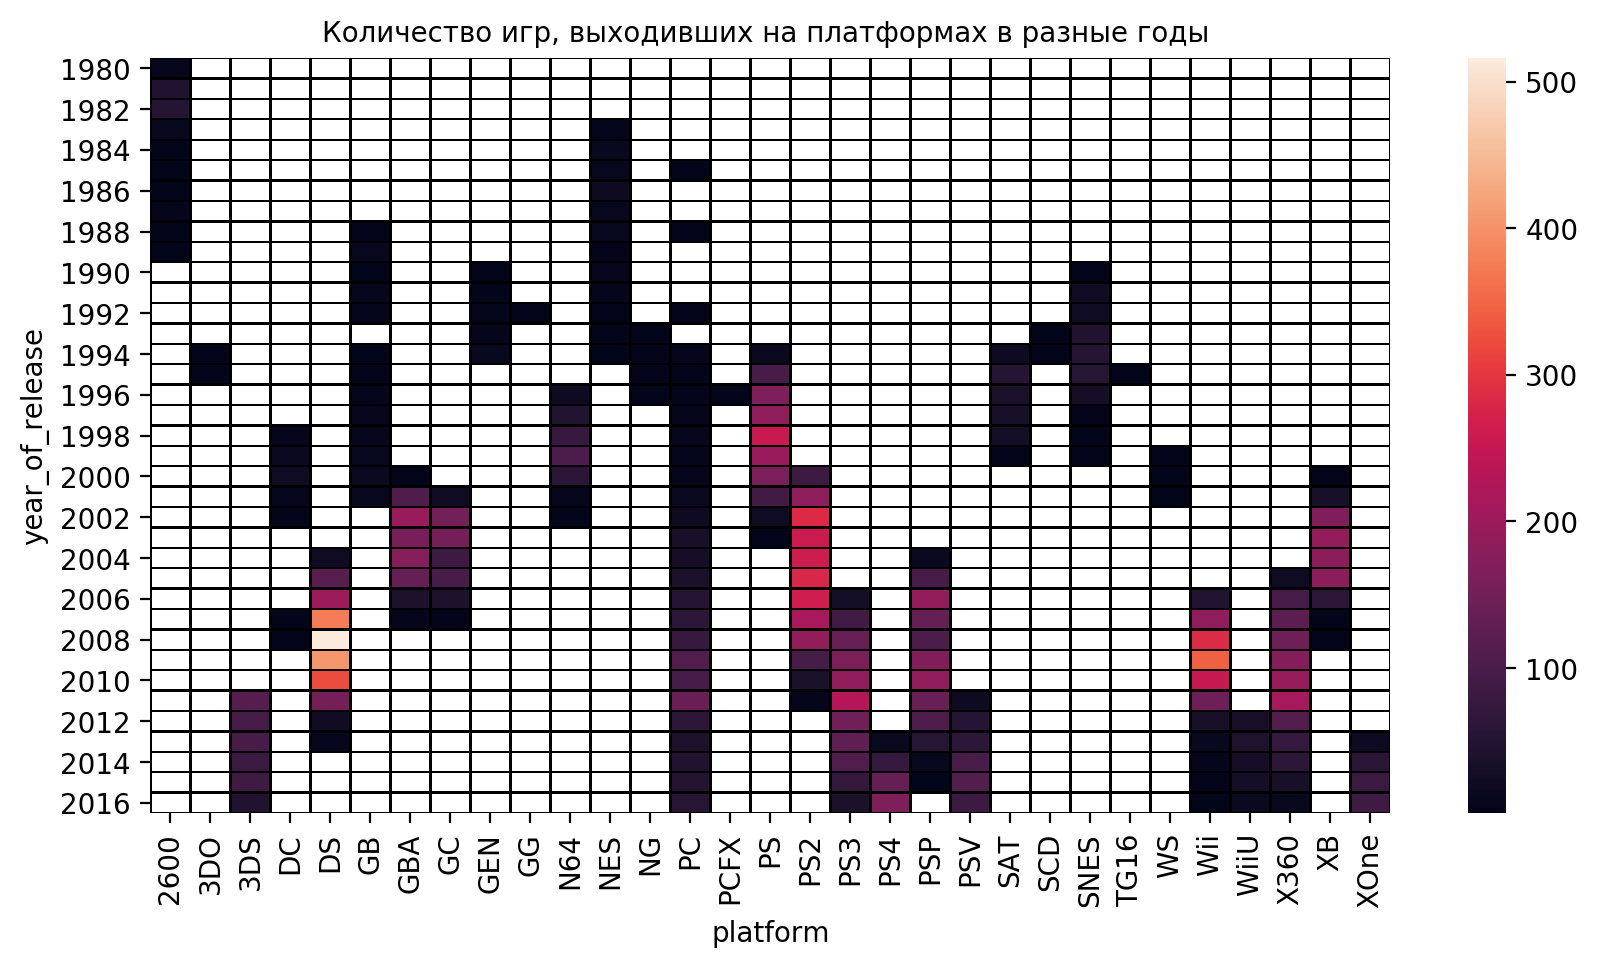

In [27]:
# Применение функции "fill_year_by_platform()" к каждой строке таблицы:
games_data = games_data.apply(fill_year_by_platform, axis = 1)

# Проверка на количество пропусков
print ('Количество пропусков: ', games_data['year_of_release'].isna().sum())

# Приведение значений столбца к целочисленному типу:
games_data['year_of_release'] = games_data['year_of_release'].astype('int')

# Применения функции "heatmap_platform_year()" для всей таблицы для проверки соответствия года вывуска
# характерном диапазону:
heatmap_platform_year(games_data)

In [28]:
# Удаление столбцов "min_year", "median_year", "max_year":
games_data.drop(columns =["min_year", "median_year", "max_year"], inplace = True)

# Проверка - вывод первых 5 строк:
games_data.head()

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN


<a href='#content'>*К содержанию*</a>



<a id="step2.2.4"><a>
* ### 2.2.4 Обработка значений столбца "genre"



* #### Числовые характеристики и график boxplot или другие характеристики (для типа "*object*"):


In [29]:

describe_and_plot(games_data,'genre')


Пропущенные значения: 0
Доля пропущенных значений: 0.00%


count      16713
unique        12
top       Action
freq        3369
Name: genre, dtype: object

Тип данных: object

Количество уникальных значений: 12

Наличие дубликатов: 16701



name platform  year_of_release         genre  \
0                 Wii Sports      Wii             2006        Sports   
1          Super Mario Bros.      NES             1985      Platform   
2             Mario Kart Wii      Wii             2008        Racing   
3          Wii Sports Resort      Wii             2009        Sports   
4   Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
5                     Tetris       GB             1989        Puzzle   
6      New Super Mario Bros.       DS             2006      Platform   
7                   Wii Play      Wii             2006          Misc   
8  New Super Mario Bros. Wii      Wii             2009      Platform   
9                  Duck Hunt      NES             1984       Shooter   

   na_sales  eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     41.36     28.96      3.77         8.45          76.0          8      E  
1     29.08      3.58      6.81         0.77           NaN        NaN    NaN  
2     15.68     12.76      3.79         3.29          82.0        8.3      E  
3     15.61     10.93      3.28         2.95          80.0          8      E  
4     11.27      8.89     10.22         1.00           NaN        NaN    NaN  
5     23.20      2.26      4.22         0.58           NaN        NaN    NaN  
6     11.28      9.14      6.50         2.88          89.0        8.5      E  
7     13.96      9.18      2.93         2.84          58.0        6.6      E  
8     14.44      6.94      4.70         2.24          87.0        8.4      E  
9     26.93      0.63      0.28         0.47           NaN        NaN    NaN

In [30]:
# Вывод уникальных значений столбца "genre" с количеством их упоминания:
games_data['genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64


#### Предварительный вывод:
- **Пропущенные значения:** не обнаружено
- **Аномальные значения:** не обнаружено
- **Наличие дубликатов:** наличие дубликатов говорит о повторении значений
- **Тип данных:** *"object"* - соответствует значениям в столбце



<a href='#content'>*К содержанию*</a>



<a id="step2.2.5"><a>
* ### 2.2.5 Обработка значений столбца "na_sales"



* #### Числовые характеристики и график boxplot или другие характеристики (для типа "*object*"):


Пропущенные значения: 0
Доля пропущенных значений: 0.00%


count    16713.000000
mean         0.263302
std          0.813565
min          0.000000
25%          0.000000
50%          0.080000
75%          0.240000
max         41.360000
Name: na_sales, dtype: float64

Тип данных: float64



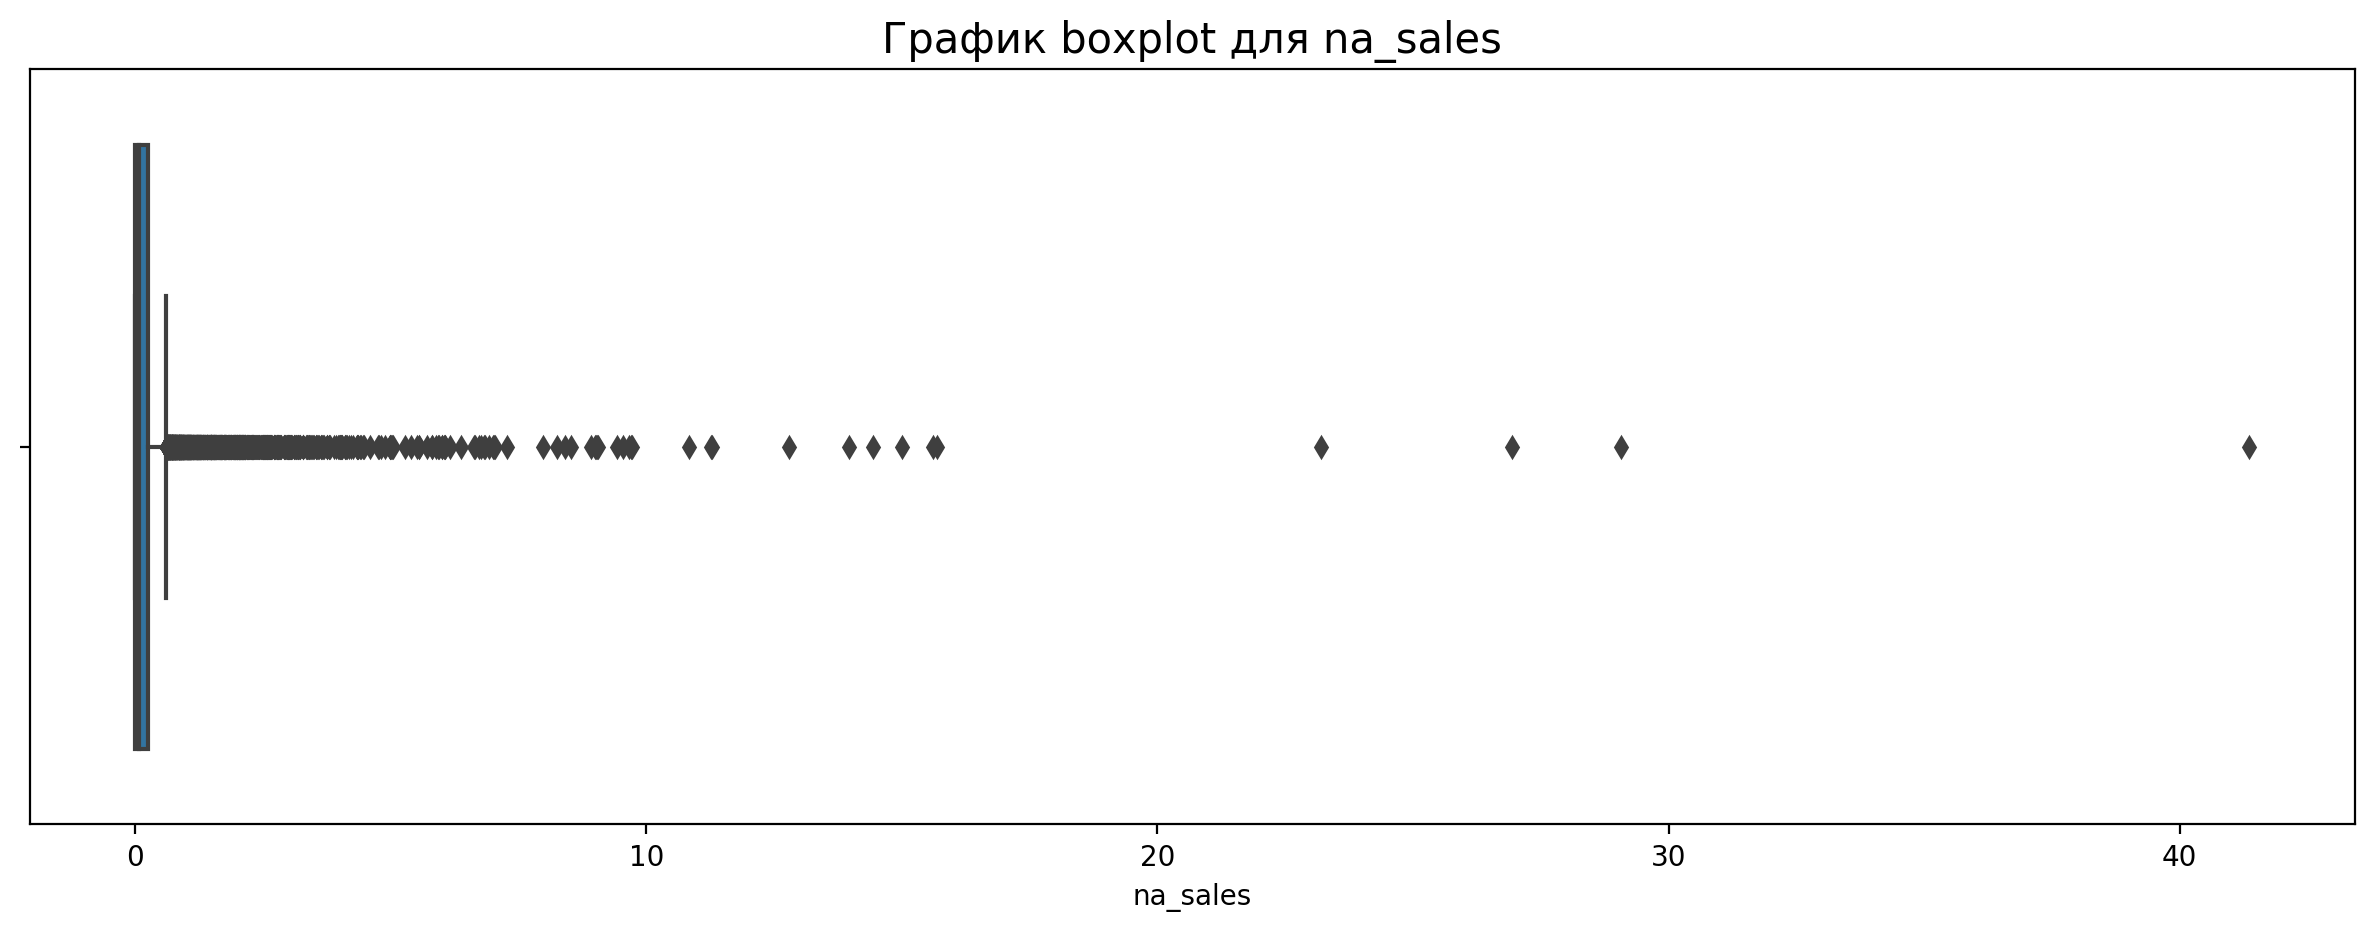

In [31]:

describe_and_plot(games_data,'na_sales')


In [32]:
# Вывод данных со значениями продаж более 10 млн. экз.:
display(games_data.query('na_sales > 10').sort_values(by = 'na_sales', ascending = False))

# Вывод кол-ва игр с продажами = 0:
print ('Количество игр с продажами в регионе NA = 0:', len(games_data.query('na_sales == 0')))

name platform  year_of_release         genre  \
0                  Wii Sports      Wii             2006        Sports   
1           Super Mario Bros.      NES             1985      Platform   
9                   Duck Hunt      NES             1984       Shooter   
5                      Tetris       GB             1989        Puzzle   
2              Mario Kart Wii      Wii             2008        Racing   
3           Wii Sports Resort      Wii             2009        Sports   
14         Kinect Adventures!     X360             2010          Misc   
8   New Super Mario Bros. Wii      Wii             2009      Platform   
7                    Wii Play      Wii             2006          Misc   
18          Super Mario World     SNES             1990      Platform   
6       New Super Mario Bros.       DS             2006      Platform   
4    Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
21           Super Mario Land       GB             1989      Platform   

    na_sales  eu_sales  jp_sales  other_sales  critic_score user_score rating  
0      41.36     28.96      3.77         8.45          76.0          8      E  
1      29.08      3.58      6.81         0.77           NaN        NaN    NaN  
9      26.93      0.63      0.28         0.47           NaN        NaN    NaN  
5      23.20      2.26      4.22         0.58           NaN        NaN    NaN  
2      15.68     12.76      3.79         3.29          82.0        8.3      E  
3      15.61     10.93      3.28         2.95          80.0          8      E  
14     15.00      4.89      0.24         1.69          61.0        6.3      E  
8      14.44      6.94      4.70         2.24          87.0        8.4      E  
7      13.96      9.18      2.93         2.84          58.0        6.6      E  
18     12.78      3.75      3.54         0.55           NaN        NaN    NaN  
6      11.28      9.14      6.50         2.88          89.0        8.5      E  
4      11.27      8.89     10.22         1.00           NaN        NaN    NaN  
21     10.83      2.71      4.18         0.42           NaN        NaN    NaN

Количество игр с продажами в регионе NA = 0: 4507



#### Предварительный вывод:
- **Пропущенные значения:** не обнаружено
- **Аномальные значения:** есть игры как с очень высокими продажами, так и с равными 0
- **Возможные причины возникновения аномальных значений:** игры с продажами = 0 - скорее всего, это игры, которые не продавались в данном регионе. Игры с продажами, превышающими верхнюю границу "усов" графика - особо успешные в данном регионе игры
- **Способ устранения аномальных значений:** оставим
- **Тип данных:** *"float64"* - соответствует значениям в столбце.



<a href='#content'>*К содержанию*</a>



<a id="step2.2.6"><a>
* ### 2.2.6 Обработка значений столбца "eu_sales"



* #### Числовые характеристики и график boxplot или другие характеристики (для типа "*object*"):


Пропущенные значения: 0
Доля пропущенных значений: 0.00%


count    16713.000000
mean         0.145045
std          0.503359
min          0.000000
25%          0.000000
50%          0.020000
75%          0.110000
max         28.960000
Name: eu_sales, dtype: float64

Тип данных: float64



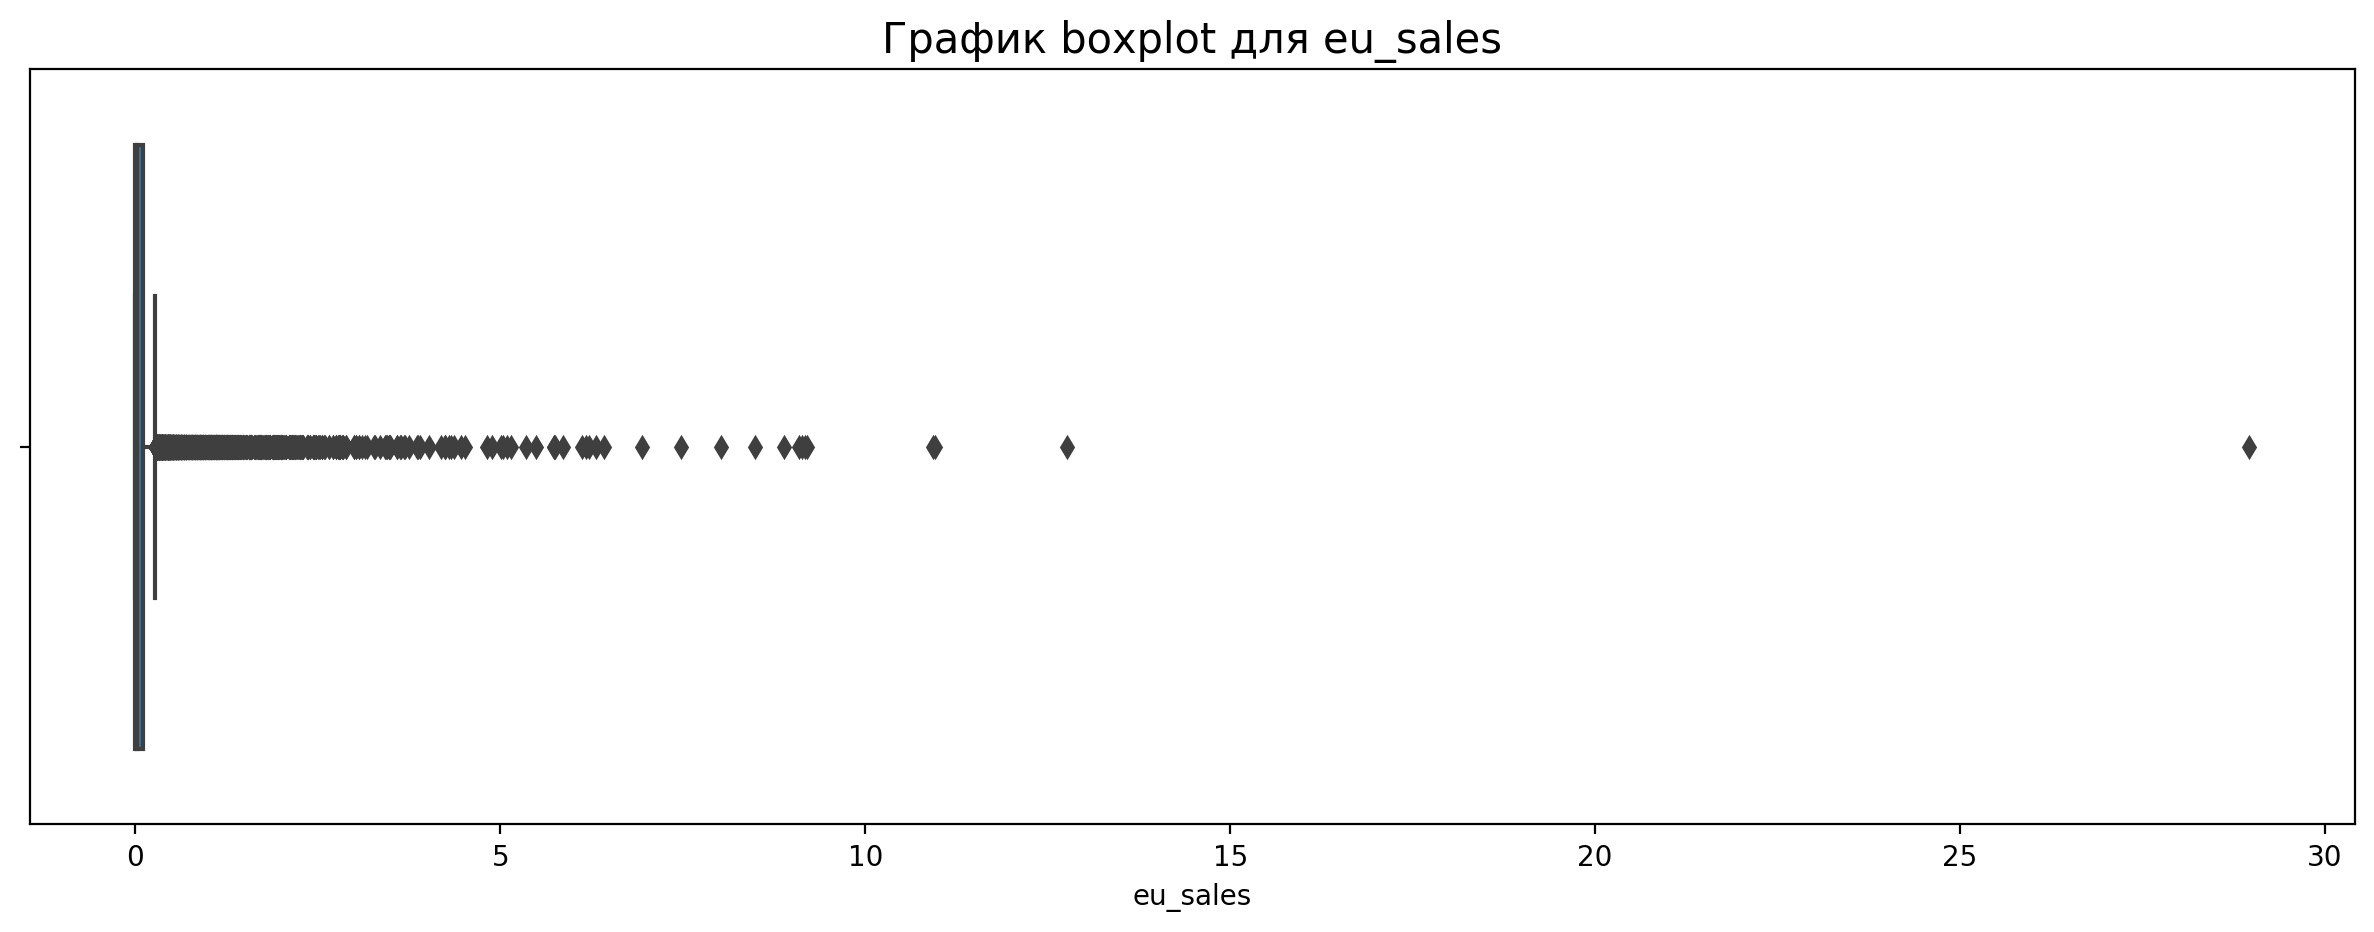

In [33]:

describe_and_plot(games_data,'eu_sales')


In [34]:
# Вывод данных со значениями продаж более 10 млн. экз.:
display(games_data.query('eu_sales > 10').sort_values(by = 'eu_sales', ascending = False))

# Вывод кол-ва игр с продажами = 0:
print ('Количество игр с продажами в регионе EU = 0:', len(games_data.query('eu_sales == 0')))

name platform  year_of_release       genre  na_sales  \
0          Wii Sports      Wii             2006      Sports     41.36   
2      Mario Kart Wii      Wii             2008      Racing     15.68   
10         Nintendogs       DS             2005  Simulation      9.05   
3   Wii Sports Resort      Wii             2009      Sports     15.61   

    eu_sales  jp_sales  other_sales  critic_score user_score rating  
0      28.96      3.77         8.45          76.0          8      E  
2      12.76      3.79         3.29          82.0        8.3      E  
10     10.95      1.93         2.74           NaN        NaN    NaN  
3      10.93      3.28         2.95          80.0          8      E

Количество игр с продажами в регионе EU = 0: 5869



#### Предварительный вывод:
- **Пропущенные значения:** не обнаружено
- **Аномальные значения:** есть игры как с очень высокими продажами, так и с равными 0
- **Возможные причины возникновения аномальных значений:** игры с продажами = 0 - скорее всего, это игры, которые не продавались в данном регионе. Игры с продажами, превышающими верхнюю границу "усов" графика - особо успешные в данном регионе игры
- **Способ устранения аномальных значений:** оставим
- **Тип данных:** *"float64"* - соответствует значениям в столбце.




<a href='#content'>*К содержанию*</a>



<a id="step2.2.7"><a>
* ### 2.2.7 Обработка значений столбца "jp_sales"



* #### Числовые характеристики и график boxplot или другие характеристики (для типа "*object*"):


Пропущенные значения: 0
Доля пропущенных значений: 0.00%


count    16713.000000
mean         0.077625
std          0.308871
min          0.000000
25%          0.000000
50%          0.000000
75%          0.040000
max         10.220000
Name: jp_sales, dtype: float64

Тип данных: float64



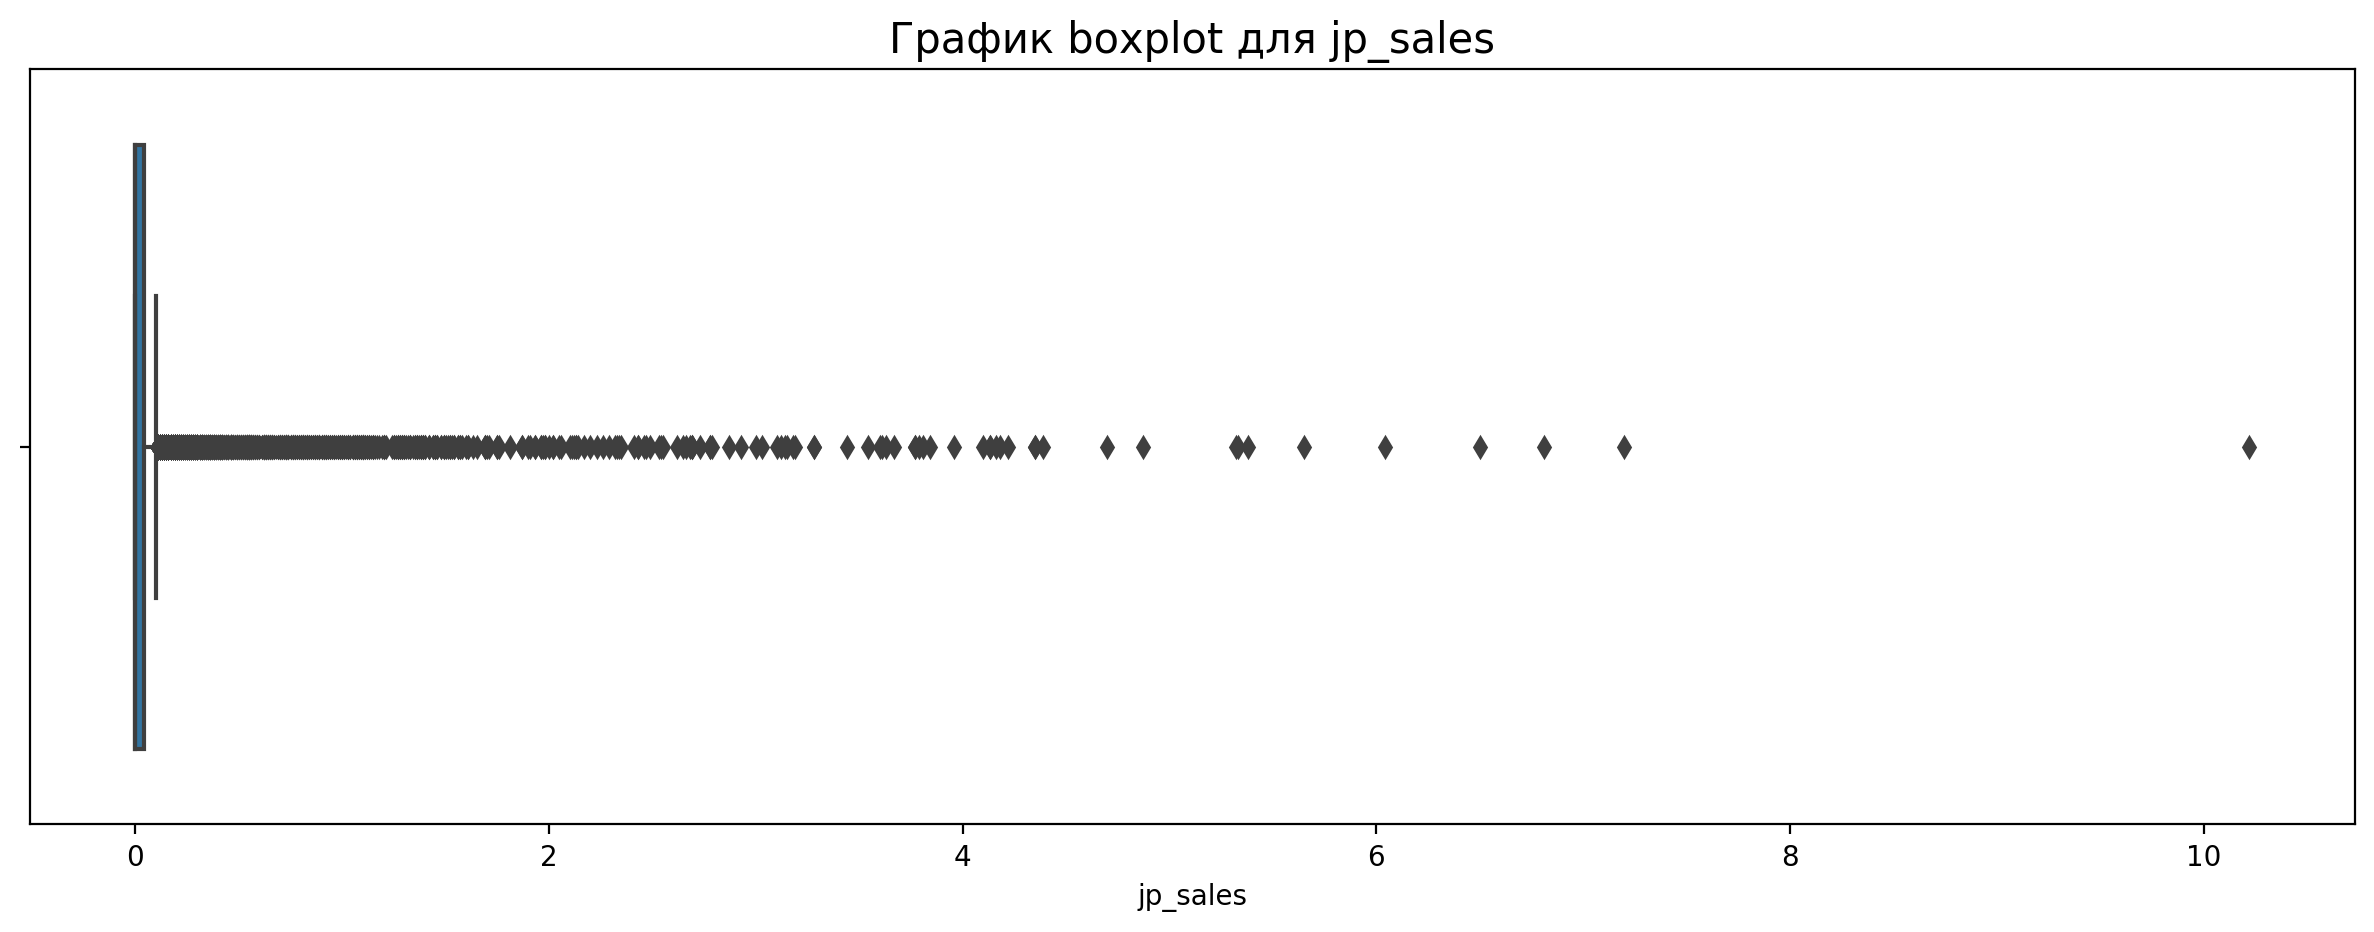

In [35]:

describe_and_plot(games_data,'jp_sales')


In [36]:
# Вывод данных со значениями продаж более 5 млн. экз.:
display(games_data.query('jp_sales > 5').sort_values(by = 'jp_sales', ascending = False))

# Вывод кол-ва игр с продажами = 0:
print ('Количество игр с продажами в регионе JP = 0:', len(games_data.query('jp_sales == 0')))

name platform  year_of_release  \
4                      Pokemon Red/Pokemon Blue       GB             1996   
12                  Pokemon Gold/Pokemon Silver       GB             1999   
1                             Super Mario Bros.      NES             1985   
6                         New Super Mario Bros.       DS             2006   
20                Pokemon Diamond/Pokemon Pearl       DS             2006   
27                  Pokemon Black/Pokemon White       DS             2010   
25                Pokemon Ruby/Pokemon Sapphire      GBA             2002   
43                  Animal Crossing: Wild World       DS             2005   
26  Brain Age 2: More Training in Minutes a Day       DS             2005   

           genre  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
4   Role-Playing     11.27      8.89     10.22         1.00           NaN   
12  Role-Playing      9.00      6.18      7.20         0.71           NaN   
1       Platform     29.08      3.58      6.81         0.77           NaN   
6       Platform     11.28      9.14      6.50         2.88          89.0   
20  Role-Playing      6.38      4.46      6.04         1.36           NaN   
27  Role-Playing      5.51      3.17      5.65         0.80           NaN   
25  Role-Playing      6.06      3.90      5.38         0.50           NaN   
43    Simulation      2.50      3.45      5.33         0.86          86.0   
26        Puzzle      3.43      5.35      5.32         1.18          77.0   

   user_score rating  
4         NaN    NaN  
12        NaN    NaN  
1         NaN    NaN  
6         8.5      E  
20        NaN    NaN  
27        NaN    NaN  
25        NaN    NaN  
43        8.7      E  
26        7.1      E

Количество игр с продажами в регионе JP = 0: 10513



#### Предварительный вывод:
- **Пропущенные значения:** не обнаружено
- **Аномальные значения:** есть игры как с очень высокими продажами, так и с равными 0
- **Возможные причины возникновения аномальных значений:** игры с продажами = 0 - скорее всего, это игры, которые не продавались в данном регионе. Игры с продажами, превышающими верхнюю границу "усов" графика - особо успешные в данном регионе игры
- **Способ устранения аномальных значений:** оставим
- **Тип данных:** *"float64"* - соответствует значениям в столбце.



<a href='#content'>*К содержанию*</a>



<a id="step2.2.8"><a>
* ### 2.2.8 Обработка значений столбца "other_sales"



* #### Числовые характеристики и график boxplot или другие характеристики (для типа "*object*"):


Пропущенные значения: 0
Доля пропущенных значений: 0.00%


count    16713.000000
mean         0.047343
std          0.186742
min          0.000000
25%          0.000000
50%          0.010000
75%          0.030000
max         10.570000
Name: other_sales, dtype: float64

Тип данных: float64



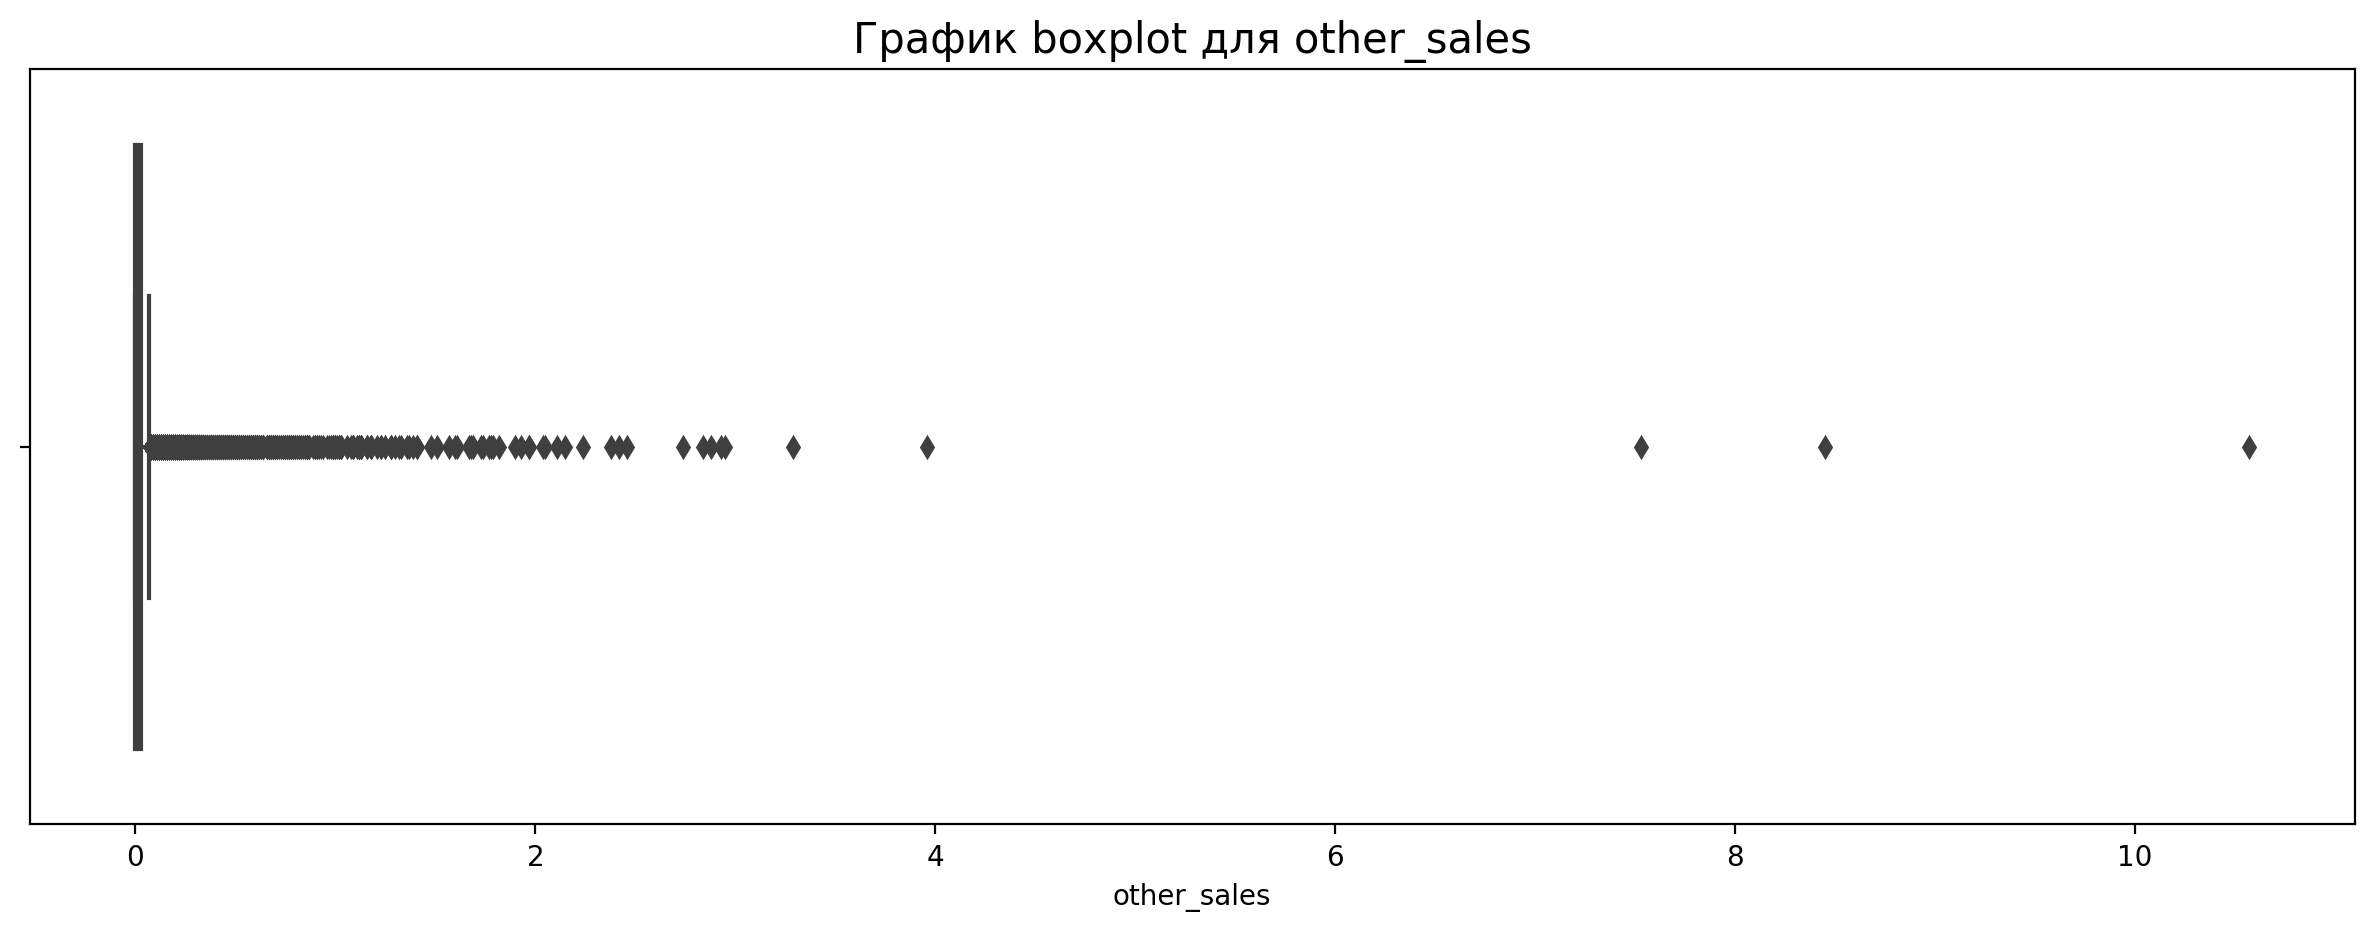

In [37]:

describe_and_plot(games_data,'other_sales')


In [38]:
# Вывод данных со значениями продаж более 5 млн. экз.:
display(games_data.query('other_sales > 5').sort_values(by = 'other_sales', ascending = False))

# Вывод кол-ва игр с продажами = 0:
print ('Количество игр с продажами в регионе OTHER = 0:', len(games_data.query('other_sales == 0')))

name platform  year_of_release   genre  na_sales  \
17  Grand Theft Auto: San Andreas      PS2             2004  Action      9.43   
0                      Wii Sports      Wii             2006  Sports     41.36   
48                 Gran Turismo 4      PS2             2004  Racing      3.01   

    eu_sales  jp_sales  other_sales  critic_score user_score rating  
17      0.40      0.41        10.57          95.0          9      M  
0      28.96      3.77         8.45          76.0          8      E  
48      0.01      1.10         7.53          89.0        8.5      E

Количество игр с продажами в регионе OTHER = 0: 6600



#### Предварительный вывод:
- **Пропущенные значения:** не обнаружено
- **Аномальные значения:** есть игры как с очень высокими продажами, так и с равными 0
- **Возможные причины возникновения аномальных значений:** игры с продажами = 0 - скорее всего, это игры, которые не продавались в данном регионе. Игры с продажами, превышающими верхнюю границу "усов" графика - особо успешные в данном регионе игры
- **Способ устранения аномальных значений:** оставим
- **Тип данных:** *"float64"* - соответствует значениям в столбце.



* #### Изменение:



<a href='#content'>*К содержанию*</a>



<a id="step2.2.9"><a>
* ### 2.2.9 Обработка значений столбца "critic_score"



* #### Числовые характеристики и график boxplot или другие характеристики (для типа "*object*"):


Пропущенные значения: 8576
Доля пропущенных значений: 51.31%


count    8137.000000
mean       68.967679
std        13.938165
min        13.000000
25%        60.000000
50%        71.000000
75%        79.000000
max        98.000000
Name: critic_score, dtype: float64

Тип данных: float64



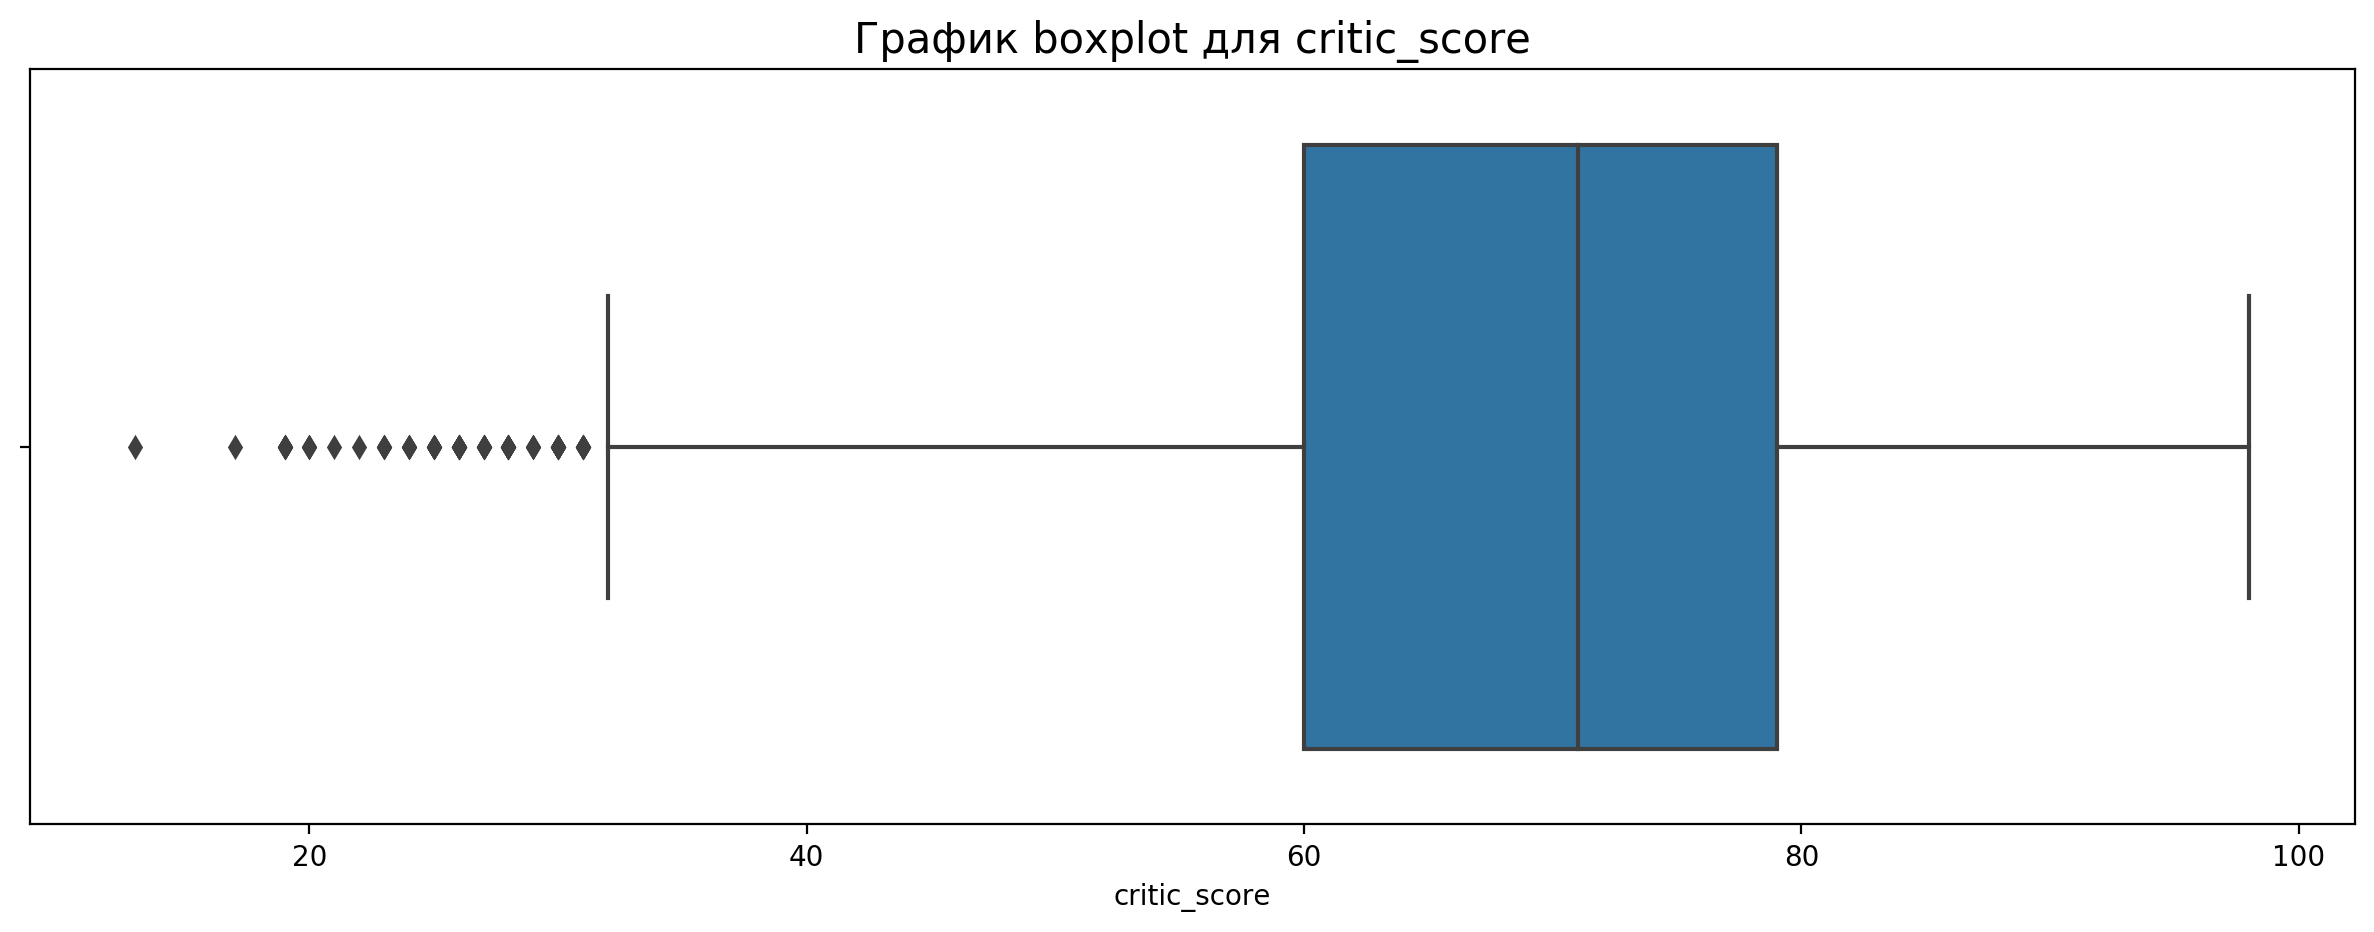

In [39]:

describe_and_plot(games_data,'critic_score')


In [40]:
# Вывод первых 5 строк среза по условием 'critic_score.isna() == True':
games_data.query('critic_score.isna() == True').head(5)

name platform  year_of_release         genre  \
1          Super Mario Bros.      NES             1985      Platform   
4   Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
5                     Tetris       GB             1989        Puzzle   
9                  Duck Hunt      NES             1984       Shooter   
10                Nintendogs       DS             2005    Simulation   

    na_sales  eu_sales  jp_sales  other_sales  critic_score user_score rating  
1      29.08      3.58      6.81         0.77           NaN        NaN    NaN  
4      11.27      8.89     10.22         1.00           NaN        NaN    NaN  
5      23.20      2.26      4.22         0.58           NaN        NaN    NaN  
9      26.93      0.63      0.28         0.47           NaN        NaN    NaN  
10      9.05     10.95      1.93         2.74           NaN        NaN    NaN

In [41]:
# Вывод превых 10 игр с наибольшим значением кол-ва пропусков с столбце "critic_score"
games_data.query('critic_score.isna() == True')['name'].value_counts().head(10)

FIFA 12                                                               7
The Amazing Spider-Man 2 (2014)                                       7
Sonic & All-Stars Racing Transformed                                  6
Lego Batman 3: Beyond Gotham                                          6
Disney Infinity 2.0: Marvel Super Heroes                              6
Cars 2                                                                6
The Walking Dead: Season One                                          6
Transformers: Revenge of the Fallen (XBox 360, PS3, & PC Versions)    6
Adventure Time: Finn & Jake Investigations                            6
Ben 10 Galactic Racing                                                6
Name: name, dtype: int64


#### Предварительный вывод:
- **Пропущенные значения:** обнаружено большое количество пропусков
- **Возможные причины возникновения пропусков:** для некоторых игр наличие пропусков в столбце с оценками критиков может быть связано годом выпуска игры - во время их выхода отсутствовала единая система оценок, а после ее появления игры стали не актуальными, поэтому пропала необходимость данной оценки.
- **Способы обработки пропусков:** можно использовать оценки критиков по игре для другой платформы (например, какая-либо игра вышла на нескольких платформах, оценки критиков есть не по всем платформам, можно заполнить пропуски средними значениями проставленных оценок). Но преред этим, необходимо посмотреть на значения в столбце "user_score"
- **Аномальные значения:** не обнаружено - все значения лежат в указанном в описании проекта диапазоне (0, 100)
- **Тип данных:** *float64* - соответствует значениям в столбце



<a href='#content'>*К содержанию*</a>



<a id="step2.2.10"><a>
* ### 2.2.10 Обработка значений столбца "user_score"



* #### Числовые характеристики и график boxplot или другие характеристики (для типа "*object*"):


In [42]:

describe_and_plot(games_data,'user_score')


Пропущенные значения: 6699
Доля пропущенных значений: 40.08%


count     10014
unique       96
top         tbd
freq       2424
Name: user_score, dtype: object

Тип данных: object

Количество уникальных значений: 97

Наличие дубликатов: 16616



name platform  year_of_release         genre  \
0                 Wii Sports      Wii             2006        Sports   
1          Super Mario Bros.      NES             1985      Platform   
2             Mario Kart Wii      Wii             2008        Racing   
3          Wii Sports Resort      Wii             2009        Sports   
4   Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
5                     Tetris       GB             1989        Puzzle   
6      New Super Mario Bros.       DS             2006      Platform   
7                   Wii Play      Wii             2006          Misc   
8  New Super Mario Bros. Wii      Wii             2009      Platform   
9                  Duck Hunt      NES             1984       Shooter   

   na_sales  eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     41.36     28.96      3.77         8.45          76.0          8      E  
1     29.08      3.58      6.81         0.77           NaN        NaN    NaN  
2     15.68     12.76      3.79         3.29          82.0        8.3      E  
3     15.61     10.93      3.28         2.95          80.0          8      E  
4     11.27      8.89     10.22         1.00           NaN        NaN    NaN  
5     23.20      2.26      4.22         0.58           NaN        NaN    NaN  
6     11.28      9.14      6.50         2.88          89.0        8.5      E  
7     13.96      9.18      2.93         2.84          58.0        6.6      E  
8     14.44      6.94      4.70         2.24          87.0        8.4      E  
9     26.93      0.63      0.28         0.47           NaN        NaN    NaN

In [43]:
# Вывод количества значений "tbd" в столбце "user_score":
print ('Кол-во значений "tbd"', len(games_data.query('user_score == "tbd"')))

Кол-во значений "tbd" 2424



#### Предварительный вывод:
- **Пропущенные значения:** обнаружено большое количество пропусков
- **Возможные причины возникновения пропусков:** так же как и для оценок критиков: для некоторых игр наличие пропусков в столбце с оценками пользователей может быть связано годом выпуска игры - во время их выхода отсутствовала единая система оценок, а после ее появления игры стали не актуальными, поэтому пропала необходимость данной оценки.
- **Способы обработки пропусков:** для игр, выходивших на нескольких платформах и с известной оценкой пользователя или критиков хотя бы для игры на одной из платформ, можно использовать известные оценки для заполнения соответствующих пропусков. Для игр с известной оценкой критиков возможно использование этой оценки для заполнения пропусков
- **Аномальные значения:** часто встречается значение "tbd".
- **Возможные причины возникновения аномальных значений:** "tbd" (To Be Determined) - значит, что оценка не определена
- **Способ устранения аномальных значений:** для удобства, заменим значение "tbd" на 1000
- **Тип данных:** *object* - необходимо заменить на вещественный *float64* (именно для этого замена значения "tbd" на 1000)



* #### Изменение:


In [44]:
# Вывод количества пропусков в столбце "critic_score" при значении "tbd" в столбце "user_score":
print ('Кол-во пропусков в "critic_score" при "user_score = tbd":',
       len(games_data.query('user_score == "tbd" & critic_score.isna() == True')))

Кол-во пропусков в "critic_score" при "user_score = tbd": 1342


**Примечание:** логично предположить, что если оценка пользователя еще не определена, то пропуск в столбце с оценкой критиков так же еще не определена. Поэтому предлагается заполнить соответствующие пропуски этим значением и в дальнейшем, при оценке влияния отзывов на продажи исключать данные из анализа.

In [45]:
# Замена значения "tbd" в столбце "user_score" на метку 1000
games_data.loc[games_data['user_score'] == "tbd", 'user_score'] = 1000

# Заполнение пропусков в столбце "critic_score" значением "1000" в строках с "user_score == 1000":
games_data.loc[games_data['user_score'] == 1000,
               'critic_score'] = (games_data
                                  .loc[games_data['user_score'] == 1000, 'critic_score']
                                  .fillna(1000)
                                 )
# Проверка -
# вывод количества пропусков в столбце "critic_score" при значении "1000" в столбце "user_score":
print ('Кол-во пропусков в "critic_score" при "user_score = tbd":',
       len(games_data.query('user_score == 1000 & critic_score.isna() == True')))

# Изменение типа данных в столбце "user_score" на "float64"
games_data['user_score'] = pd.to_numeric(games_data['user_score'])

Кол-во пропусков в "critic_score" при "user_score = tbd": 0


In [46]:
# Функция для заполнения оценки игры по средней оценки этой же игры, вышедшей на других платформах:
def fill_score_from_name(data, score):
    """
    Функция принимает на вход таблицу и название столбца, в котором необходимо провести заполнение пропуска.
    Действие функции:
    - Создает список с названиями игр, для которых неизвестна оценка
    - В цикле проходит по названиям игр и на каждом шаге вычисляет среднее значение оценки и заполняет ей пропуск
    - Возвращает измененную таблицу
    """
    names_list = data[data[score].isna() == True]['name'].unique()
    for i, name in reversed(list(enumerate(names_list))):
        score_value = data.query('name == @name')[score].mean()
        data.loc[data['name'] == name, score] = (data
                                                          .loc[data['name'] == name, score]
                                                          .fillna(score_value)
                                                         )
    return data

In [47]:
# Применение функции "fill_score()" для столбца 'critic_score' по срезу с условием 'user_score != 1000'
games_data.loc[games_data['user_score'] != 1000] = fill_score_from_name(games_data
                                                                        .query('user_score != 1000'),'critic_score')
# Проверка - вывод количества пропусков в столбце "critic_score":
games_data['critic_score'].isna().sum()

6590

In [48]:
# Применение функции "fill_score" для столбца 'user_score' по срезу с условием 'user_score != 1000':
games_data.loc[games_data['user_score'] != 1000] = fill_score_from_name(games_data
                                                                        .query('user_score != 1000'),'user_score')
# Проверка - вывод количества пропусков в столбце "user_score":
games_data['user_score'].isna().sum()

6348

In [49]:
# Вывод кол-ва пропусков в столбце "critic_score" при известных значениях "user_score":
print ('critic_score = NaN, user_score != NaN:', 
       len(games_data.query('critic_score.isna() == True & user_score.isna() != True')))

# Вывод кол-ва пропусков в столбце "user_score" при известных значениях "critic_score":
print ('critic_score != NaN, user_score = NaN:', 
       len(games_data.query('critic_score.isna() != True & user_score.isna() == True')))
       

critic_score = NaN, user_score != NaN: 267
critic_score != NaN, user_score = NaN: 25


In [50]:
# Вывод значения коэффициента корреляции для данных величин:
print ('Значение коэффициента Пирсона для величин "user_score" и "critic_score":', games_data
       .query('user_score != 1000')['user_score']
       .corr(games_data.query('user_score != 1000')['critic_score']))

Значение коэффициента Пирсона для величин "user_score" и "critic_score": 0.5483715936237709


In [51]:
# Создание и вывод таблица с коэффициентами корреляции для оценок в зависимости от платформы:
(games_data
 .query('user_score != 1000')
 .pivot_table(index= 'platform' , values = ['user_score', 'critic_score'], aggfunc = ['corr'])
 .reset_index()
)

platform       level_1         corr           
                          critic_score user_score
0      2600    user_score     0.997176   1.000000
1      2600  critic_score     1.000000   0.997176
2       3DS    user_score     0.630470   1.000000
3       3DS  critic_score     1.000000   0.630470
4        DC    user_score     0.380073   1.000000
5        DC  critic_score     1.000000   0.380073
6        DS    user_score     0.646265   1.000000
7        DS  critic_score     1.000000   0.646265
8        GB    user_score     0.959434   1.000000
9        GB  critic_score     1.000000   0.959434
10      GBA    user_score     0.639749   1.000000
11      GBA  critic_score     1.000000   0.639749
12       GC    user_score     0.633098   1.000000
13       GC  critic_score     1.000000   0.633098
14      GEN    user_score     0.989751   1.000000
15      GEN  critic_score     1.000000   0.989751
16      N64    user_score     0.655260   1.000000
17      N64  critic_score     1.000000   0.655260
18      NES    user_score    -0.621119   1.000000
19      NES  critic_score     1.000000  -0.621119
20       PC    user_score     0.558746   1.000000
21       PC  critic_score     1.000000   0.558746
22       PS    user_score     0.696232   1.000000
23       PS  critic_score     1.000000   0.696232
24      PS2    user_score     0.548704   1.000000
25      PS2  critic_score     1.000000   0.548704
26      PS3    user_score     0.555000   1.000000
27      PS3  critic_score     1.000000   0.555000
28      PS4    user_score     0.563632   1.000000
29      PS4  critic_score     1.000000   0.563632
30      PSP    user_score     0.469011   1.000000
31      PSP  critic_score     1.000000   0.469011
32      PSV    user_score     0.445310   1.000000
33      PSV  critic_score     1.000000   0.445310
34      SAT    user_score     0.550221   1.000000
35      SAT  critic_score     1.000000   0.550221
36     SNES    user_score     0.492129   1.000000
37     SNES  critic_score     1.000000   0.492129
38      Wii    user_score     0.625294   1.000000
39      Wii  critic_score     1.000000   0.625294
40     WiiU    user_score     0.758085   1.000000
41     WiiU  critic_score     1.000000   0.758085
42     X360    user_score     0.549133   1.000000
43     X360  critic_score     1.000000   0.549133
44       XB    user_score     0.602950   1.000000
45       XB  critic_score     1.000000   0.602950
46     XOne    user_score     0.467942   1.000000
47     XOne  critic_score     1.000000   0.467942

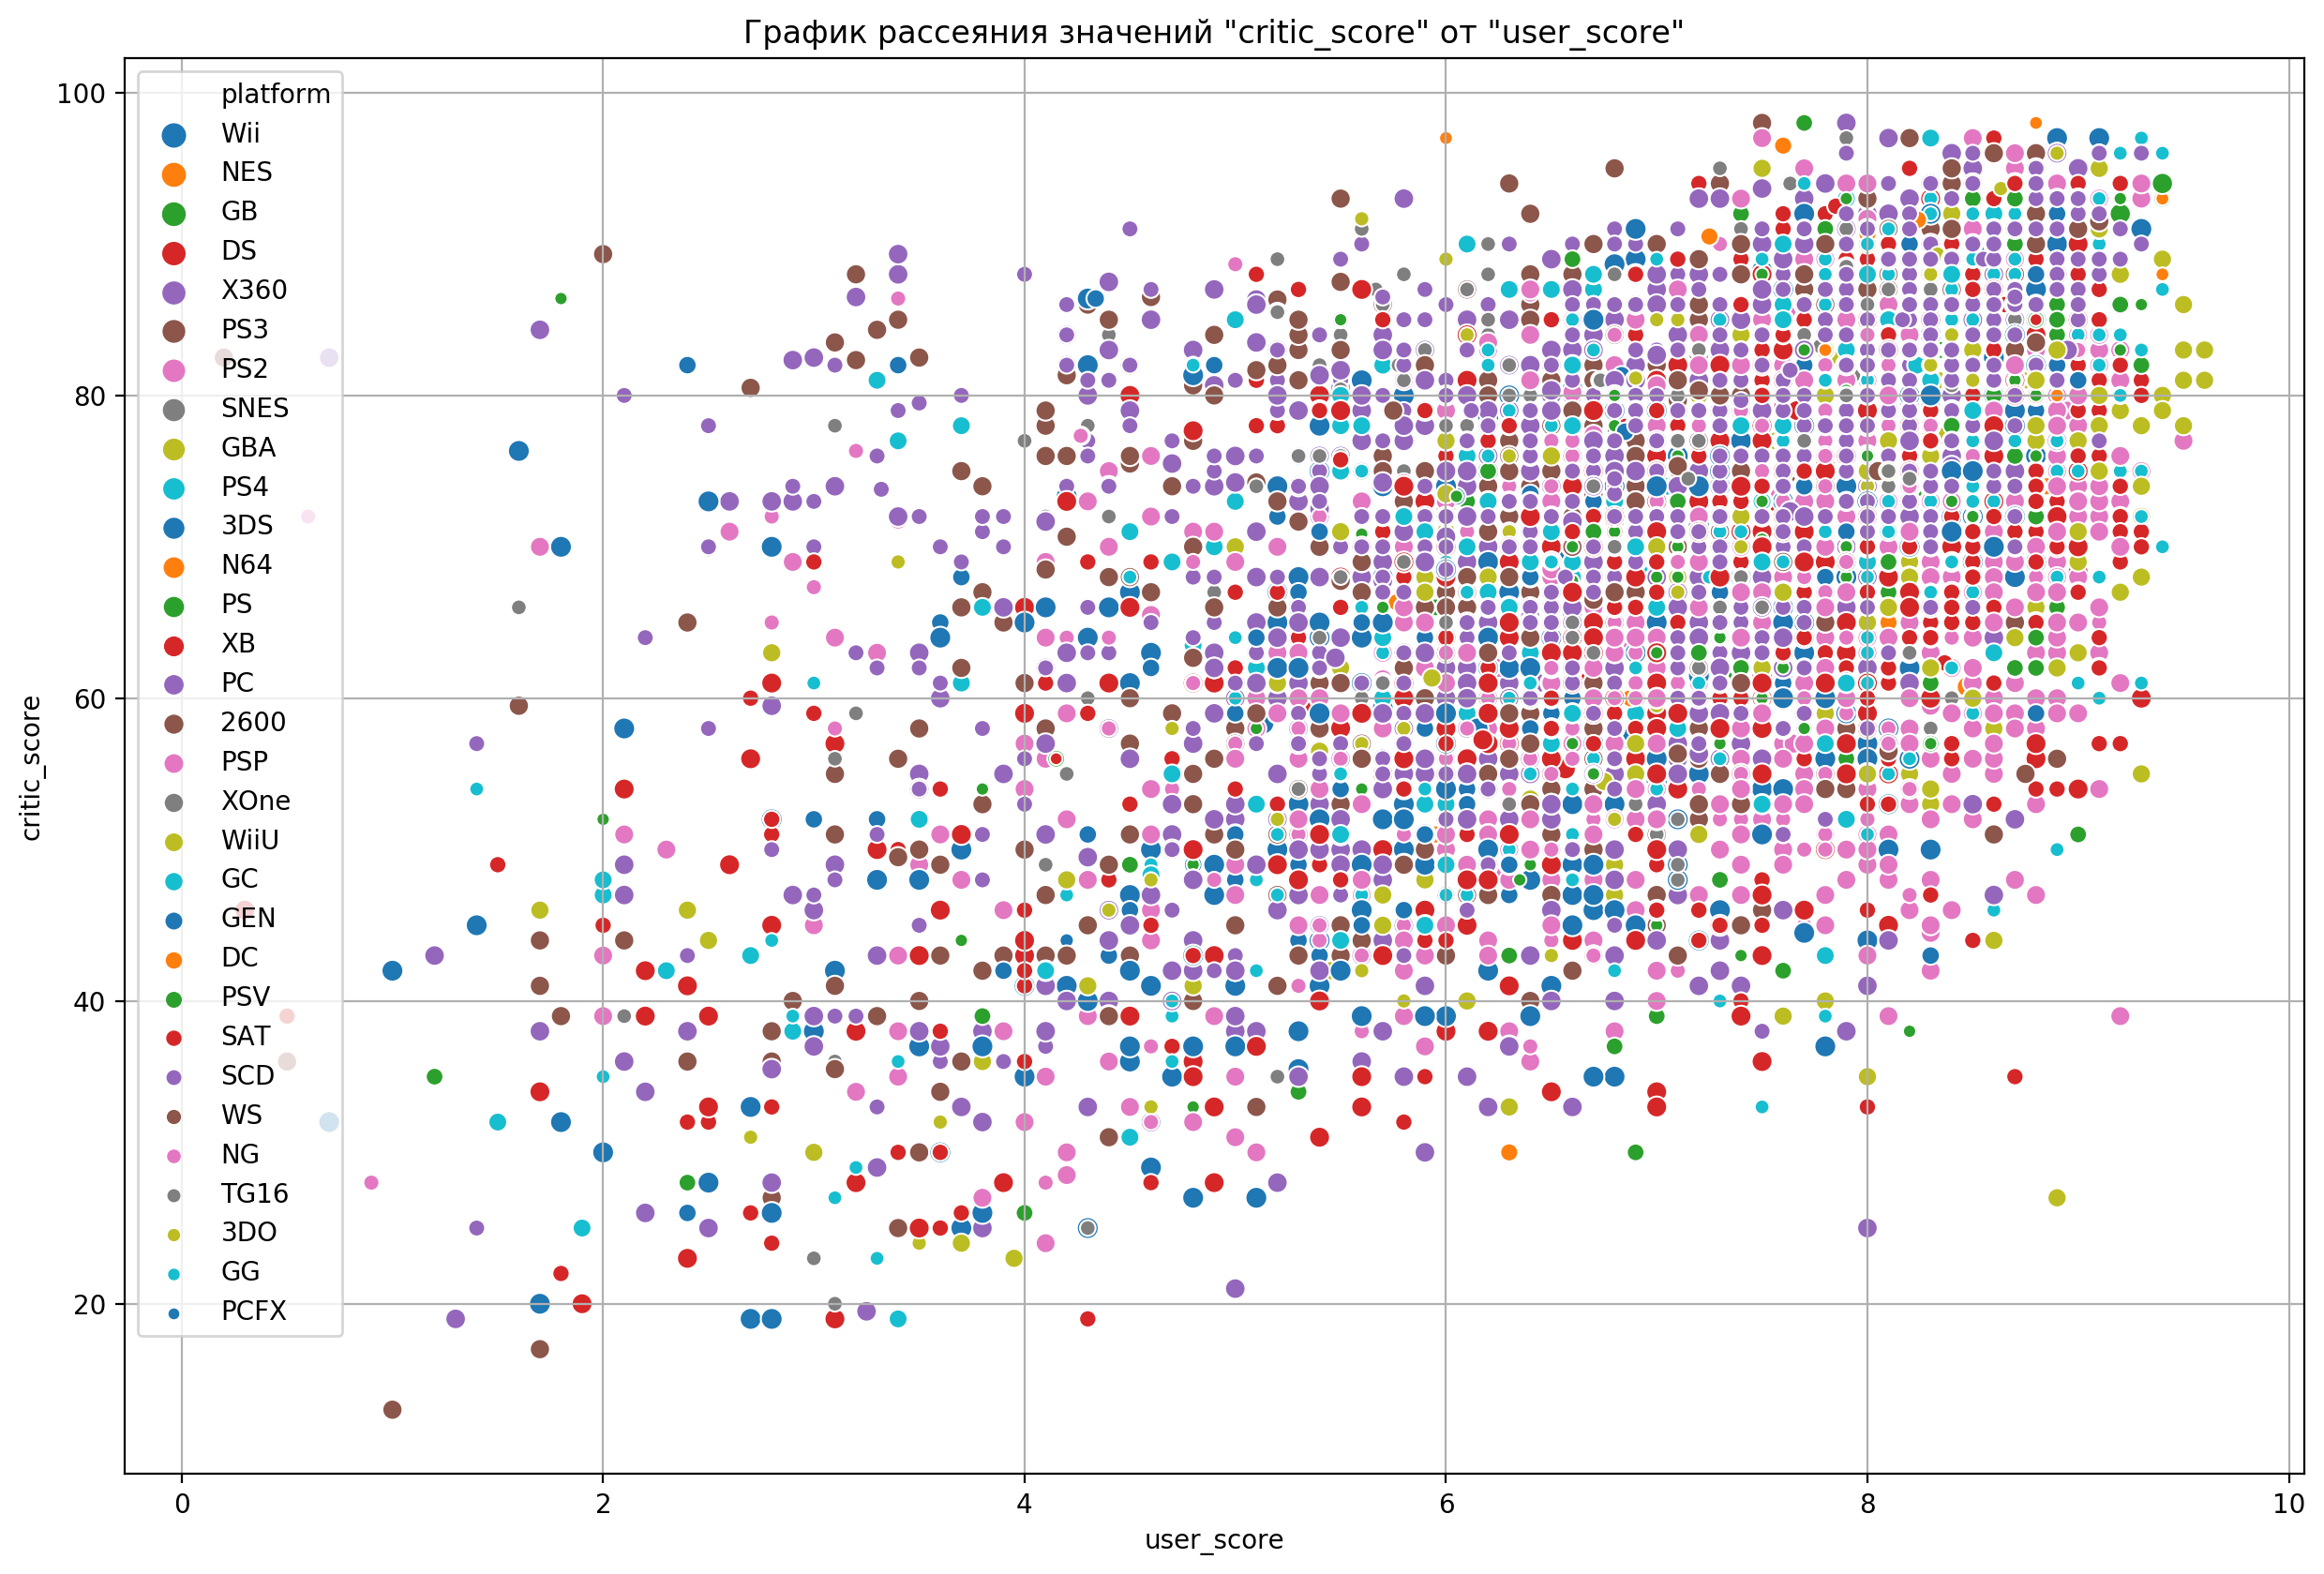

In [52]:
# Построение графика рассеяния для оценок критиков и пользователей по разбивке по платформам:
plt.figure(figsize=(15, 10), dpi = 200)
ax = sns.scatterplot(data=games_data.query('user_score != 1000'), x='user_score',
                     y='critic_score', hue='platform', size='platform', sizes=(10,70), palette = "tab10")
ax.set_title('График рассеяния значений "critic_score" от "user_score"')
ax.grid()
plt.show()


**Примечание:** По графику зависимости значений "critic_score" от "user_score" и по коэффициенту Пирсона можно сказать (для некоторых платформ, он приближается к 1), что между оценкой критиков и пользователей есть связь, поэтому можно заполнить пропуски в одном столбце по значениям в другом и наоборот

In [53]:
# Функция для заполнения пропусков в столбце с одной оценкой, по столбцу с другой оценкой:
def score_from_score(data, score_to_fill, base_score):
    """
    Функция принимает на вход таблицу и названия столбцов: в котором нужно заполнить пропуски и по которому
    нужно заполнять пропуски.
    Дествие функции:
    - Создает список с названиями платформ, для которых есть пропуски в заполняемом столбце.
    - В цикле проходит по названиям платформ и на каждом шаге определеят коэффициент соотношения средних оценок
      по известным данным, затем заполняет пропуску по соотвтствующему сзначению с использованием посчитанного
      коэффициента
    - Возвращает таблицу
    """
    platform_list = data['platform'].unique()
    for i, name in reversed(list(enumerate(platform_list))):
        score_coeff = (data.query('platform == @name')[score_to_fill].mean() 
                       / data.query('platform == @name')[base_score].mean()
                      )
        data.loc[data['platform'] == name,
                 score_to_fill] = (data
                                   .loc[data['platform'] == name, score_to_fill]
                                   .fillna(score_coeff * data.query('platform == @name')[base_score])
                                  )
    return data

In [54]:
# Применение функции "score_from_score" к значениям таблицы, исключающим метку "1000" в столбце "user_score",
# для заполнения пропусков в столбце "user_score" по значениям "critic_score":
games_data.loc[games_data['user_score'] != 1000] = score_from_score(games_data.query('user_score != 1000'),
                                                                    'user_score', 'critic_score')

# Применение функции "score_from_score" к значениям таблицы, исключающим метку "1000" в столбце "user_score",
# для заполнения пропусков в столбце "ucritic_score" по значениям "user_score":
games_data.loc[games_data['user_score'] != 1000] = score_from_score(games_data.query('user_score != 1000'),
                                                                    'critic_score', 'user_score')

#  Вывод оставшихся пропусков в столбцах:
print('Кол-во пропусков в "user_score"', games_data['user_score'].isna().sum())
print('Кол-во пропусков в "critic_score"', games_data['critic_score'].isna().sum())

Кол-во пропусков в "user_score" 6323
Кол-во пропусков в "critic_score" 6323


**Вывод:** 

Предположительно, для заполнения оставшихся пропусков можно использовать продажи (логично предположить, что есть довольно сильная зависимость между оценками и кол-вом проданных копий), но, так как в дальнейшем мы будем анализировать эту зависимость, то заполнять оставшиеся пропуски таким образом некорректно. Такое большое число пропусков, заполненных, на основании зависимости от продаж, сильно повлияет на результат анализа.


<a href='#content'>*К содержанию*</a>



<a id="step2.2.11"><a>
* ### 2.2.11 Обработка значений столбца "rating"



* #### Числовые характеристики и график boxplot или другие характеристики (для типа "*object*"):


In [55]:

describe_and_plot(games_data,'rating')


Пропущенные значения: 6764
Доля пропущенных значений: 40.47%


count     9949
unique       8
top          E
freq      3990
Name: rating, dtype: object

Тип данных: object

Количество уникальных значений: 9

Наличие дубликатов: 16704



name platform  year_of_release         genre  \
0                 Wii Sports      Wii             2006        Sports   
1          Super Mario Bros.      NES             1985      Platform   
2             Mario Kart Wii      Wii             2008        Racing   
3          Wii Sports Resort      Wii             2009        Sports   
4   Pokemon Red/Pokemon Blue       GB             1996  Role-Playing   
5                     Tetris       GB             1989        Puzzle   
6      New Super Mario Bros.       DS             2006      Platform   
7                   Wii Play      Wii             2006          Misc   
8  New Super Mario Bros. Wii      Wii             2009      Platform   
9                  Duck Hunt      NES             1984       Shooter   

   na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score rating  
0     41.36     28.96      3.77         8.45          76.0         8.0      E  
1     29.08      3.58      6.81         0.77           NaN         NaN    NaN  
2     15.68     12.76      3.79         3.29          82.0         8.3      E  
3     15.61     10.93      3.28         2.95          80.0         8.0      E  
4     11.27      8.89     10.22         1.00           NaN         NaN    NaN  
5     23.20      2.26      4.22         0.58           NaN         NaN    NaN  
6     11.28      9.14      6.50         2.88          89.0         8.5      E  
7     13.96      9.18      2.93         2.84          58.0         6.6      E  
8     14.44      6.94      4.70         2.24          87.0         8.4      E  
9     26.93      0.63      0.28         0.47           NaN         NaN    NaN

In [56]:
# Вывод уникальных значений столбца "rating" с количеством их появления:
games_data['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64


#### Предварительный вывод:
- **Пропущенные значения:** обнаружено большое количество пропусков
- **Возможные причины возникновения пропусков:** ???
- **Способы обработки пропусков:** можно предположить, что между жанром игры и рейтингом есть связь. Можно проверить данное предположение и заполнить пропуски в зависимости от жанра игры.
- **Аномальные значения:** в настоящее время согласно "Entertainment Software Rating Board" ссуществует 7 рейтингов:
    1. «EC» («Early childhood») — «Для детей младшего возраста»
    2. «E» («Everyone») — «Для всех» (изначально "K-A" ("Kids to Adults"))
    3. «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
    4. «T» («Teen») — «Подросткам» 
    5. «M» («Mature») — «Для взрослых»
    6. «AO» («Adults Only 18+») — «Только для взрослых»
    7. «RP» («Rating Pending») — «Рейтинг ожидается» 
- **Возможные причины возникновения аномальных значений:** старое обозначение
- **Способ устранения аномальных значений:** изменим значение "К-А" на "Е"
- **Наличие дубликатов:** наличие дубликатов говорит о том, что рейтинги повторяются
- **Тип данных:** *object* - соответствует значениям столбца


* #### Изменение:


In [57]:
# Изменение значения "K-A" на "Е":
games_data['rating'] = games_data['rating'].where(games_data['rating'] != 'K-A', 'E')

# Проверка произведенной замены:
games_data['rating'].value_counts()

E       3993
T       2961
M       1563
E10+    1420
EC         8
RP         3
AO         1
Name: rating, dtype: int64

In [58]:
# Функция для вывода графика совместного распределения значений:

def joint_distribution(data, indexes, value, func):
    """
    Функция принимает на вход таблицу, список столбцов - индексов, названия столбца с данными и название функции,
    используюмую для создания сводной таблицы.
    Действие функции:
    - Создание сводной таблицы с указанными индексами, данными с применением функции
    - Построение графика по полученной таблице
    - Возвращает созданную таблицу
    """
    pivot = data.pivot_table(index = indexes, values = value, aggfunc = func).reset_index()
    
    plt.figure(figsize=(15, 5), dpi = 200)
    ax = sns.barplot(data=pivot, x=indexes[0], y=value, hue=indexes[1])
    ax.set_title('Совместное распределение ' + func + ' значений ' + value + ' в зависимости от ' + indexes[0])
    ax.grid()
    plt.show()
    plt.close()
    
    return pivot
    

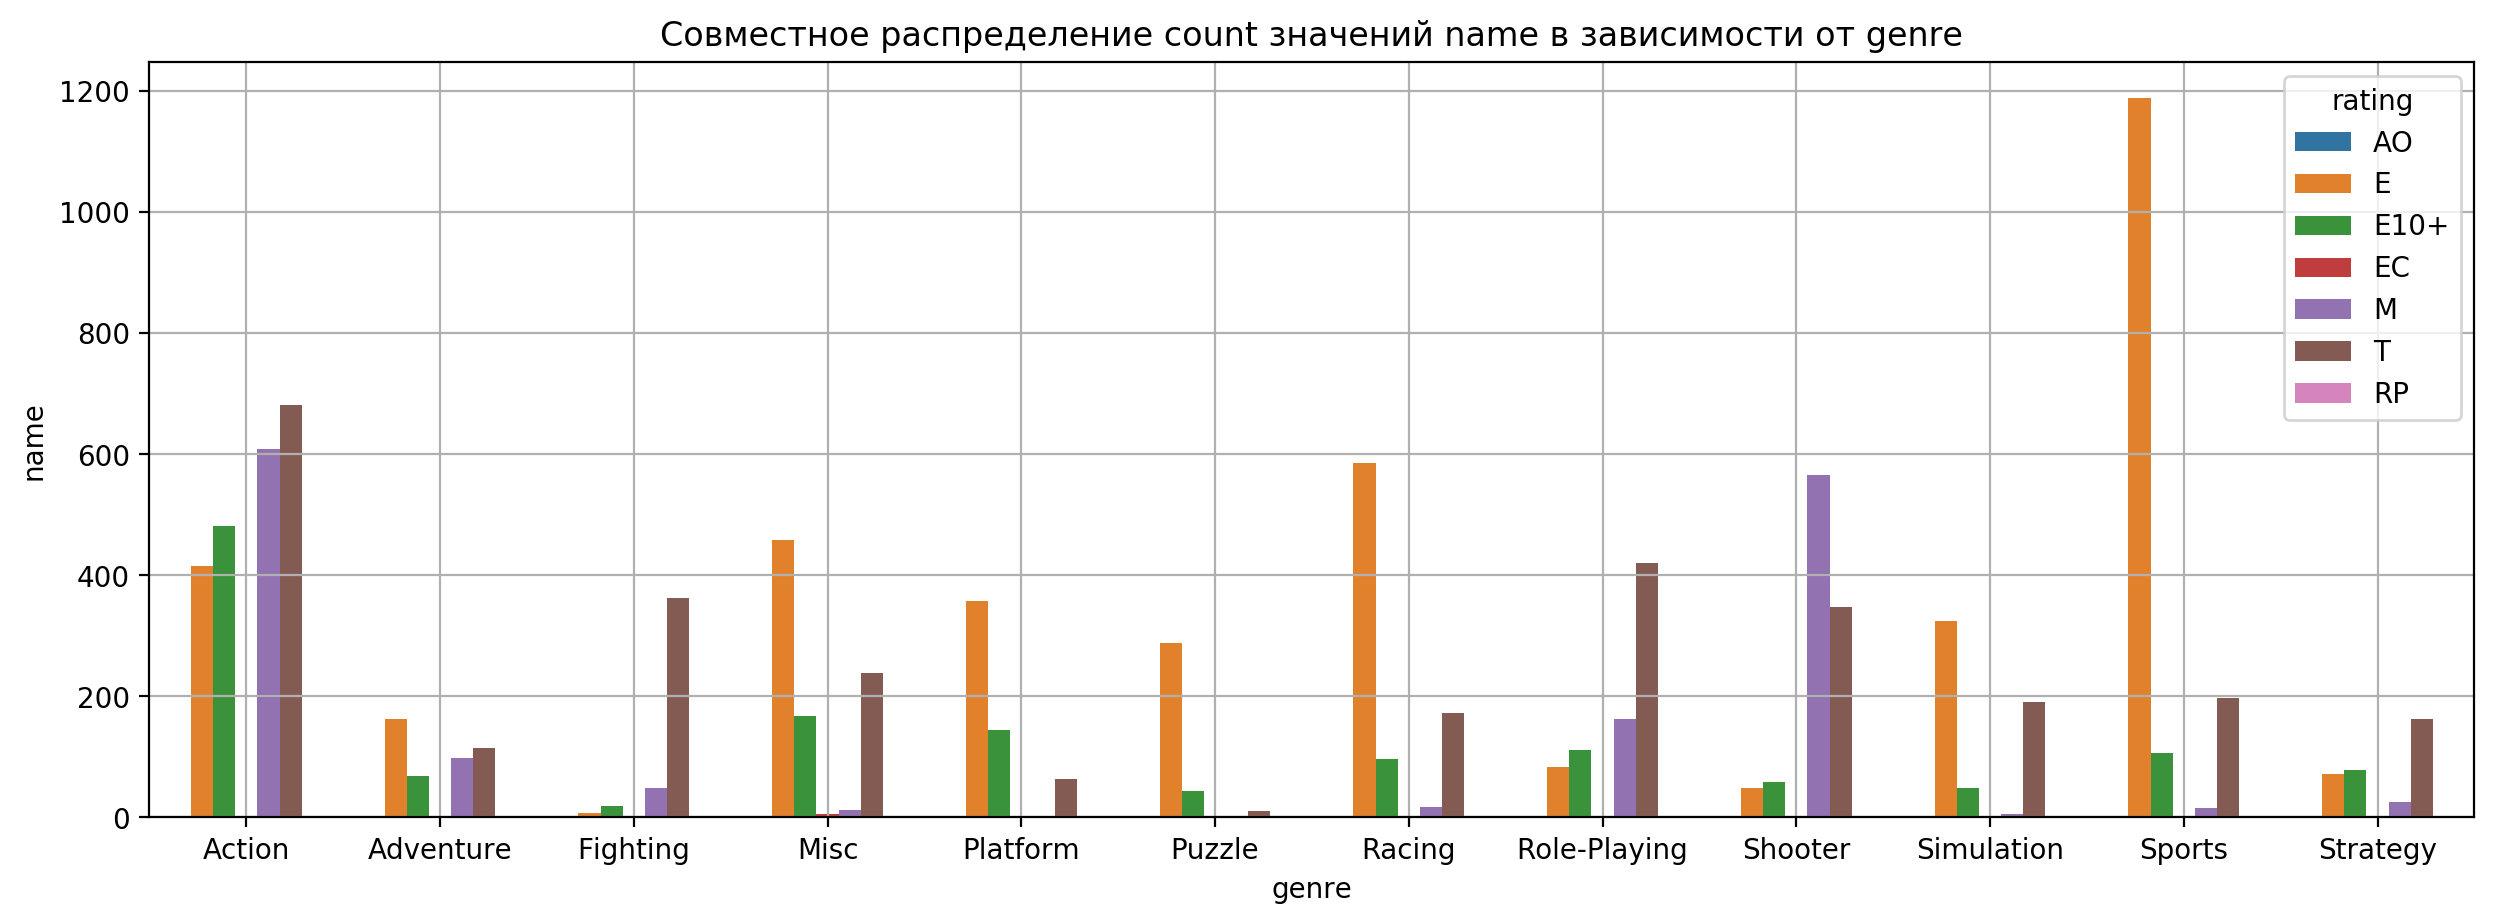

In [59]:
# Применение функции "joint_distribution" для построения графика совместного распределения количества
# значений рейтинка для каждого жанра игры:
joint_distribution_pivot = joint_distribution(games_data, ['genre', 'rating'], 'name', 'count')

In [60]:
# Функция для заполнения пропусков в столбце "rating" в зависимости от распределения рейтингов по каждому жанру:
def fill_rating(data):
    """
    Функция принимает на вход таблицу.
    Действия функции:
    - Создает список с жанрами;
    - В цикле проходит по всем названиям жанров и на каждом шаге:
            - создает последовательность (список) со всеми известным рейтинграми по данному жанру (с 
              их повторениям для реализации вероятности выпадения того или иного рейтинга при случайном выборе)
            - создает список с индексами строк, где есть пропуски в рейтинге
            - в цикле по количеству индексов заполняет пропуски случайным значением из ранее созданной
            последовательности рейтингов
    - Возвращает таблицу
    """
    genre_list = data['genre'].unique()
    for i, name in reversed(list(enumerate(genre_list))):
        sequence = games_data.query('genre == @name & rating.isna() != True')['rating'].tolist()
         
        index_list = games_data.query('genre == @name & rating.isna() == True').index
        for j in range (len(games_data.query('genre == @name & rating.isna() == True'))):
            data.loc[index_list[j], 'rating'] = np.random.choice(sequence)
                                  
    return data

Количество пропусков: 0


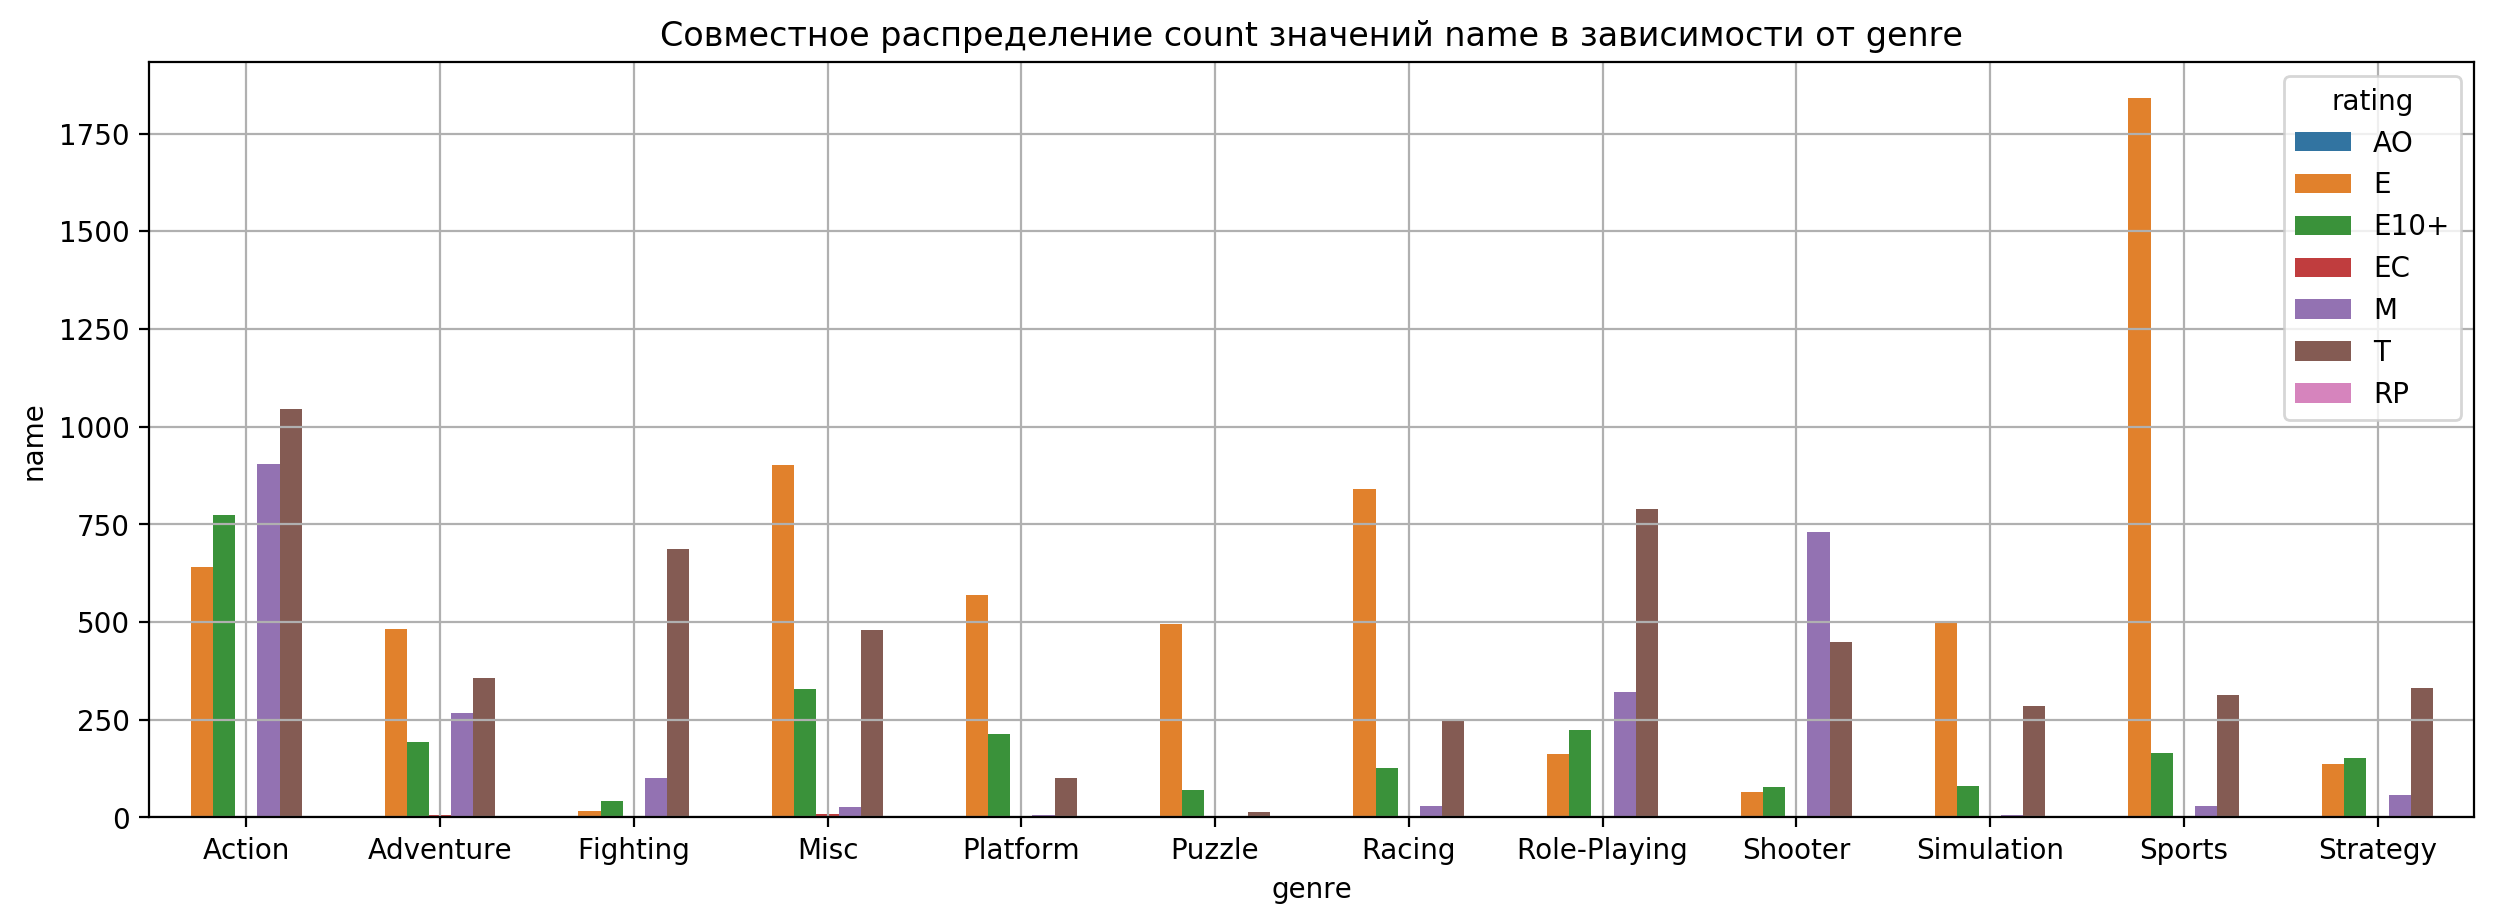

In [61]:
# Вызов функции "fill_rating()" для таблицы "games_data":
games_data = fill_rating(games_data)

# Проверка - количество пропусков
print ('Количество пропусков:', games_data['rating'].isna().sum())

# Проверка заполнения пропусков - 
# Применение функции "joint_distribution" для построения графика совместного распределения количества
# значений рейтинка для каждого жанра игры:
joint_distribution_pivot = joint_distribution(games_data, ['genre', 'rating'], 'name', 'count')


<a href='#content'>*К содержанию*</a>


In [62]:
# Проверка на наличие полных дубликатов в таблице:
games_data.duplicated().sum()

0

### <a id="step2.3"><a>2.3 Необходимые расчеты

In [63]:
# Суммирование продаж по регионам и сохранение результата в столбец "total_sale":
games_data['total_sales'] = (games_data['na_sales'] + games_data['eu_sales']
                             + games_data['jp_sales'] + games_data['other_sales']
                            )
# Проверка - вывод первых 5 строк:
games_data.head(5)

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45          76.0         8.0      E   
1      3.58      6.81         0.77           NaN         NaN      E   
2     12.76      3.79         3.29          82.0         8.3      E   
3     10.93      3.28         2.95          80.0         8.0      E   
4      8.89     10.22         1.00           NaN         NaN      M   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4        31.38

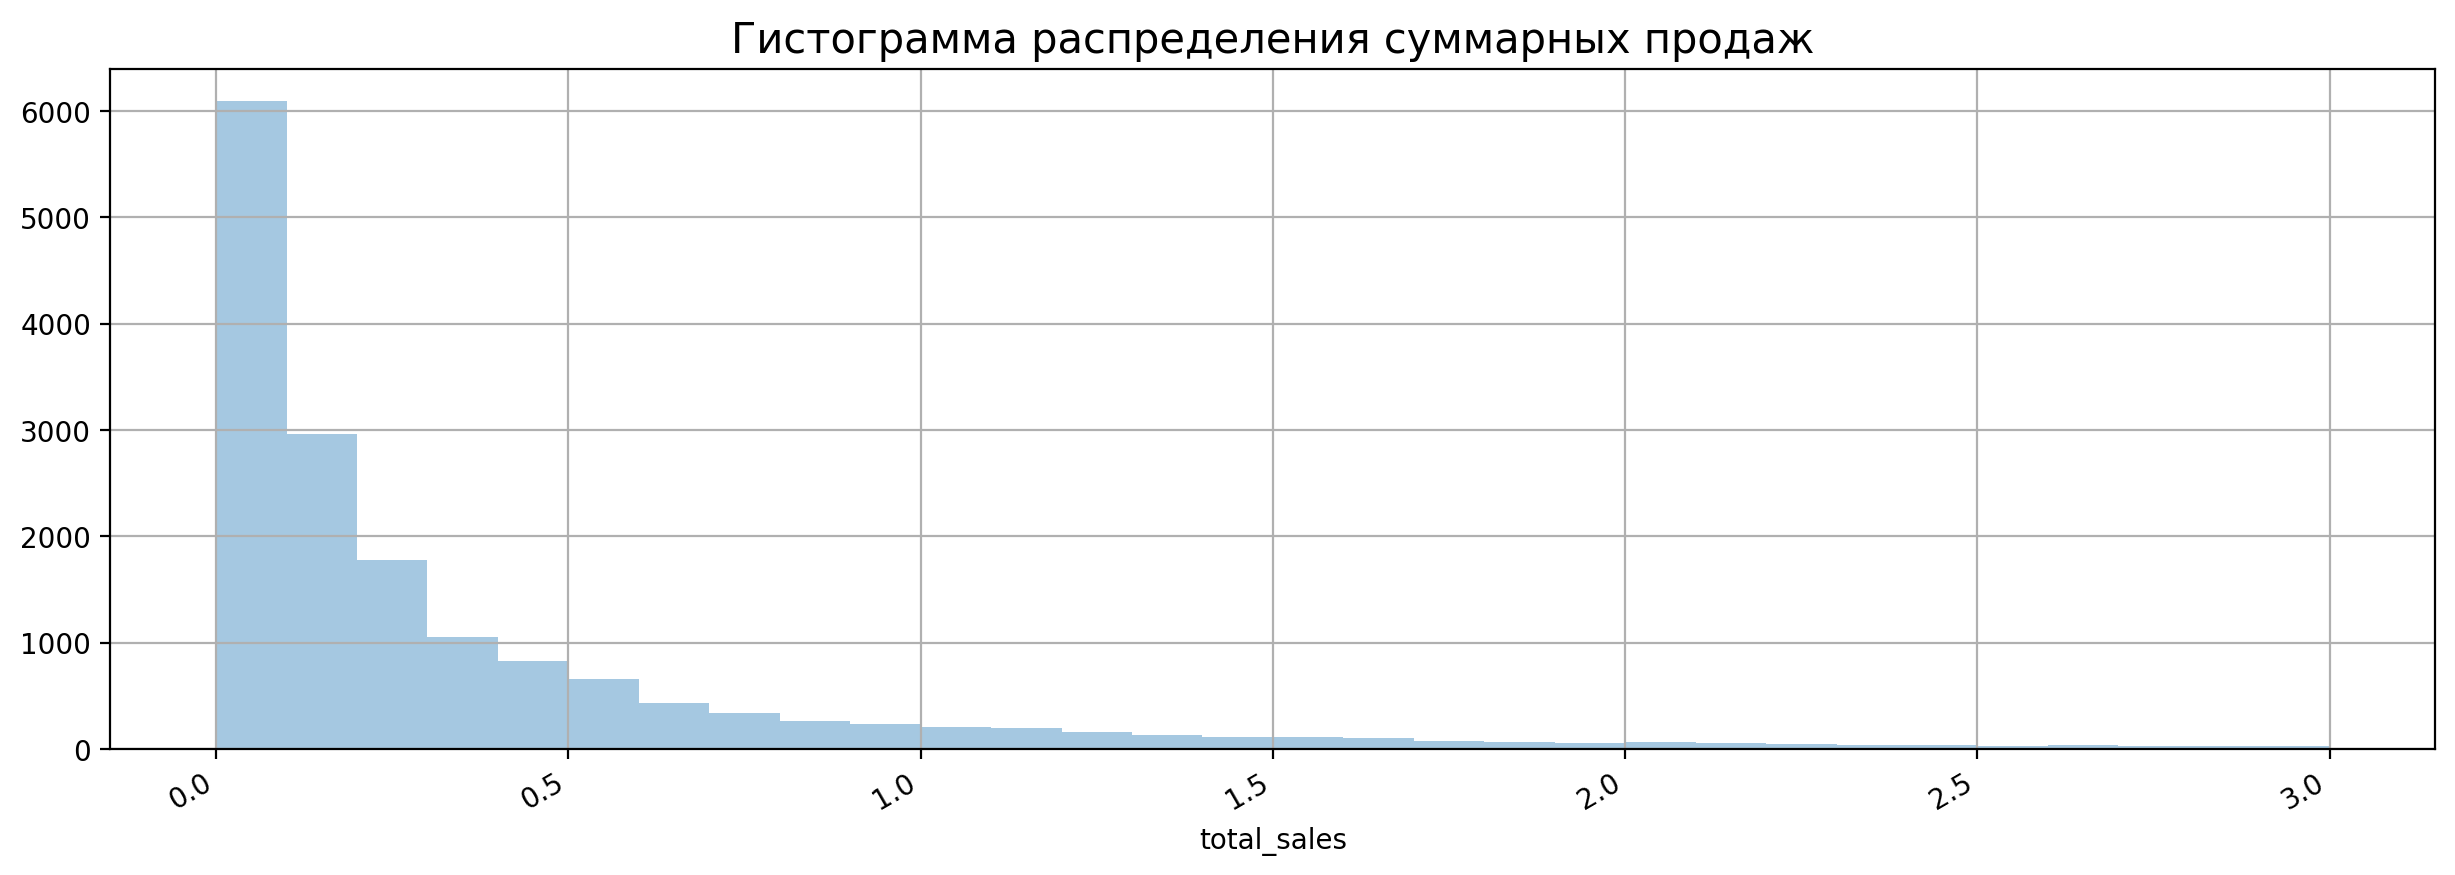

In [64]:
# Построение гистограммы распределения суммарных продаж:
plt.figure(figsize=(15, 5), dpi = 200)
ax = sns.distplot(games_data['total_sales'], bins = 30, kde=False,
                  hist_kws={"range": (0, 3)})
plt.gcf().autofmt_xdate()
ax.set_title('Гистограмма распределения суммарных продаж', fontdict = {'fontsize': 15})
ax.grid()
plt.show()
plt.close()

In [65]:
# Количество игр с суммарными продажами = 0:
games_data.query('total_sales == 0')['total_sales'].count()

2

In [66]:
# Исключаем данные с суммарными продажами = 0:
games_data = games_data.query('total_sales != 0.1')

### <a id="conclution2"><a>Общий вывод по шагу 2:

**На данном шаге:**
- подробно изучили предоставленные данные;
- выявили наличие пропусков в данных, сделали предположения о причинах их появления и, по-возможности, произвели их заполнение;
- оценили данные на наличие аномальных значений и произвели коррекцию этих значений;
- изменили типы данных там, где это необходимо;
- добавили новый столбец с суммарными продажами для каждой игры, обнаружили и удалили игру с нулевыми суммарными продажами, как не имеющие значения для дальнейшего анализа;
- полностью подготовили данные к дальнейшему анализу.


<a href='#content'>*К содержанию*</a>


## <a id="step3"><a>Шаг 3. Исследовательский анализ данных

### <a id="step3.1"><a>3.1 Количество игр, выпущенных в разные годы

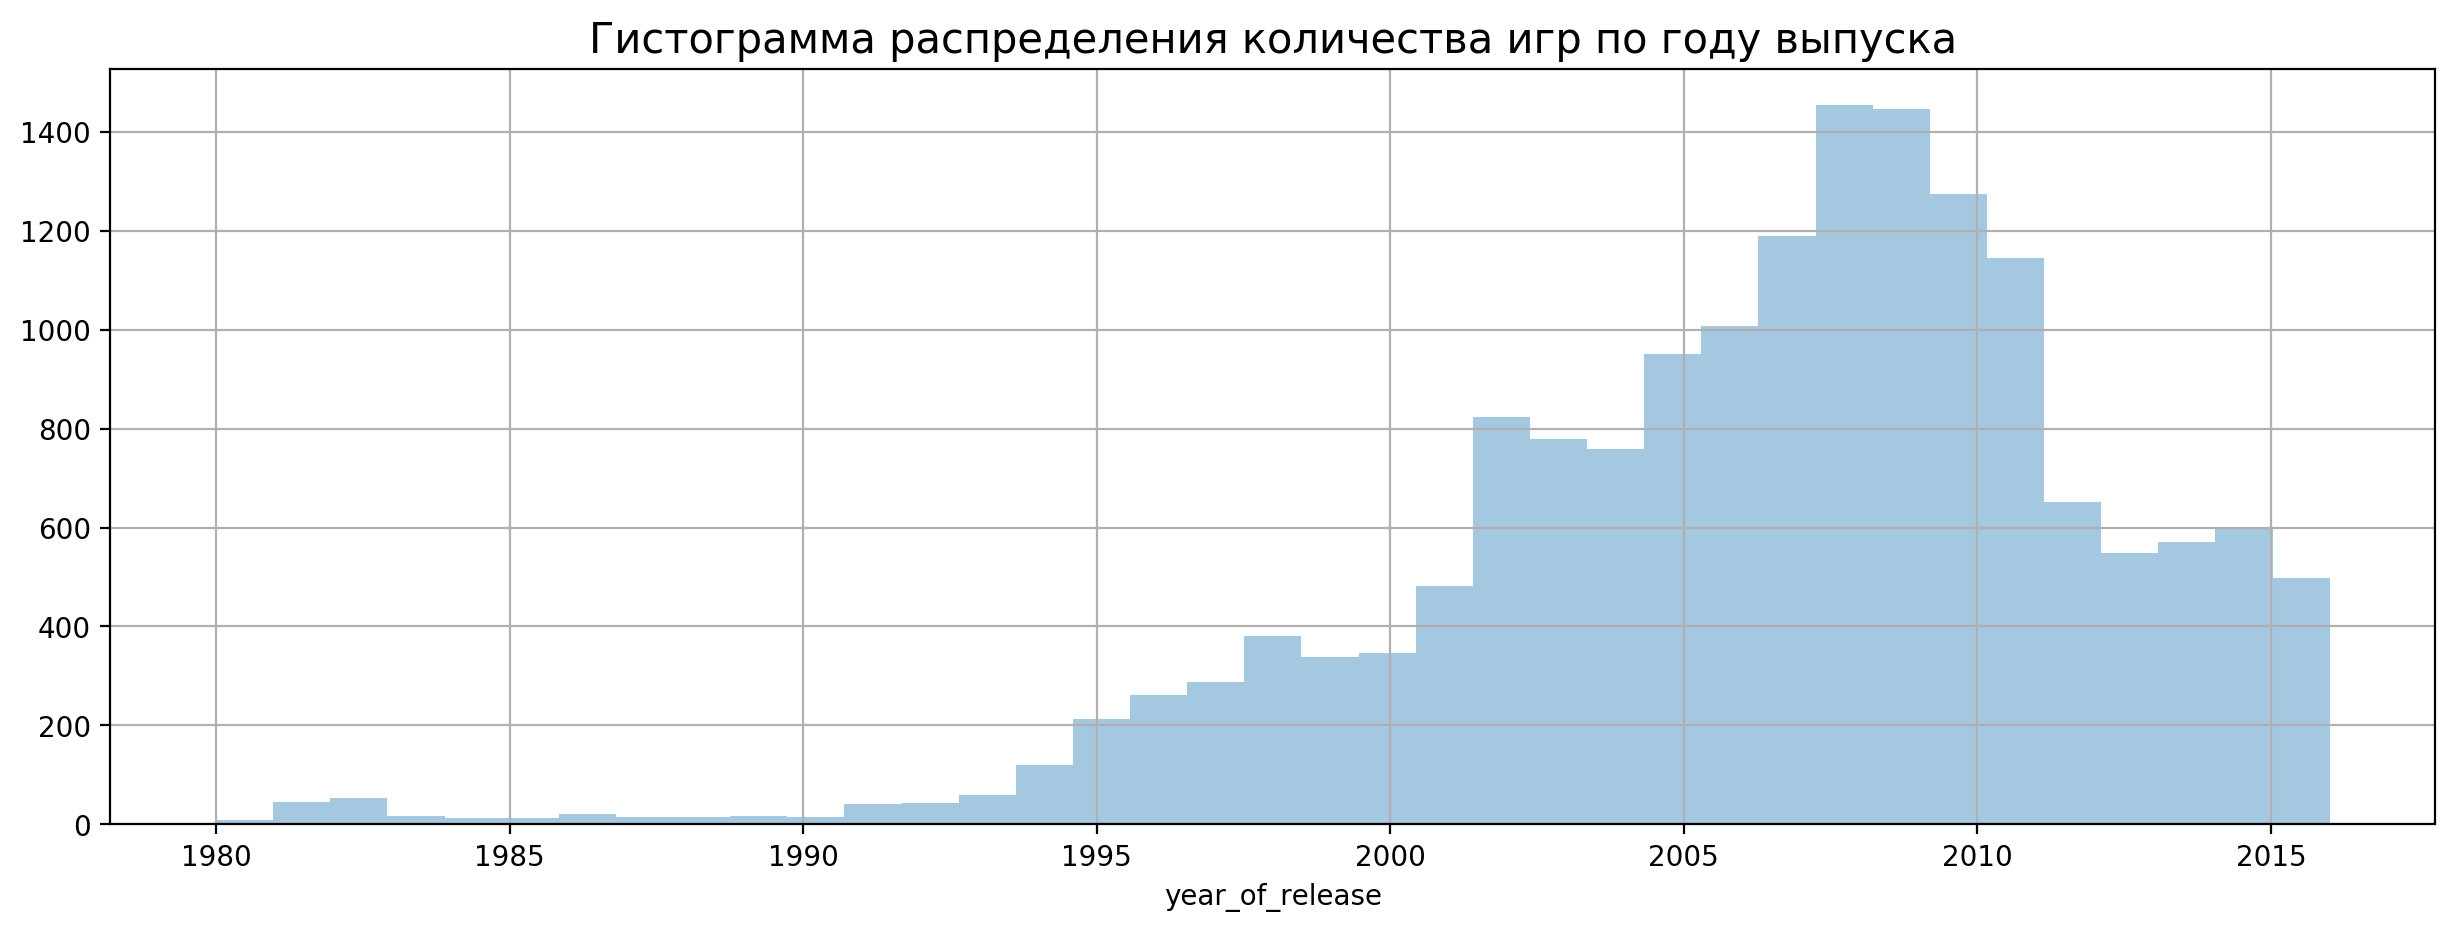

In [67]:
# Построение гистограммы распределения количества игр в зависимости от года выпуска: 
plt.figure(figsize=(15, 5), dpi = 200)
ax = sns.distplot(games_data['year_of_release'], bins=37, kde=False)
#plt.gcf().autofmt_xdate()
ax.set_title('Гистограмма распределения количества игр по году выпуска', fontdict = {'fontsize': 15})
ax.grid()
plt.show()
plt.close()

#### Вывод:
 - до 2008-2009 г.г. наблюдается значительный рост количества выпускаемых игр - это говорит о том, что с течением времени рос интерес к играм, с максимальной популярностью в 2008-2009 г.г.;
 - затем достаточно резкое снижение и выход на некоторый постоянный уровень - можно предположить, что в это время интерес к играм упал, возможно из-за того, что большее развитие имеют игры, выпускающиеся для смартфонов.



<a href='#content'>*К содержанию*</a>


### <a id="step3.2"><a>3.2 Изменение продаж по платформам

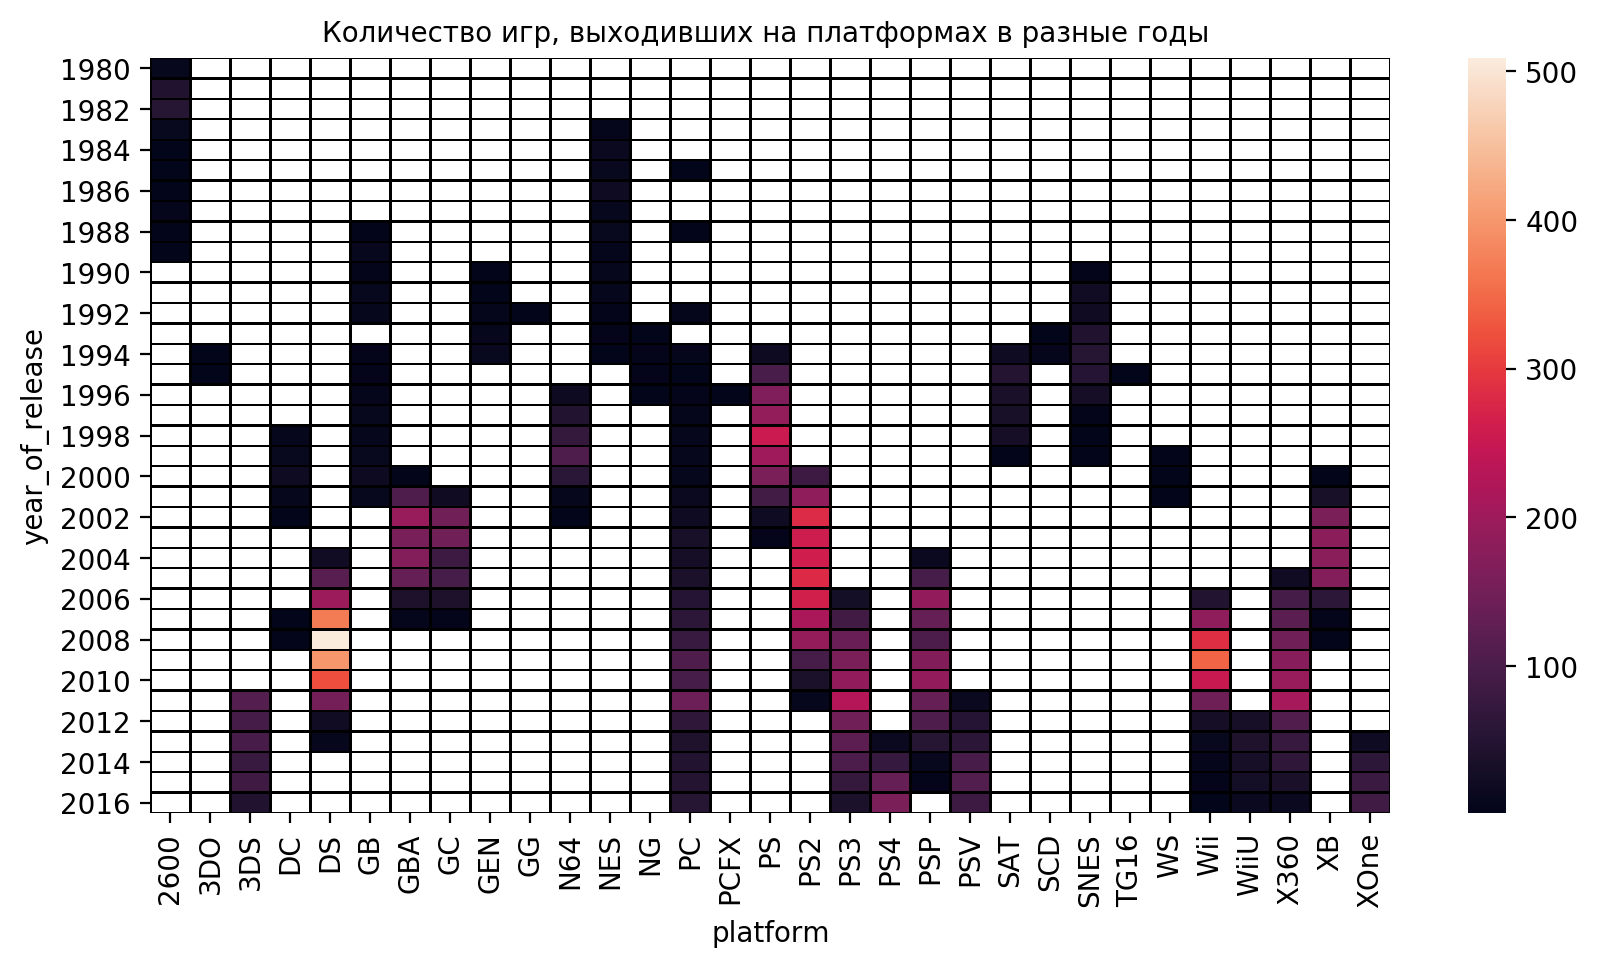

In [68]:
# Вызов функции "heatmap_platform_year" для построения графика "Количество игр, выходивыших на платформах
# в разные годы":
heatmap_platform_year(games_data)

**Промежуточный вывод:** уже по этому графику можно выдеть, что все платформы, за исключением "PC" имеют ограниченный "срок жизни"

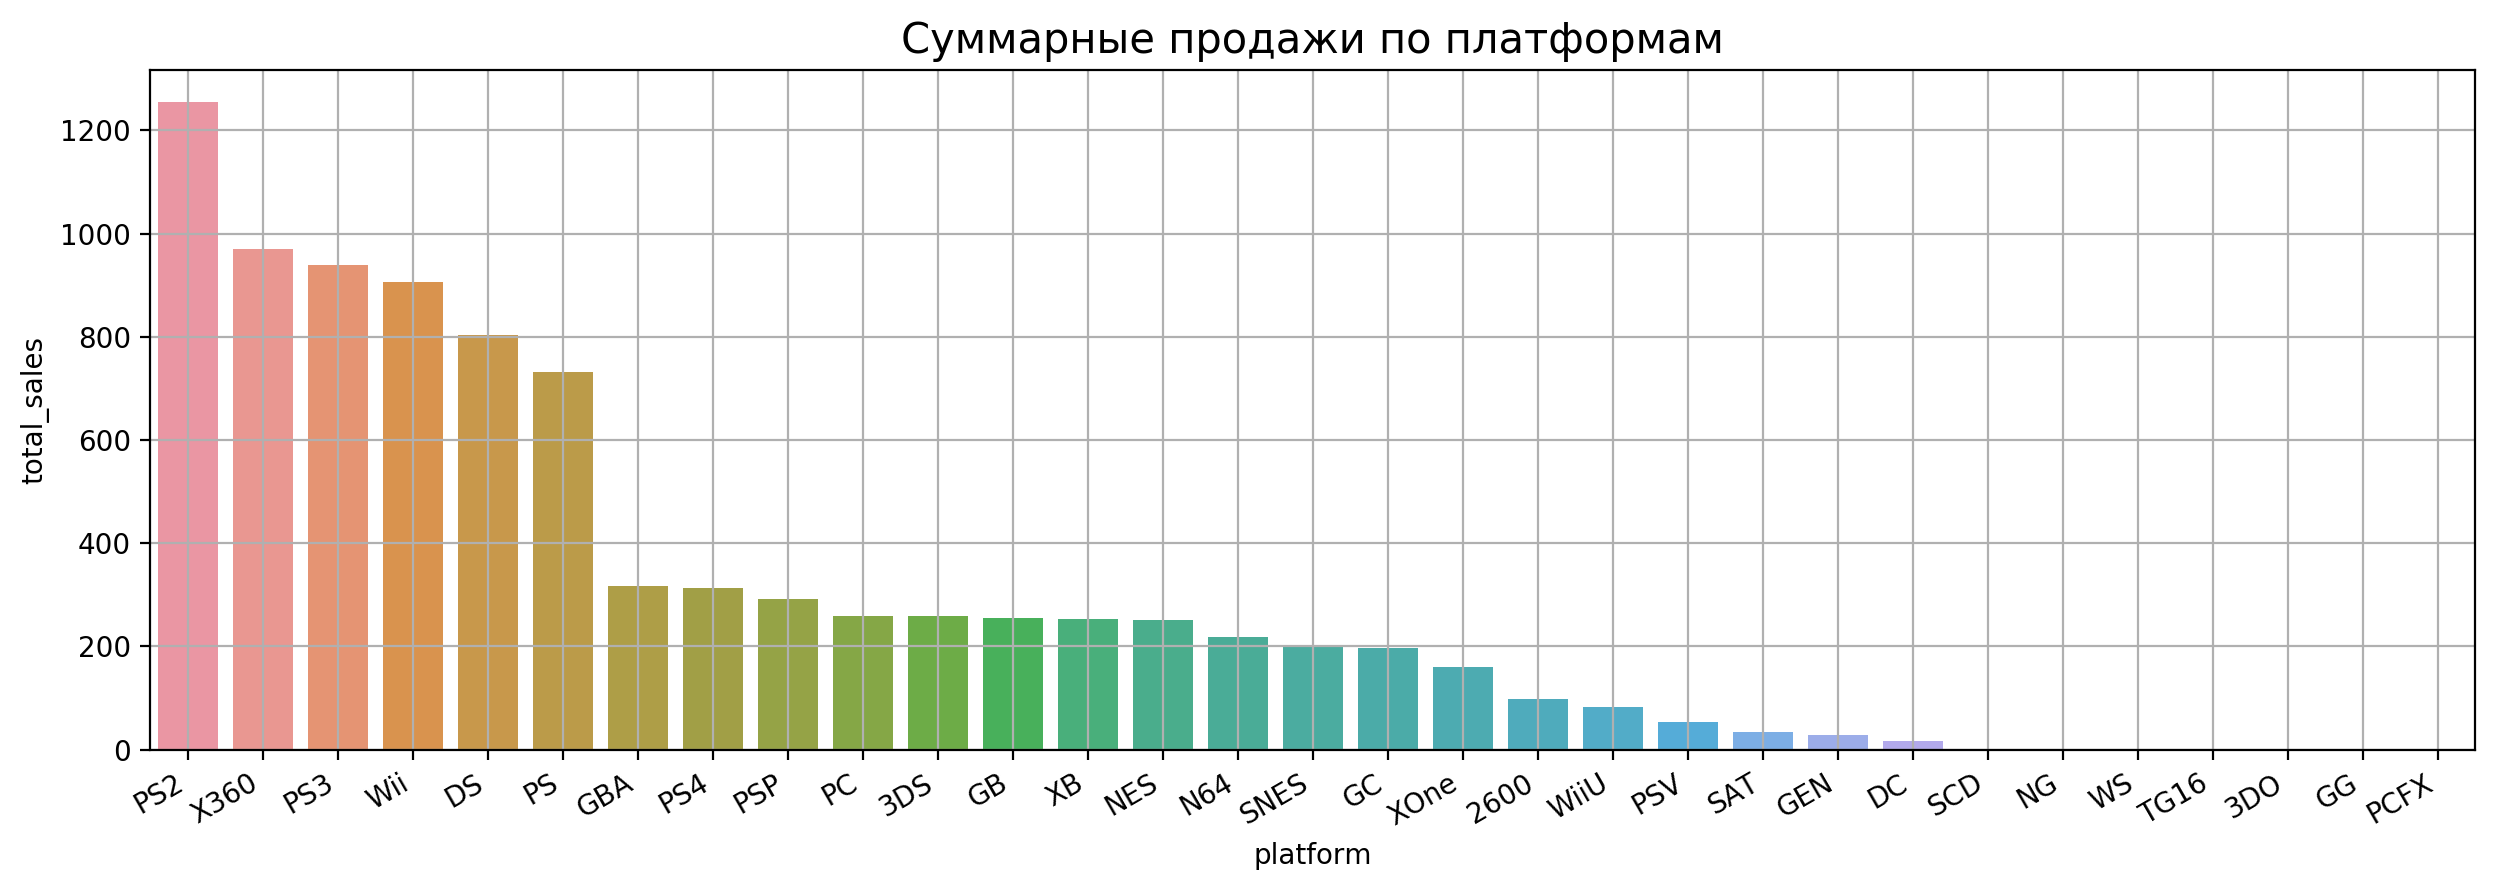

In [69]:
# Сводная таблица для определения суммарных продаж игр по платформам:
platform_total_sales = (games_data
                        .pivot_table(index = 'platform', values = 'total_sales',
                                     aggfunc = 'sum')
                        .reset_index()
                        .sort_values(by = 'total_sales', ascending = False)
                       )

# Построение графика "Суммарные продажи по платформам" для определения топовых платформ за весь период:
plt.figure(figsize=(15, 5), dpi = 200)
ax = sns.barplot(data = platform_total_sales, x='platform', y='total_sales')
plt.gcf().autofmt_xdate()
ax.set_title('Суммарные продажи по платформам', fontdict = {'fontsize': 15})
ax.grid()


**Промежуточный вывод:** по графику отчетливо видно, что можно выделить топ-6 платформ, которые сильно отличаются от остальные по суммарним продажам.

In [70]:
# Создание списка из топ-6 платформ:
top6_platforms_list = platform_total_sales['platform'].head(6).tolist()
# Проверка - вывод списка:
print(top6_platforms_list)

['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS']


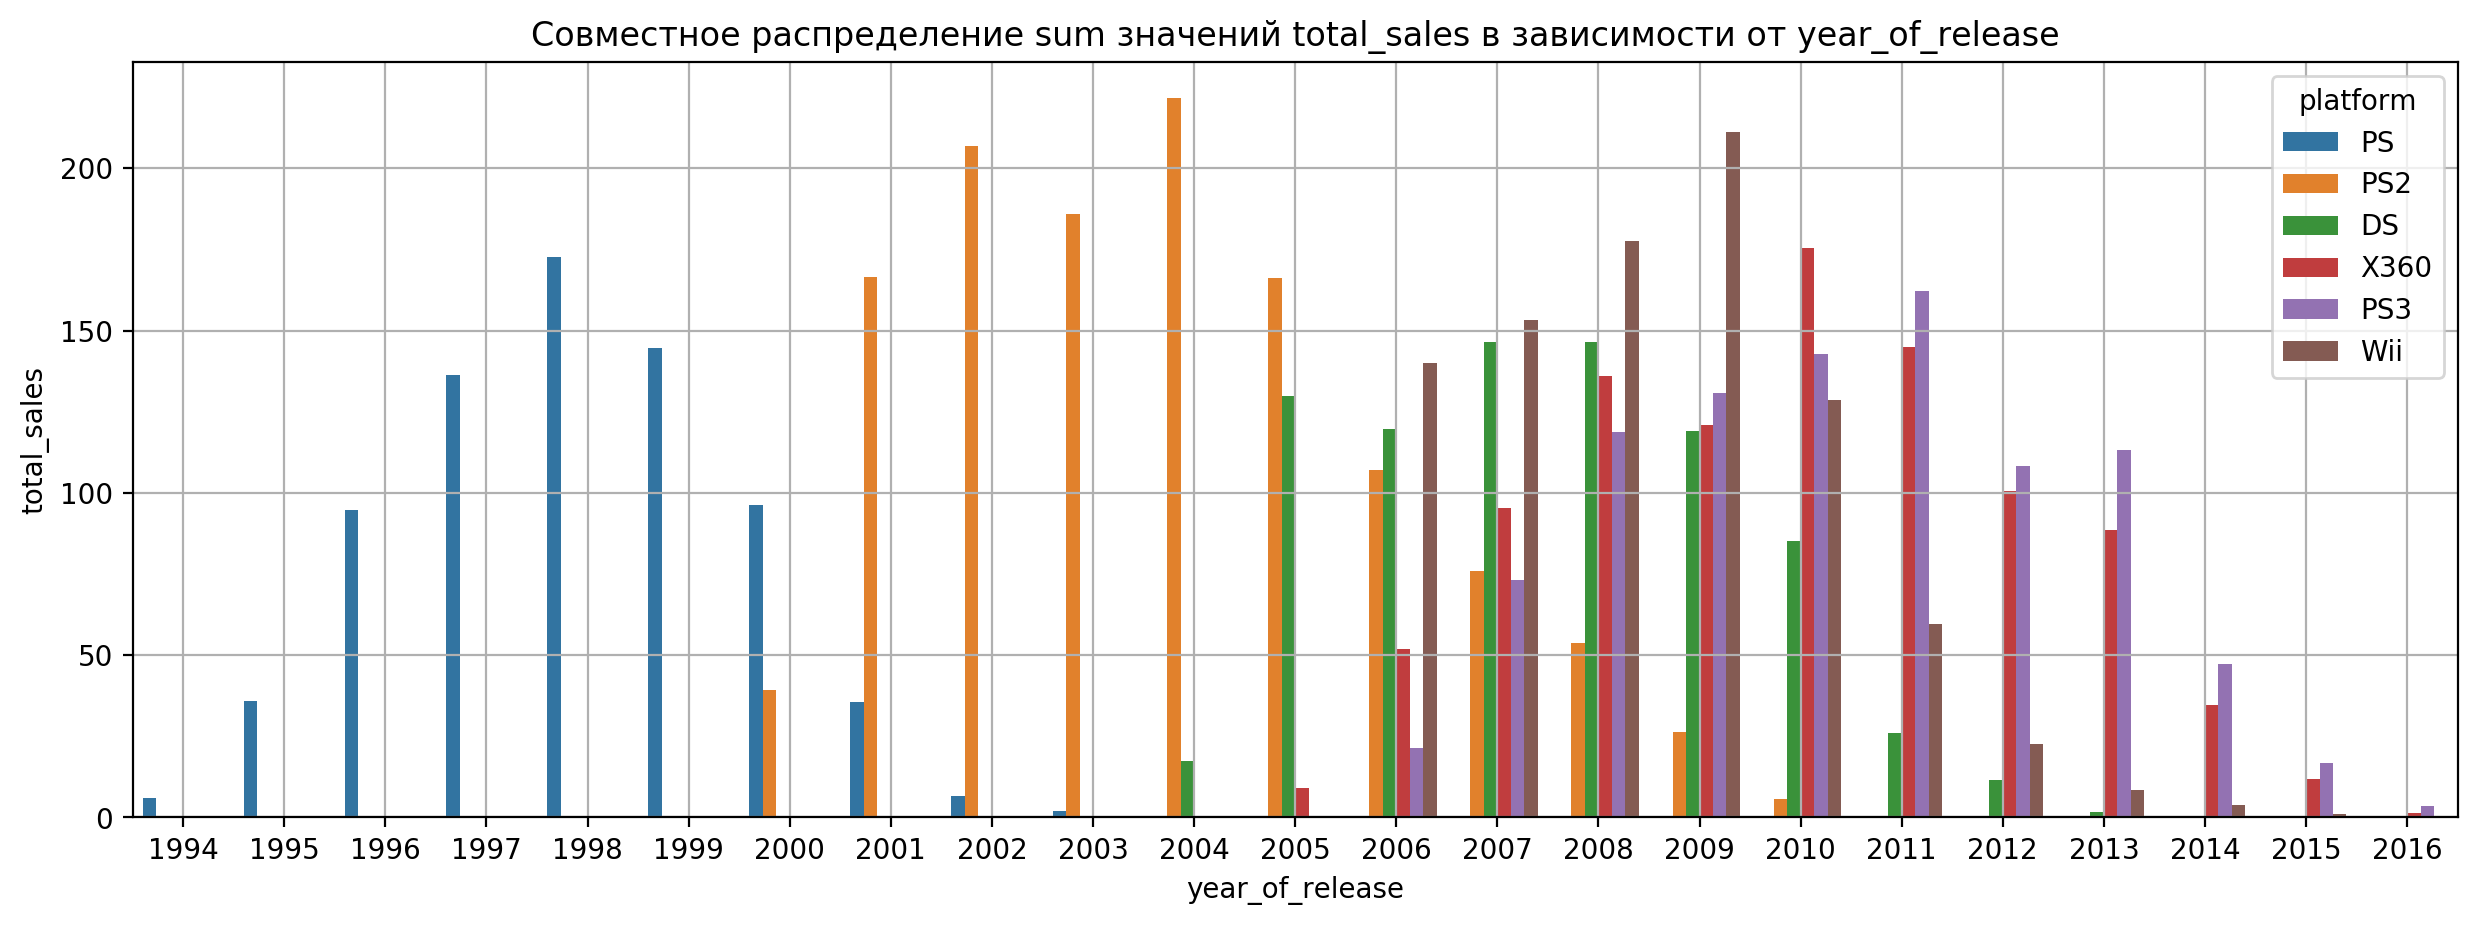

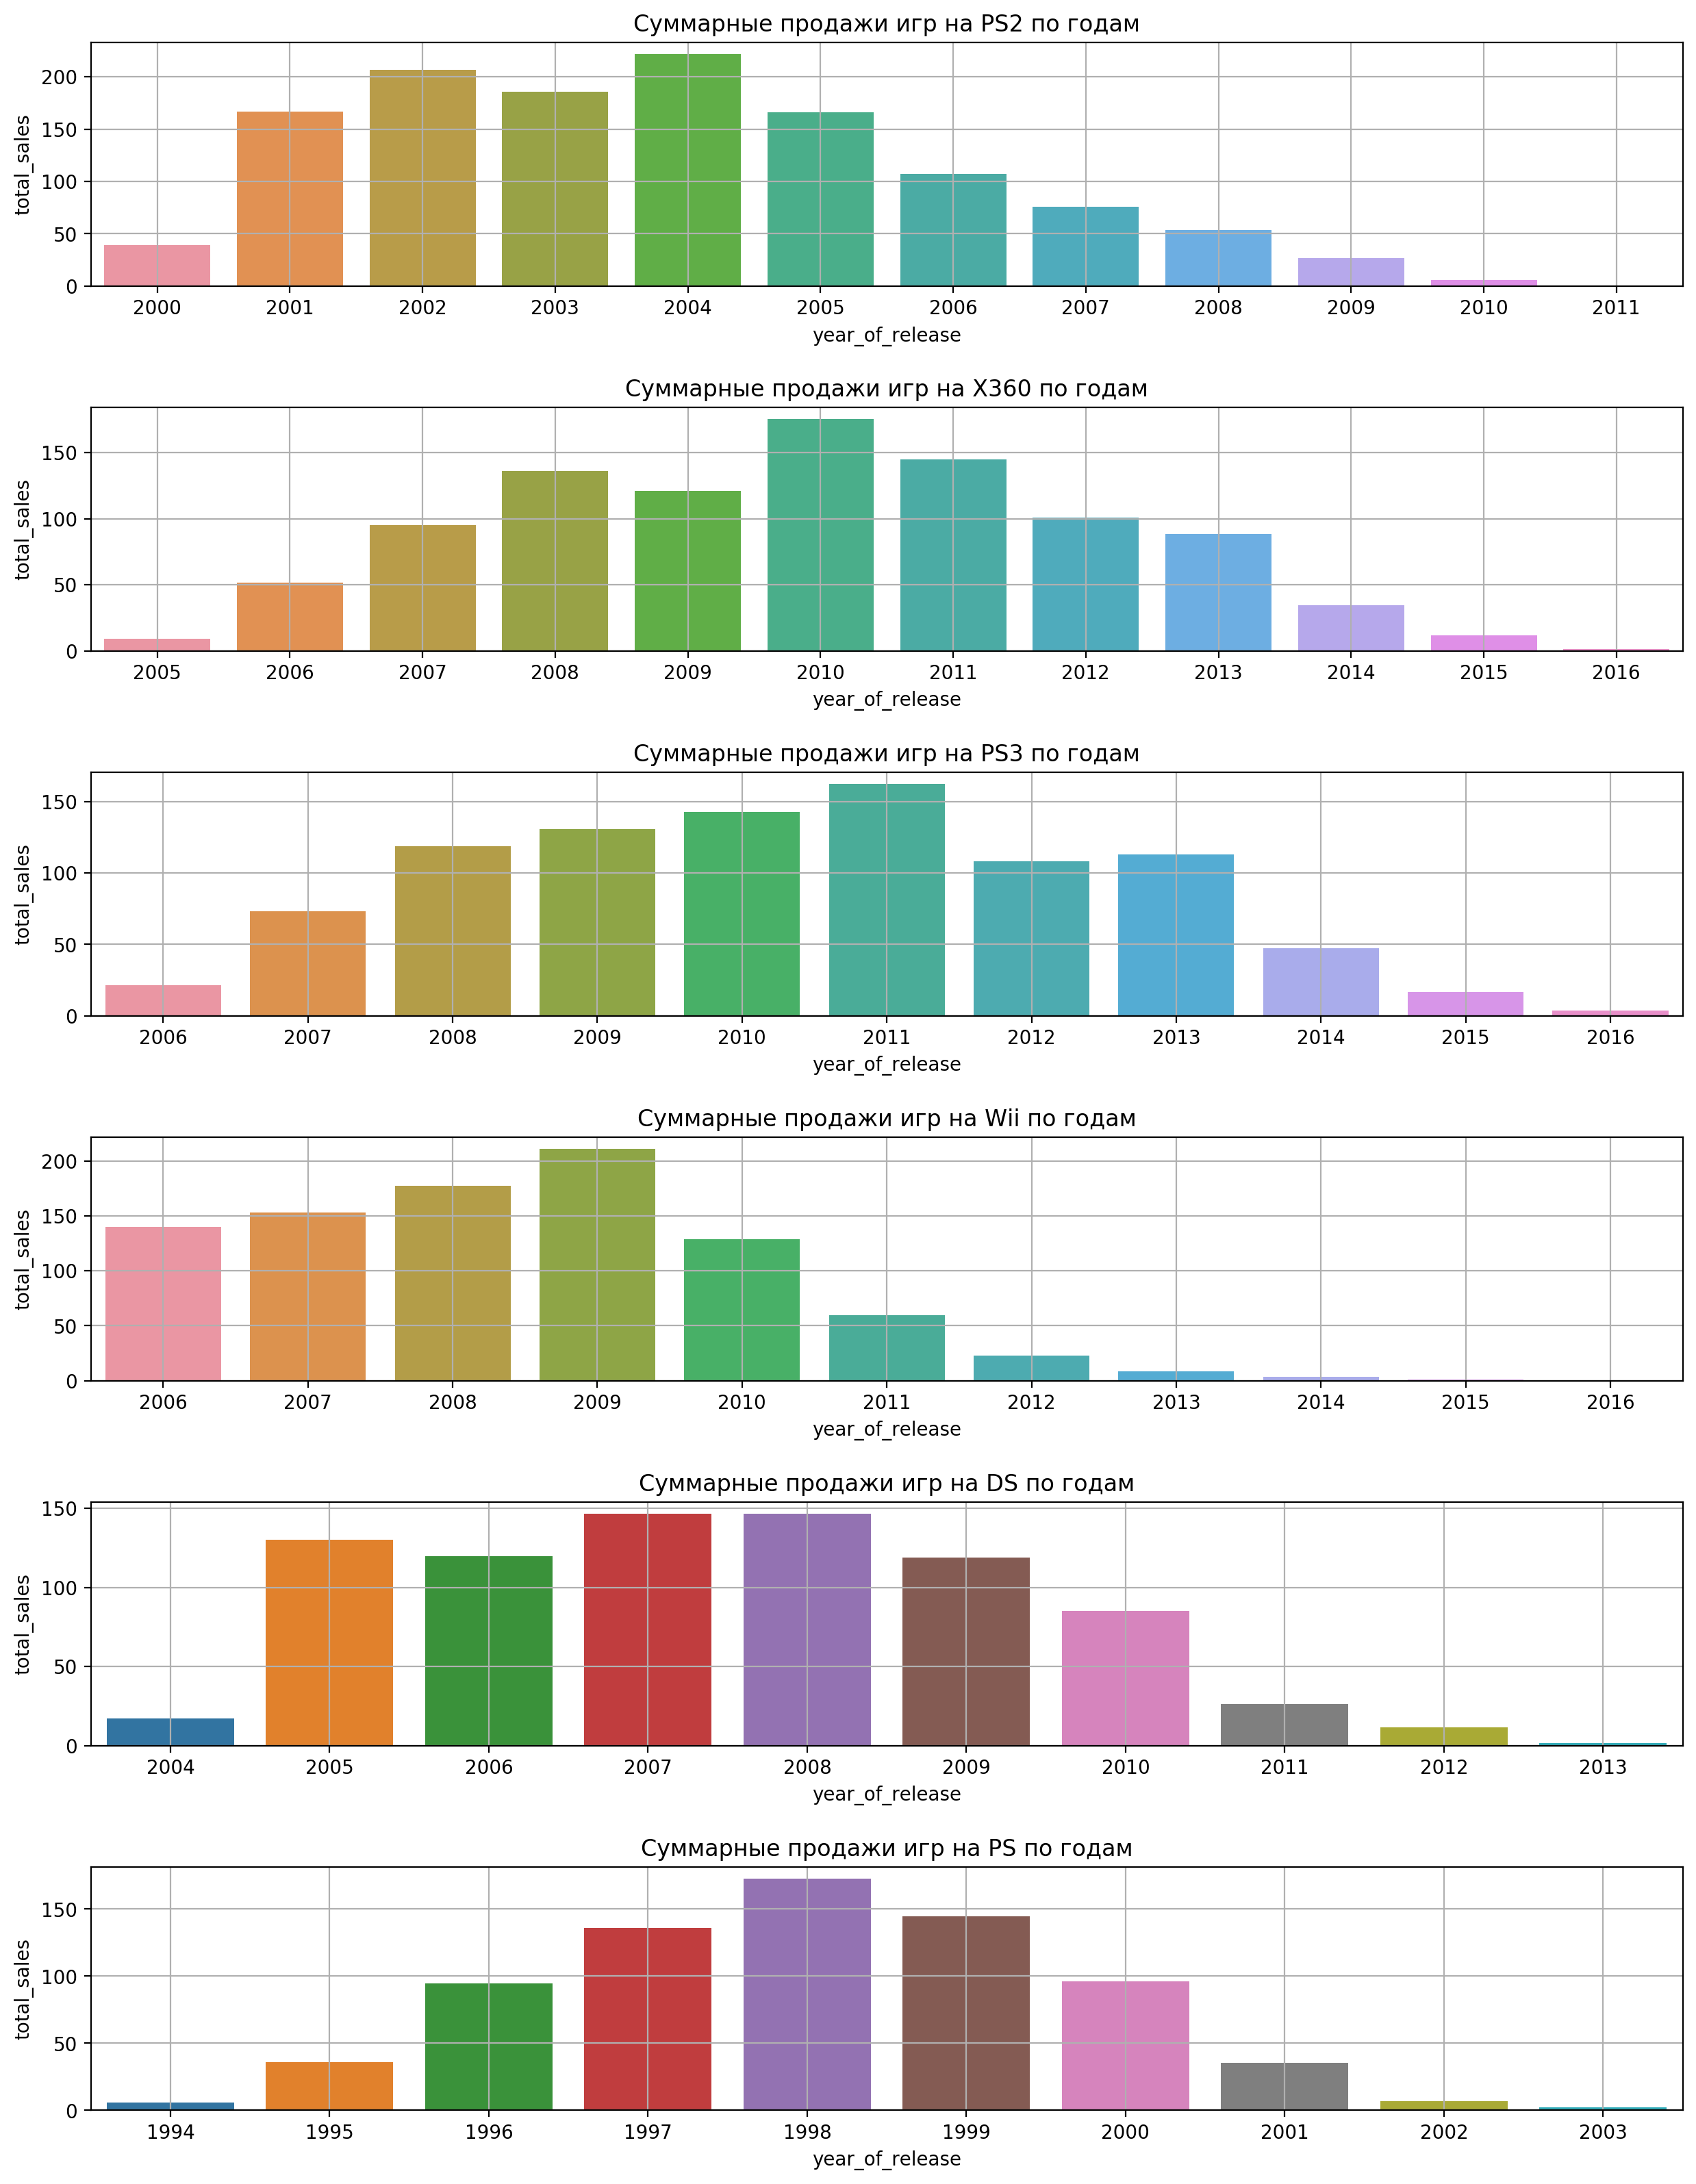

In [71]:
# Вызов функции "joint_distribution" для создания сводной таблицы для топ-6 платформ и построения графика 
# совместного распределения значений суммарных продаж в зависимости от года для топ-6 платформ:
top6_platforms_data = joint_distribution(games_data
                                         .query('platform in @top6_platforms_list'),
                                         ['year_of_release', 'platform'], 'total_sales', 'sum')

# Построение таблицы графиков совместного распределения суммарных продаж в зависимости от года
# в цикле для каждой из топ-6 платформ:
plt.figure(figsize=(15, 20), dpi = 200)
plt.subplots_adjust(hspace=.5)
plt.subplot(6, 1, 1)
for i, platform in list(enumerate(top6_platforms_list)):
    plt.subplot(6, 1, i+1)
    ax = sns.barplot(data=top6_platforms_data.query('platform == @platform'),
                                                    x='year_of_release', y='total_sales')
    ax.set_title('Суммарные продажи игр на ' + platform + ' по годам')
    ax.grid()

plt.show()
plt.close()


#### Вывод:
- По всем полученным графикам хорошо видно, что все платформы имеют свой "срок жизни", причем, за исключением платформы "PC", этот срок ограничен и примерно одинаков.
- По графикам для топ-6 платформ видно, что после появления количество игр в начале растет и достигает своего максимума примерно в середине всего временного промежутка, затем наблюдается спад.
- Данные выводы помогут в дальнейшем определить актуальный период для составления прогноза.


<a href='#content'>*К содержанию*</a>


### <a id="step3.3"><a>3.3 Определение актуального периода и срез данных по данному периоду 

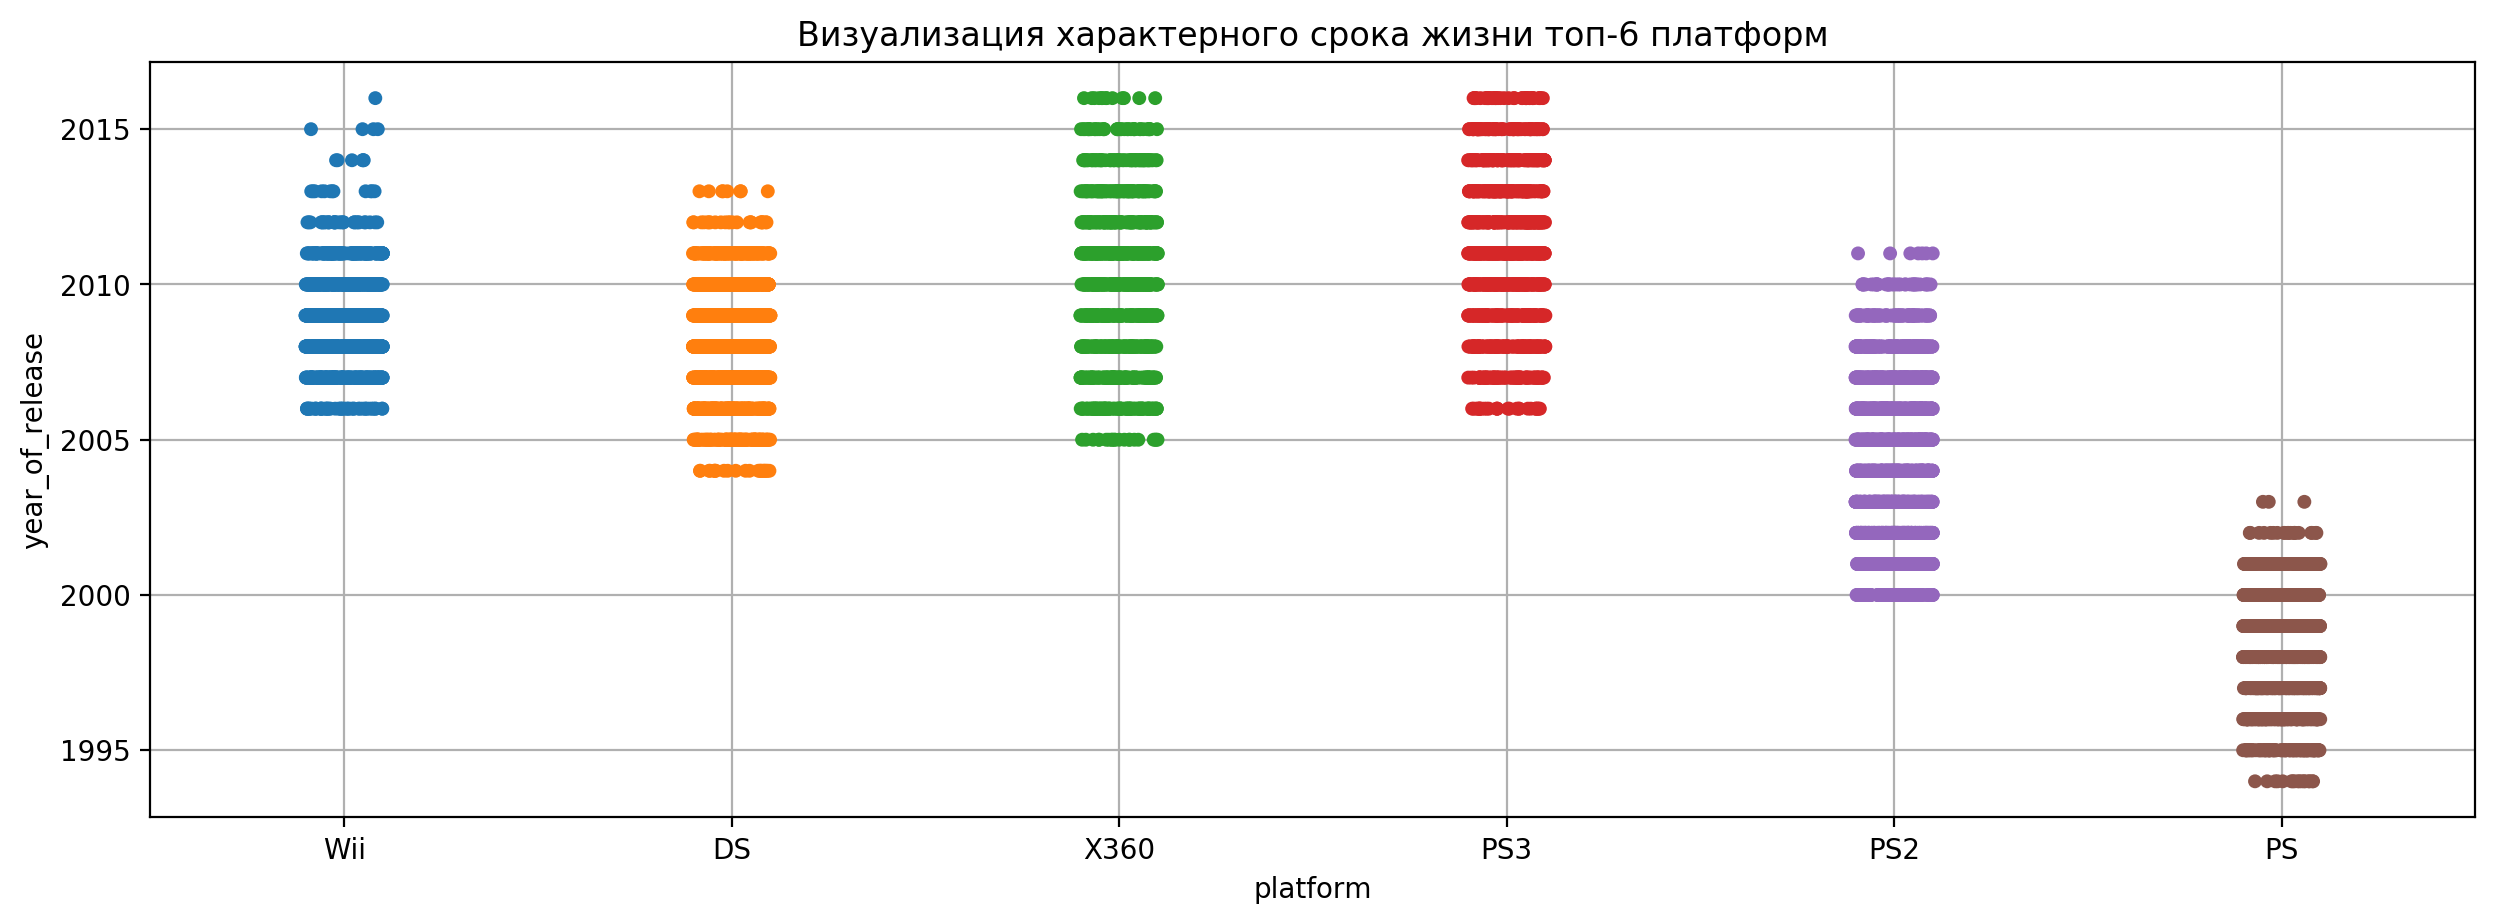

In [72]:
# Построение графика для определения "срока жизни" топ-6 платформ:
plt.figure(figsize=(15, 5), dpi = 200)
sns.despine(bottom=True, left=True)
ax = sns.stripplot(x="platform", y="year_of_release",
              data=games_data.query('platform in @top6_platforms_list'), dodge=True, alpha=1, zorder=10)
ax.set_title('Визуализация характерного срока жизни топ-6 платформ')
ax.grid()
plt.show()
plt.close()


#### Вывод:
- По данному графику можно определить, что "срок жизни" платформы составляет около 10 лет
- Предлагается, в качестве актуального периода для дальнейшего анализа, взять данные за половину данного срока, а именно 5 лет и сразу исключить те платформы, по которым не выпускались игры за последний год (ориентируясь на график "Количество игр, выходивыших на платформах в разные годы") - таким образом, мы получим данные по актуальным платформам.

In [73]:
# Создание списка с актуальными платформами:
relevant_platforms_list = games_data.query('year_of_release > 2015')['platform'].unique().tolist()

# Вывод полученного списка:
print(relevant_platforms_list)

# Создание новой таблицы по актуальному периоду с данными по актуальным платформам:
relevant_data = games_data.query('year_of_release > 2011 & platform in @relevant_platforms_list')

['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'PC', 'X360', 'PSV', 'Wii']



<a href='#content'>*К содержанию*</a>


### <a id="step3.4"><a>3.4 Выбор потенциально прибыльных платформ

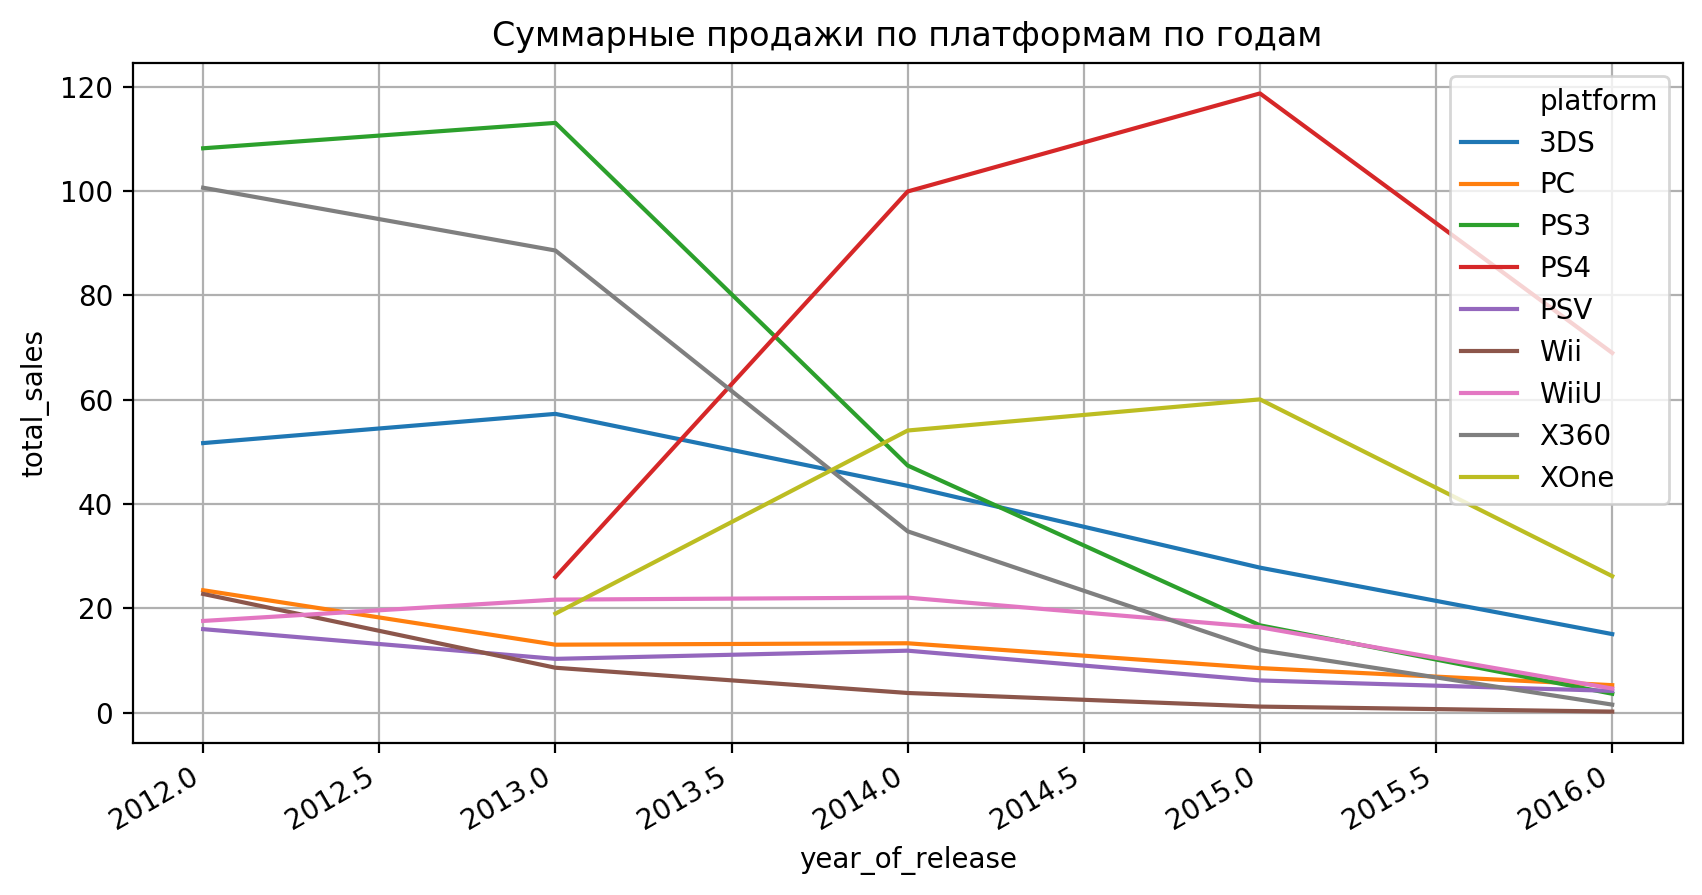

In [74]:
# Сводная таблица суммарных продаж по годам для каждой платфоры:
relevant_platforms_data = (relevant_data
                       .pivot_table(index = ['platform', 'year_of_release'], values = 'total_sales',
                                    aggfunc = 'sum')
                       .reset_index()
                      )

# Построение графика суммарных продаж в зависимовти от года для каждой платформы:
plt.figure(figsize=(10, 5), dpi = 200)

ax = sns.lineplot(data=relevant_platforms_data, x='year_of_release', y='total_sales', hue='platform')
plt.gcf().autofmt_xdate()
ax.set_title('Суммарные продажи по платформам по годам')
ax.grid()

plt.show()
plt.close()

#### Вывод:
- Нужно отметить, что продажи по абсолютно всем платформам падают, даже по наиболее прибыльным: поэтому необходимо иметь ввиду, что в скором будущем возможно будет обновление платформ и соответственно, выход игр для них.
- По данному графику можно выделить три наиболее прибыльные платформы: 'PS4', 'XOne', '3DS'
- По остальным платформам суммарные продажи значительно меньше и с учетом того, что по все платформам продажи падают, можно считать, что продажи по ним в следующем году будут еще меньше.
- что интересно отметить - в топ попали три совершенно разные платформы, разных производителей, а не разные поколения одной игровой платформы.

In [75]:
# Список из топ-3 платформ
top_platforms = ['PS4', 'XOne', '3DS']


<a href='#content'>*К содержанию*</a>


### <a id="step3.5"><a>3.5 Глобальные продажи игр в разбивке по платформам

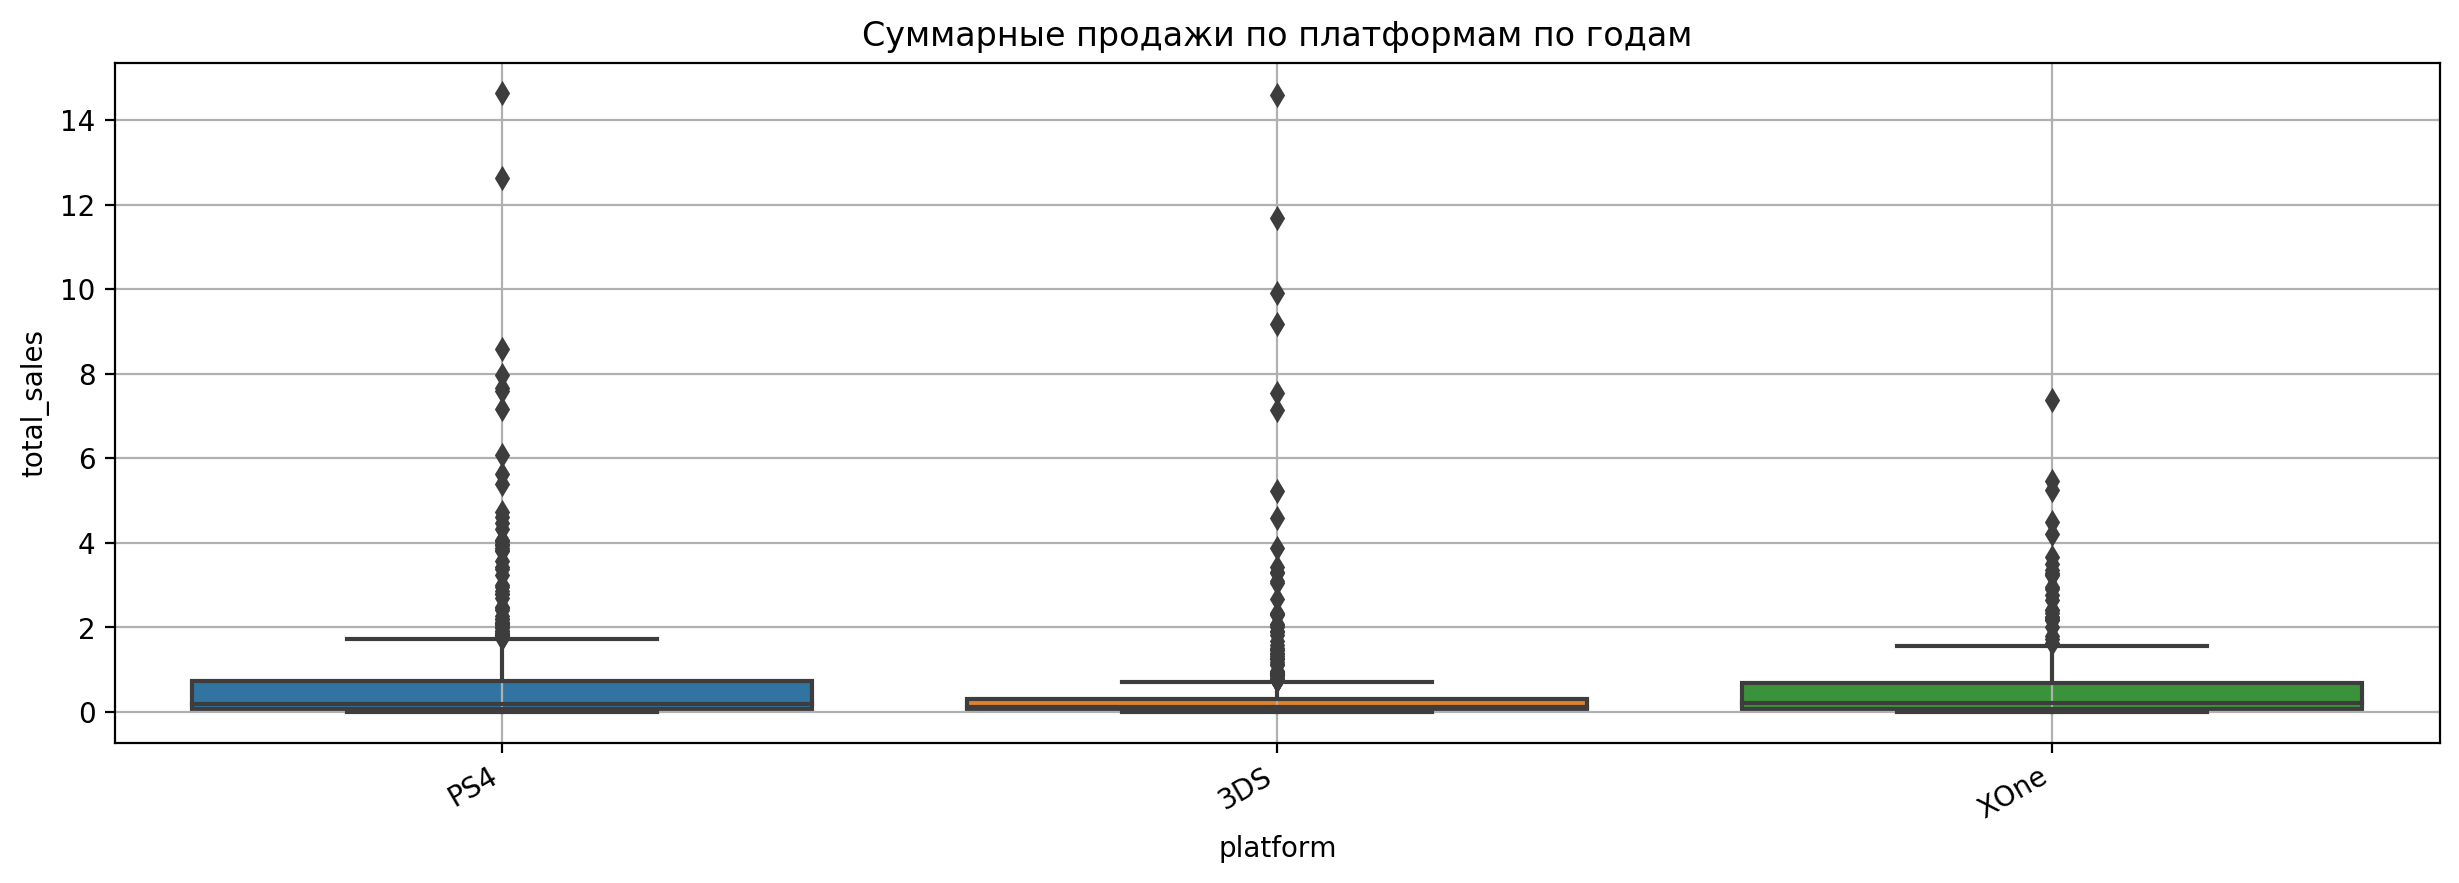

In [76]:
# Построение графиков "boxplot" для потенциально прибыльных платформ :
plt.figure(figsize=(15, 5), dpi = 200)

ax = sns.boxplot(data=relevant_data.query('platform in @top_platforms'),
                 x='platform', y='total_sales')
plt.gcf().autofmt_xdate()
ax.set_title('Суммарные продажи по платформам по годам')
ax.grid()

plt.show()
plt.close()


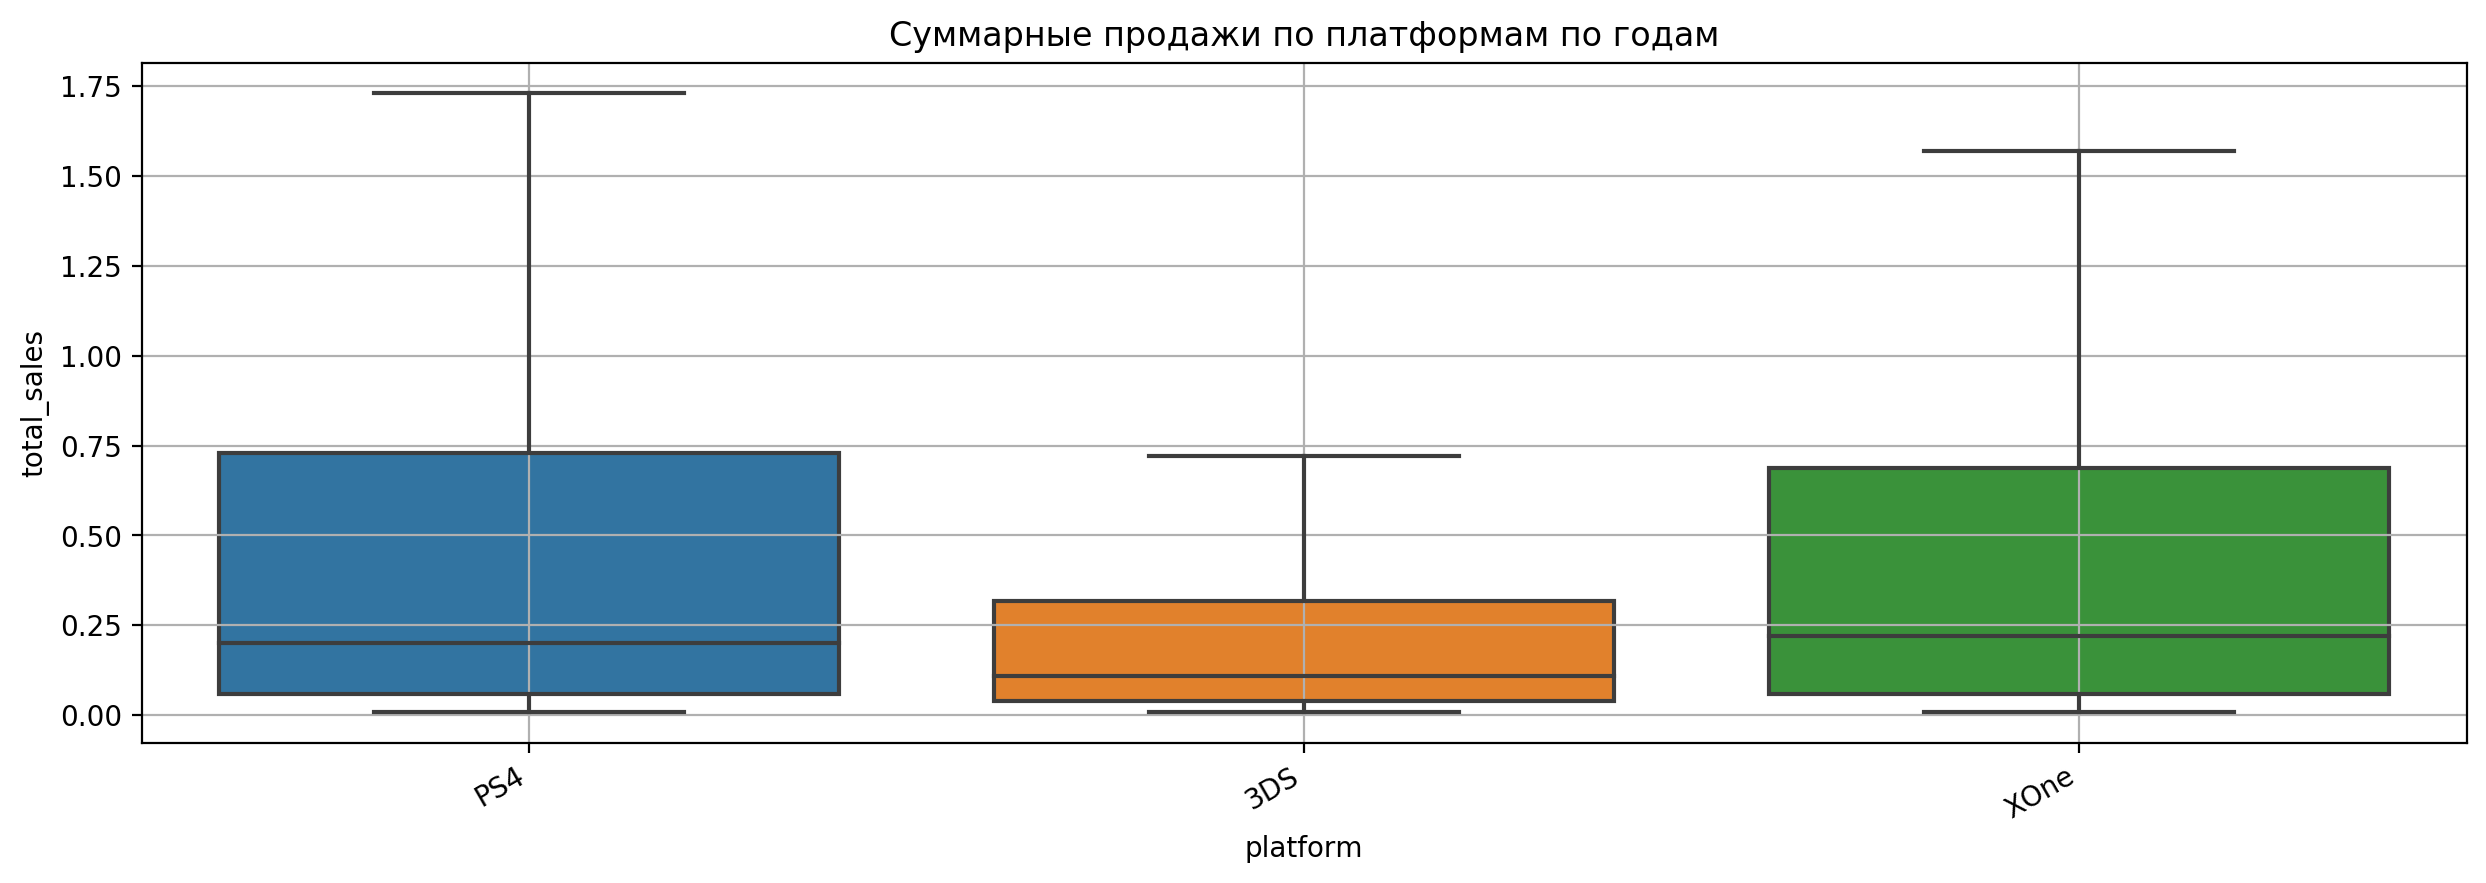

In [77]:
# Построение графиков "boxplot" для потенциально прибыльных платформ (без выбросов):
plt.figure(figsize=(15, 5), dpi = 200)

ax = sns.boxplot(data=relevant_data.query('platform in @top_platforms'),
                 x='platform', y='total_sales', showfliers=False)
plt.gcf().autofmt_xdate()
ax.set_title('Суммарные продажи по платформам по годам')
ax.grid()

plt.show()
plt.close()


#### Вывод:
- По первому графику (с выбросами):
    - Максимальные значения суммарных продаж для платформ "PS4" и "3DS" находятся на одном уровне, тогда как для "XOne" примерно в два раза меньше - это говорит о том, что среди игр для первых двух платформ встречаются отдельные игры наибольшими суммарными продажами.
- По второму графику (построен без выбросов):
    - ситуация с суммарными продажами для платформ "PS4" и "XOne" в целом очень похожа, а вот по платформе "3DS" верхняя граница "усов" лежит примерно на том же уровне, что и положение третьего квартиля для первых двух платформ
    - это говорит о том, что почти все значения суммарных продаж по играм для платформы лежат в диапазоне, В котором для двух других платформ лежит всего лишь 75% продаж
    - поэтому в целом, не беря в расчет выбросы, можно сказать, что суммарные продажи по платформам "PS4" и "XOne" значительно выше, чем продажи игр для платформы "3DS"


<a href='#content'>*К содержанию*</a>


### <a id="step3.6"><a>3.6 Влияние отзывов на продажи для топовых платформ

In [78]:
# Функция для оценки влияния отзывов на продажи:
def score_sales (data, platform):
    """
    Функция принимает на вход таблицу и название платформы.
    Действия функции:
    - Создает таблицу - матрицу корреляций для значений оценок критиков, пользователей и суммарных продаж
      для выбранной платформы
    - Строит график типа "heatmap" по полученной таблице
    - Строит матрицу диаграмм рассеяния для значений оценок критиков, пользователей и суммарных продаж
      для выбранной платформы 
    """
    # Таблица: матрица корреляций
    score_sales_corr = (data
                    .query('platform == @platform')[['user_score', 'critic_score', 'total_sales']]
                    .corr()
                   )
    
    # Построение графика по таблице:
    plt.figure(figsize=(5, 3), dpi = 200)
    ax = sns.heatmap(score_sales_corr, linewidths=1, annot = True, linecolor='black', square = True)
    ax.set_title('Матрица корреляций и матрица диаграмм рассеяния для платформы ' + platform,
                 fontdict = {'fontsize': 15})
    plt.show()
    plt.close()
    
    # Построение матрицы диаграмм рассеяния:
    plt.figure()
    ax = sns.pairplot(data.query('platform == @platform'),
                  vars = ['user_score', 'critic_score', 'total_sales'], height=2.5, aspect=1.5,
                    kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws': {'color':'purple'}}, 
                      diag_kws={'color':'black'})
    
    plt.show()
    plt.close()

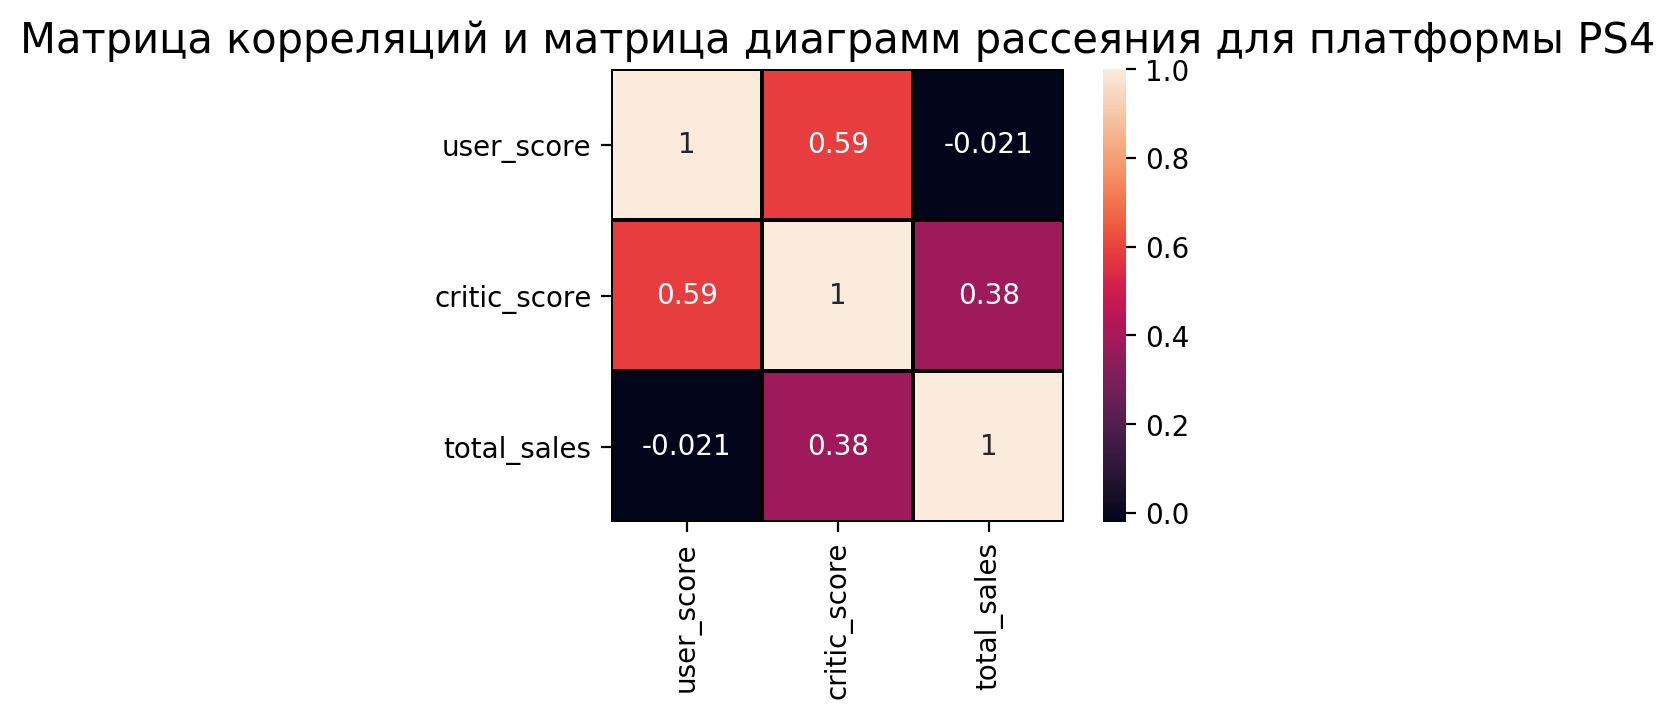

<Figure size 432x288 with 0 Axes>

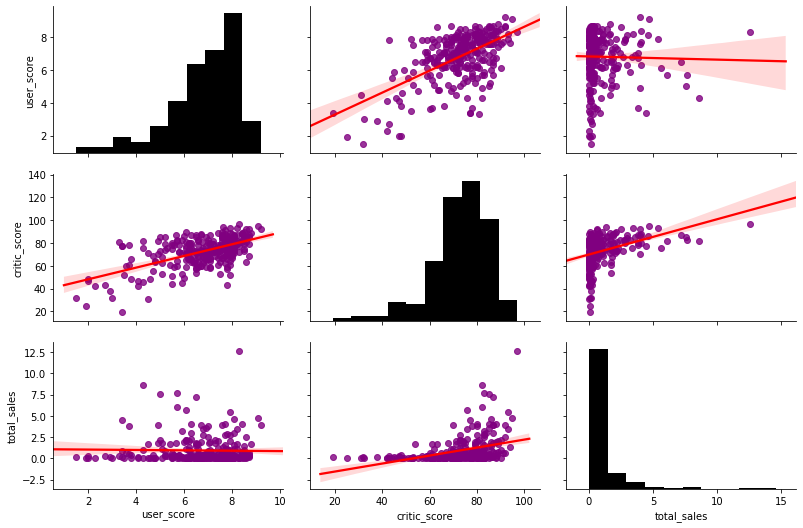

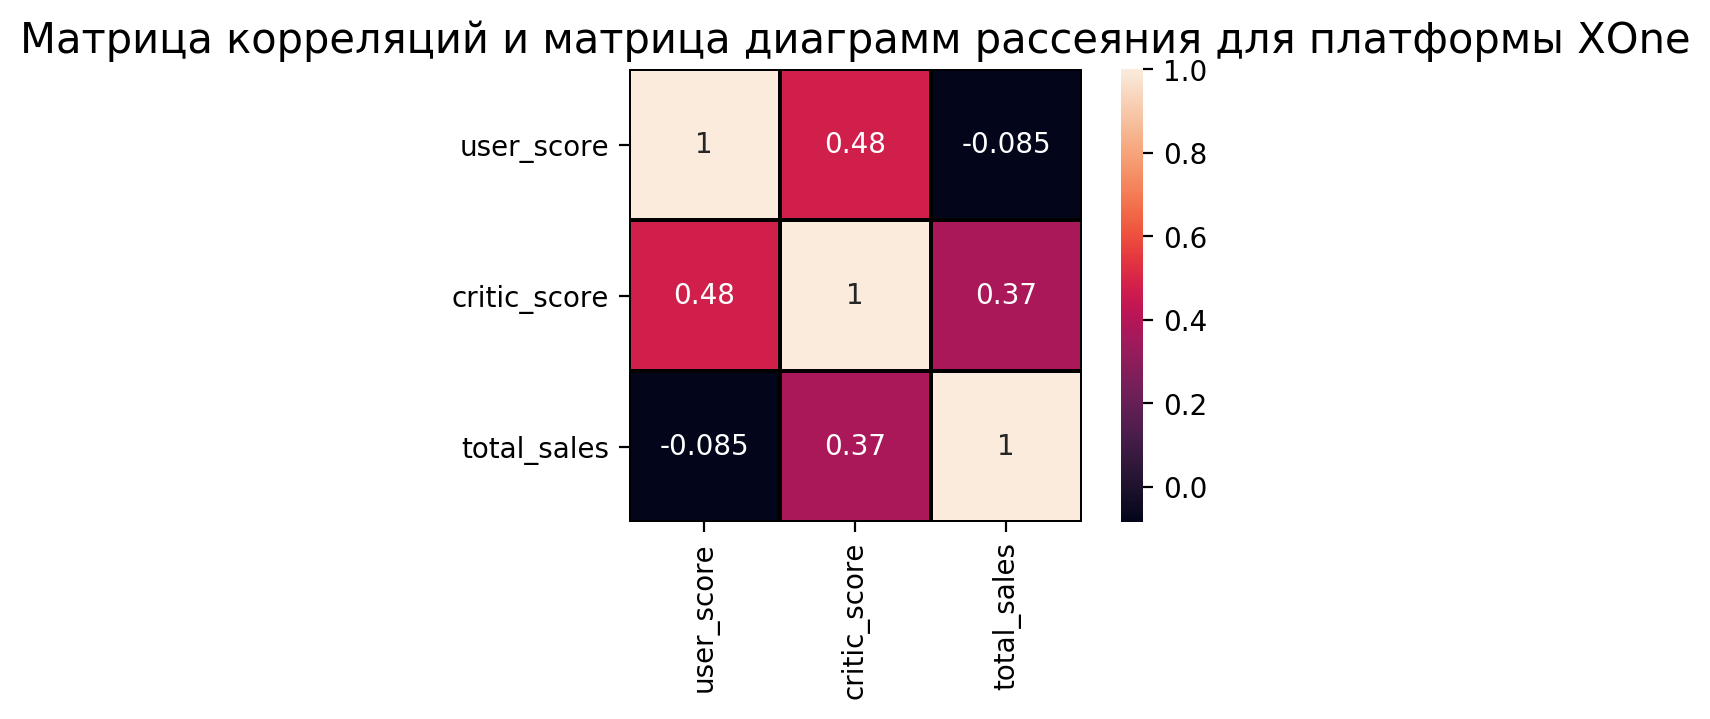

<Figure size 432x288 with 0 Axes>

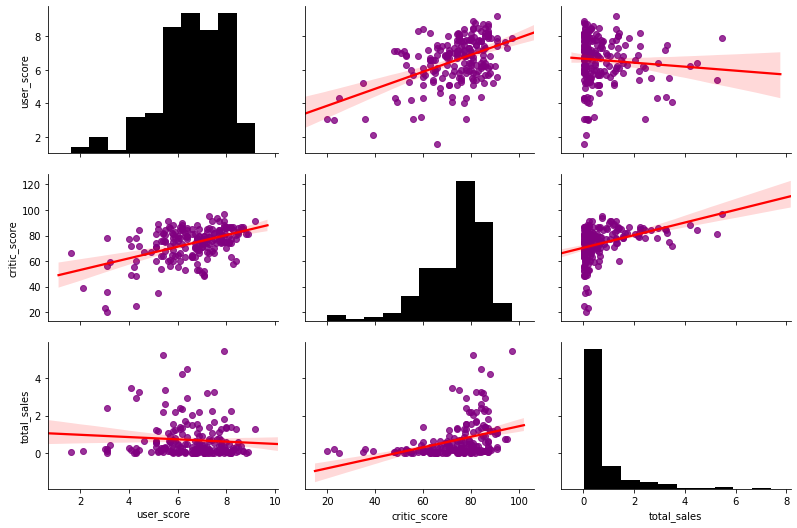

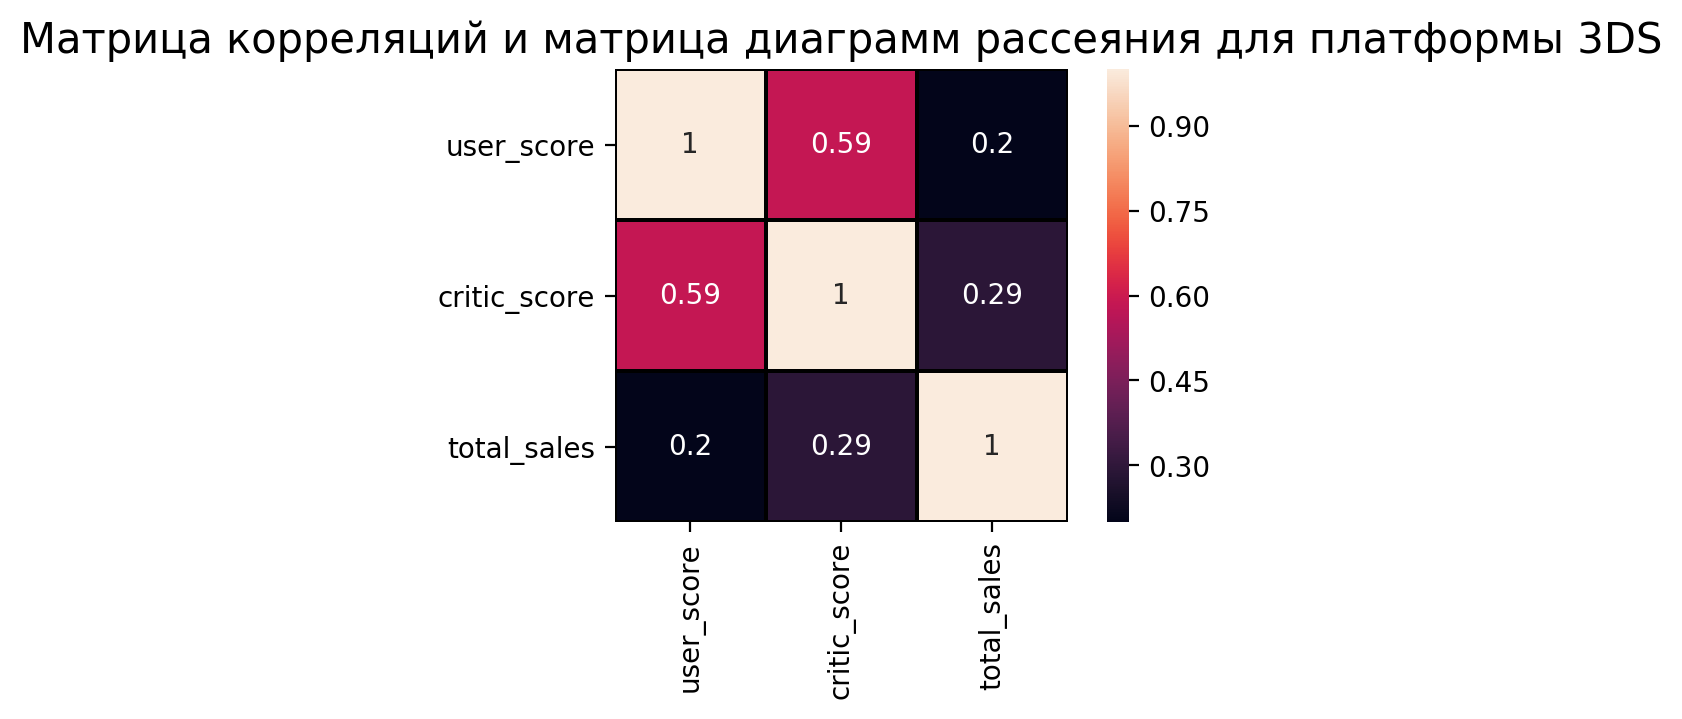

<Figure size 432x288 with 0 Axes>

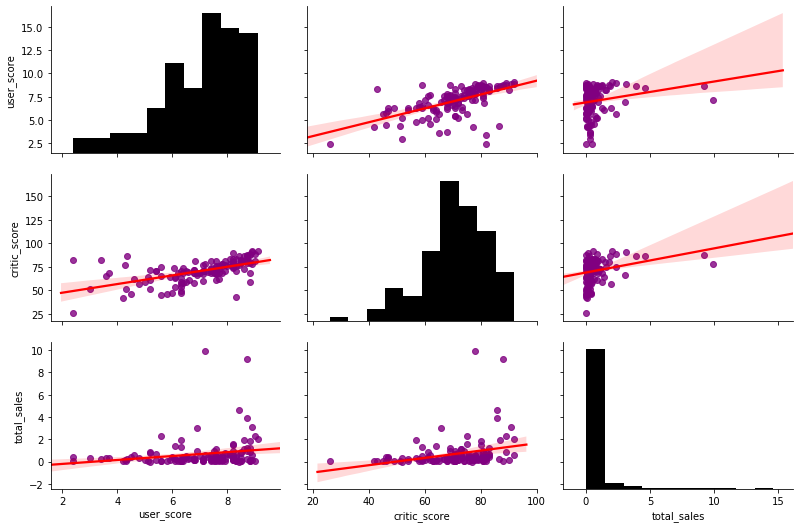

In [79]:
# Построение матрицы корреляций и матрицы диаграмм рассеяния для топовых платформ,
# используя функцию "score_sales":
for i, platform in list(enumerate(top_platforms)): 
    score_sales(relevant_data.query('user_score != 1000'), platform)

#### Вывод:
- По всем построенным графикам можно сказать, что оценки критиков незначительно влияют на суммарные продажи, в то время как влияние оценок пользователей стремится к 0.
- Этому может быть не сколько объяснений:
    - Логично предположить, что оценки критиков появляются раньше, чем оценки пользователей.
    - Тогда как, для сбора информации об оценках пользователей непосредственно пользователи должни купить о пробовать игру.
    - Выход некоторых игр ждут и покупают не зависимо от оценок, в то время как выход других игр имеет меньшую огласку (рекламу) и даже при высокой оценке не так популярна.
    - Гораздо интереснее посмотреть на то как влияют оценки по игре, на продажи ее продолжения или перевыпуска - здесь логично предположить, что влияние будет более выраженным.


<a href='#content'>*К содержанию*</a>


### <a id="step3.7"><a>3.7 Распределение игр по жанрам

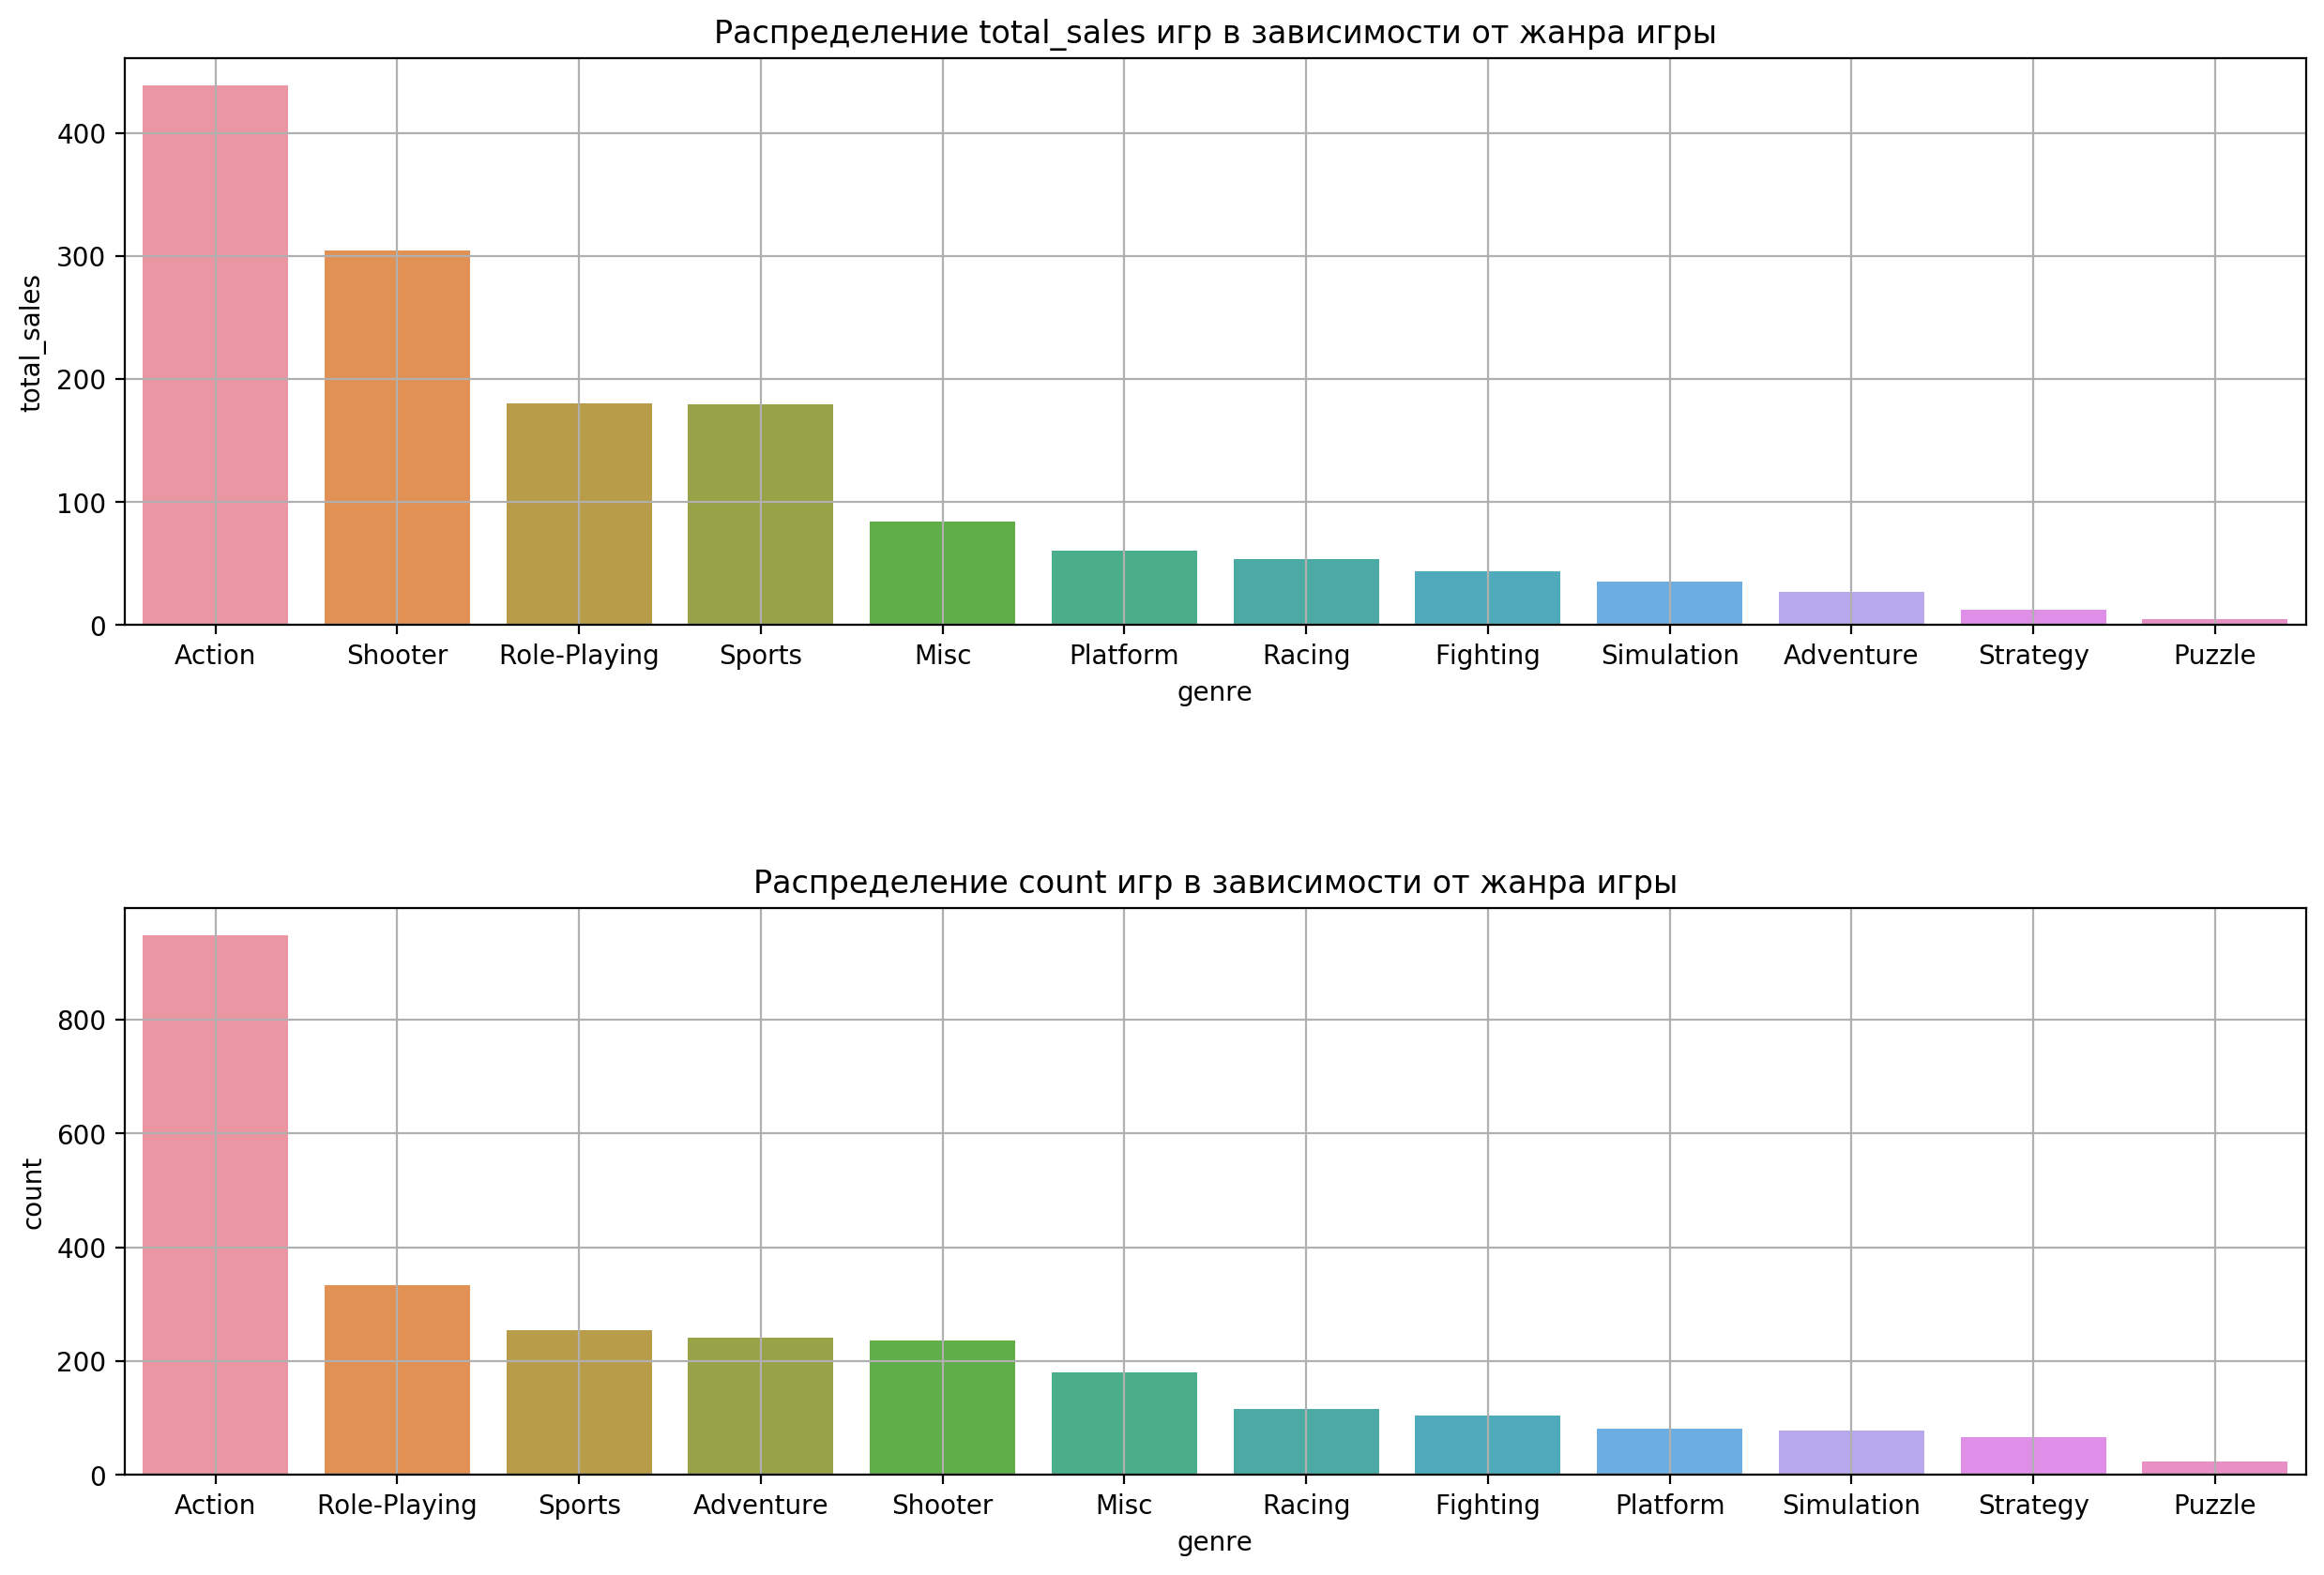

In [80]:
# Сводная таблица по суммарным продажам и количеством игр по жанрам:
pivot_genre = (relevant_data
               .pivot_table(index = 'genre', values = 'total_sales', aggfunc = ['sum', 'count'])
               .reset_index()
               )
pivot_genre.columns = ['genre', 'total_sales', 'count']

# Построение графиков:
plt.figure(figsize=(15, 10), dpi = 200)
plt.subplots_adjust(hspace=.5)
for i, value in list(enumerate(['total_sales', 'count'])):
    plt.subplot(2, 1, i+1)
    ax = sns.barplot(data=pivot_genre.sort_values(by = value, ascending = False), x='genre', y=value)
    ax.set_title('Распределение ' + value + ' игр в зависимости от жанра игры')
    ax.grid()
plt.show()
plt.close()



#### Вывод:
- По построенным графикам можно сказать, что жанр игры влияет на суммарные продажи:
    - Есть популярные жанры, для них, соответственно суммарным продажам: 'Action', 'Shooter', 'Role-Playing', 'Sports'
    - Что интересно отметить, что по количеству игр жанр 'Shooter' не входит в топ-4 - это говорит о том, что игры этого жанра продаются лучше
    - В то же время, для жанра 'Adventure' выходит достаточно много игр, но при этом суммарные продажи малы.


<a href='#content'>*К содержанию*</a>


### <a id="conclution3"><a>Общий вывод по шагу 3:

В данном разделе был проведен исследовательский анализ данных, по результатам которого можно сделать следующие выводы:
- "Срок жизни" игровых платформ составляет около 10 лет, за исключением "PC" - игры для этой платформы непрерывно выходят, начиная с 1994 г и скорее всего продолжат выходить дальше, хотя и их количество и суммарные продажи невелеки;
- Распределения суммарных продаж с течением времени для разных платформ имеет схожий характер: наблюдается рост в течении нескольких лет с момента появления платформы, затем снижение;
- В качестве актуальный периода для проведения анализа выбраны последние 5 лет;
- Для этого периода выбраны актуальные и потенциально прибыльные платформы;
- Лидирующие позиции занимают такие игровые платформы, как 'PS4', 'XOne', '3DS' (если оценивать сколько времени данные платформы еще будут актуальны, то для платформ 'PS4', 'XOne' - это еще 6 лет, тогда как для платформы '3DS' - это еще 4 года.
- При этом следует обратить внимание на то, что суммарные продажи по всем платформам, включая потенциально прибыльные, имеют тенденцию к падению, поэтому, следует ожидать выхода обновленных платформ.
- Что касается глобальных продаж по топовым платформам: в целом, не беря в расчет выбросы, можно сказать, что суммарные продажи по платформам "PS4" и "XOne" значительно выше, чем продажи игр для платформы "3DS".
- Влияние оценок критиков на суммарные продажи не сильно выражено, тогда как влияние оценок пользователей стремится к 0;
- При составлении прогноза на следующий год необходимо отдавать предпочтение играм со следующими жанрами: 'Action', 'Shooter', 'Role-Playing', 'Sports', как наиболее популярным и востребованным.

## <a id="step4"><a>Шаг 4. Портрет пользователя каждого региона

In [81]:
# Функция для построения графиков суммарных продаж по платформам, жанрам, рейтингу для выбранного региона и
# созданию сводной таблицы по топ 5 данных категорий:
def region_user(data, sales, region):
    """
    Функция принимает на вход таблицу, название столбца и название региона.
    Действие функции:
    - Создает пустую таблицу со столбцами ['platform_' + region, 'genre_' + region, 'rating_' + region]
    - В цикле по списку ['platform', 'genre', 'rating'] строит графики и добавляет в таблицу топ-5 значений
      на каждом шаге
    - Возвращает таблицу
    """
    # Создание таблицы:
    top = pd.DataFrame(columns = ['platform_' + region, 'genre_' + region, 'rating_' + region], data = [])
    
    # Создание основы для графиков с общим названием:
    fig = plt.figure(figsize=(15, 10), dpi = 200)
    fig.suptitle('Графики для региона ' + region, fontsize=20)
    plt.subplots_adjust(hspace=.5)
    
    # Цикл для построения подграфиков и добавления значений в таблицу
    for i, value in list(enumerate(['platform', 'genre', 'rating'])):
        # Создание сводной таблицы, по которой строится график:
        pivot = (data
                 .pivot_table(index = value, values = sales, aggfunc = 'sum')
                 .reset_index()
                 .sort_values(by = sales, ascending = False)
                )
        # Добавление топ-5 значений в таблицу "top":
        top[value + '_'  + region] = pivot[value].head(5).reset_index(drop=True)
        
        # Построение подграфика:
        plt.subplot(3, 1, i+1)
        ax = sns.barplot(data=pivot, x=value, y=sales)
        ax.set_title('Распределение продаж игр в зависимости от ' + value + ' для региона ' + region)
        ax.grid()
    plt.show()
    plt.close()
    
    return top
    

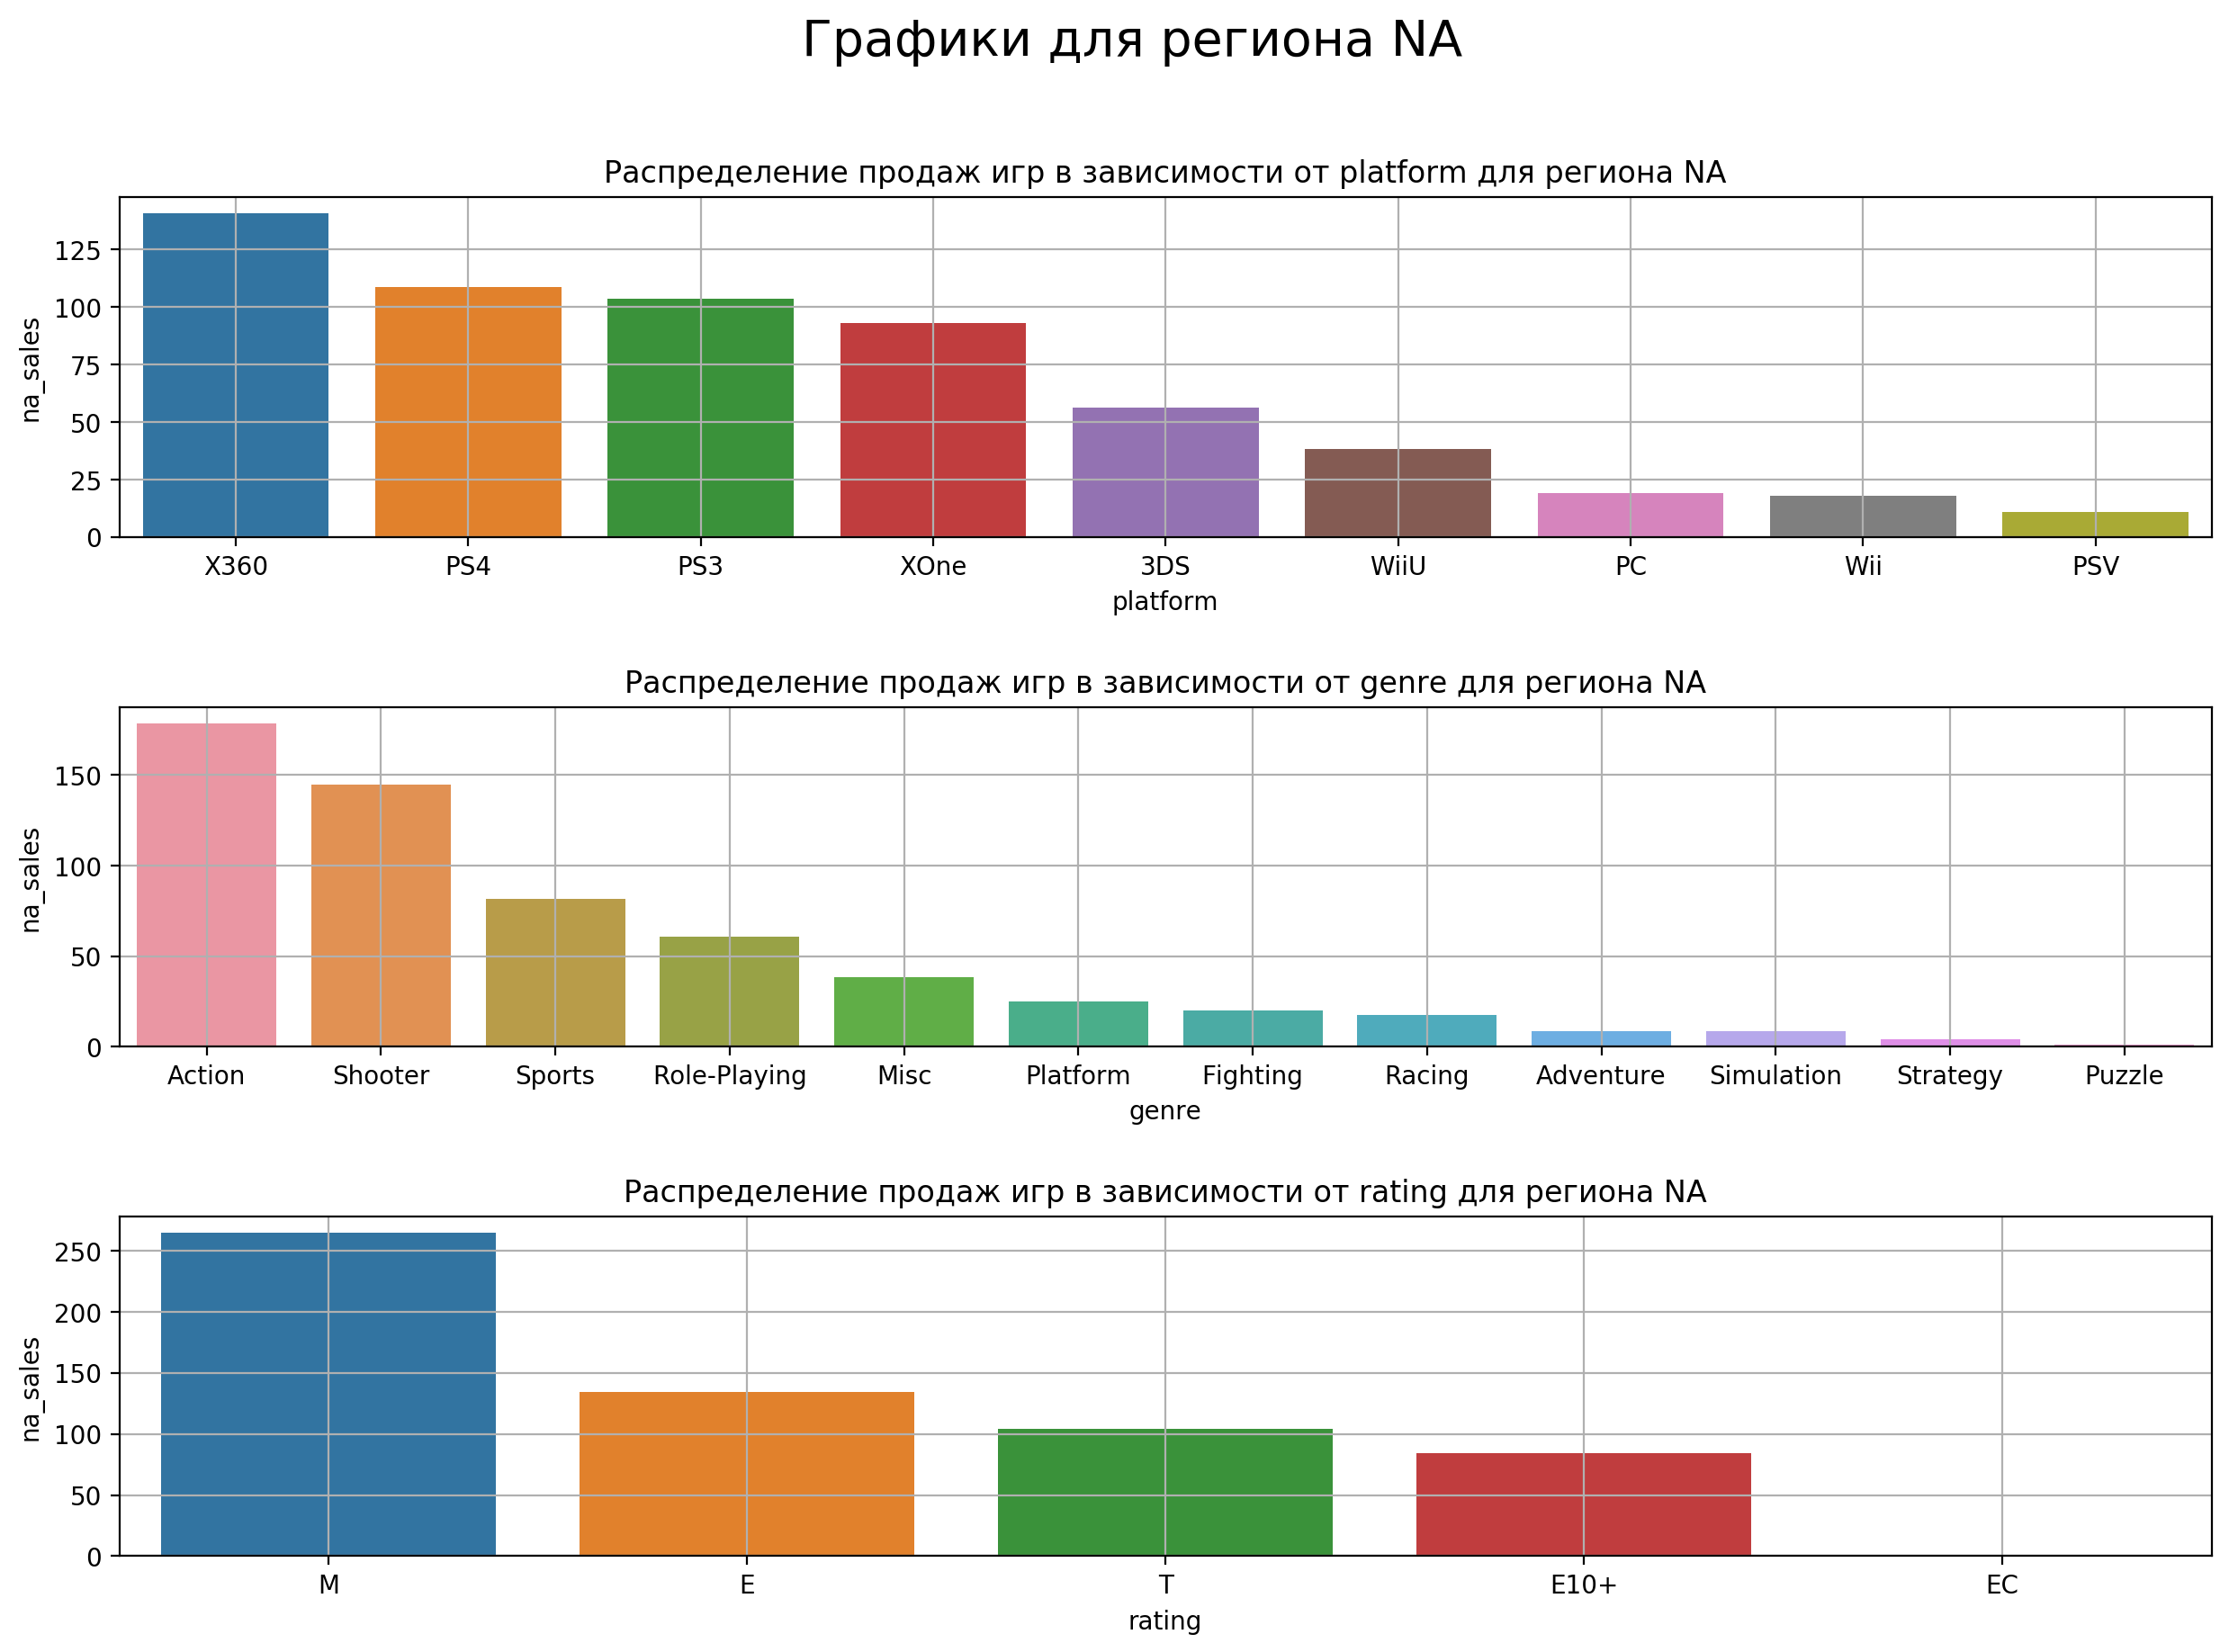

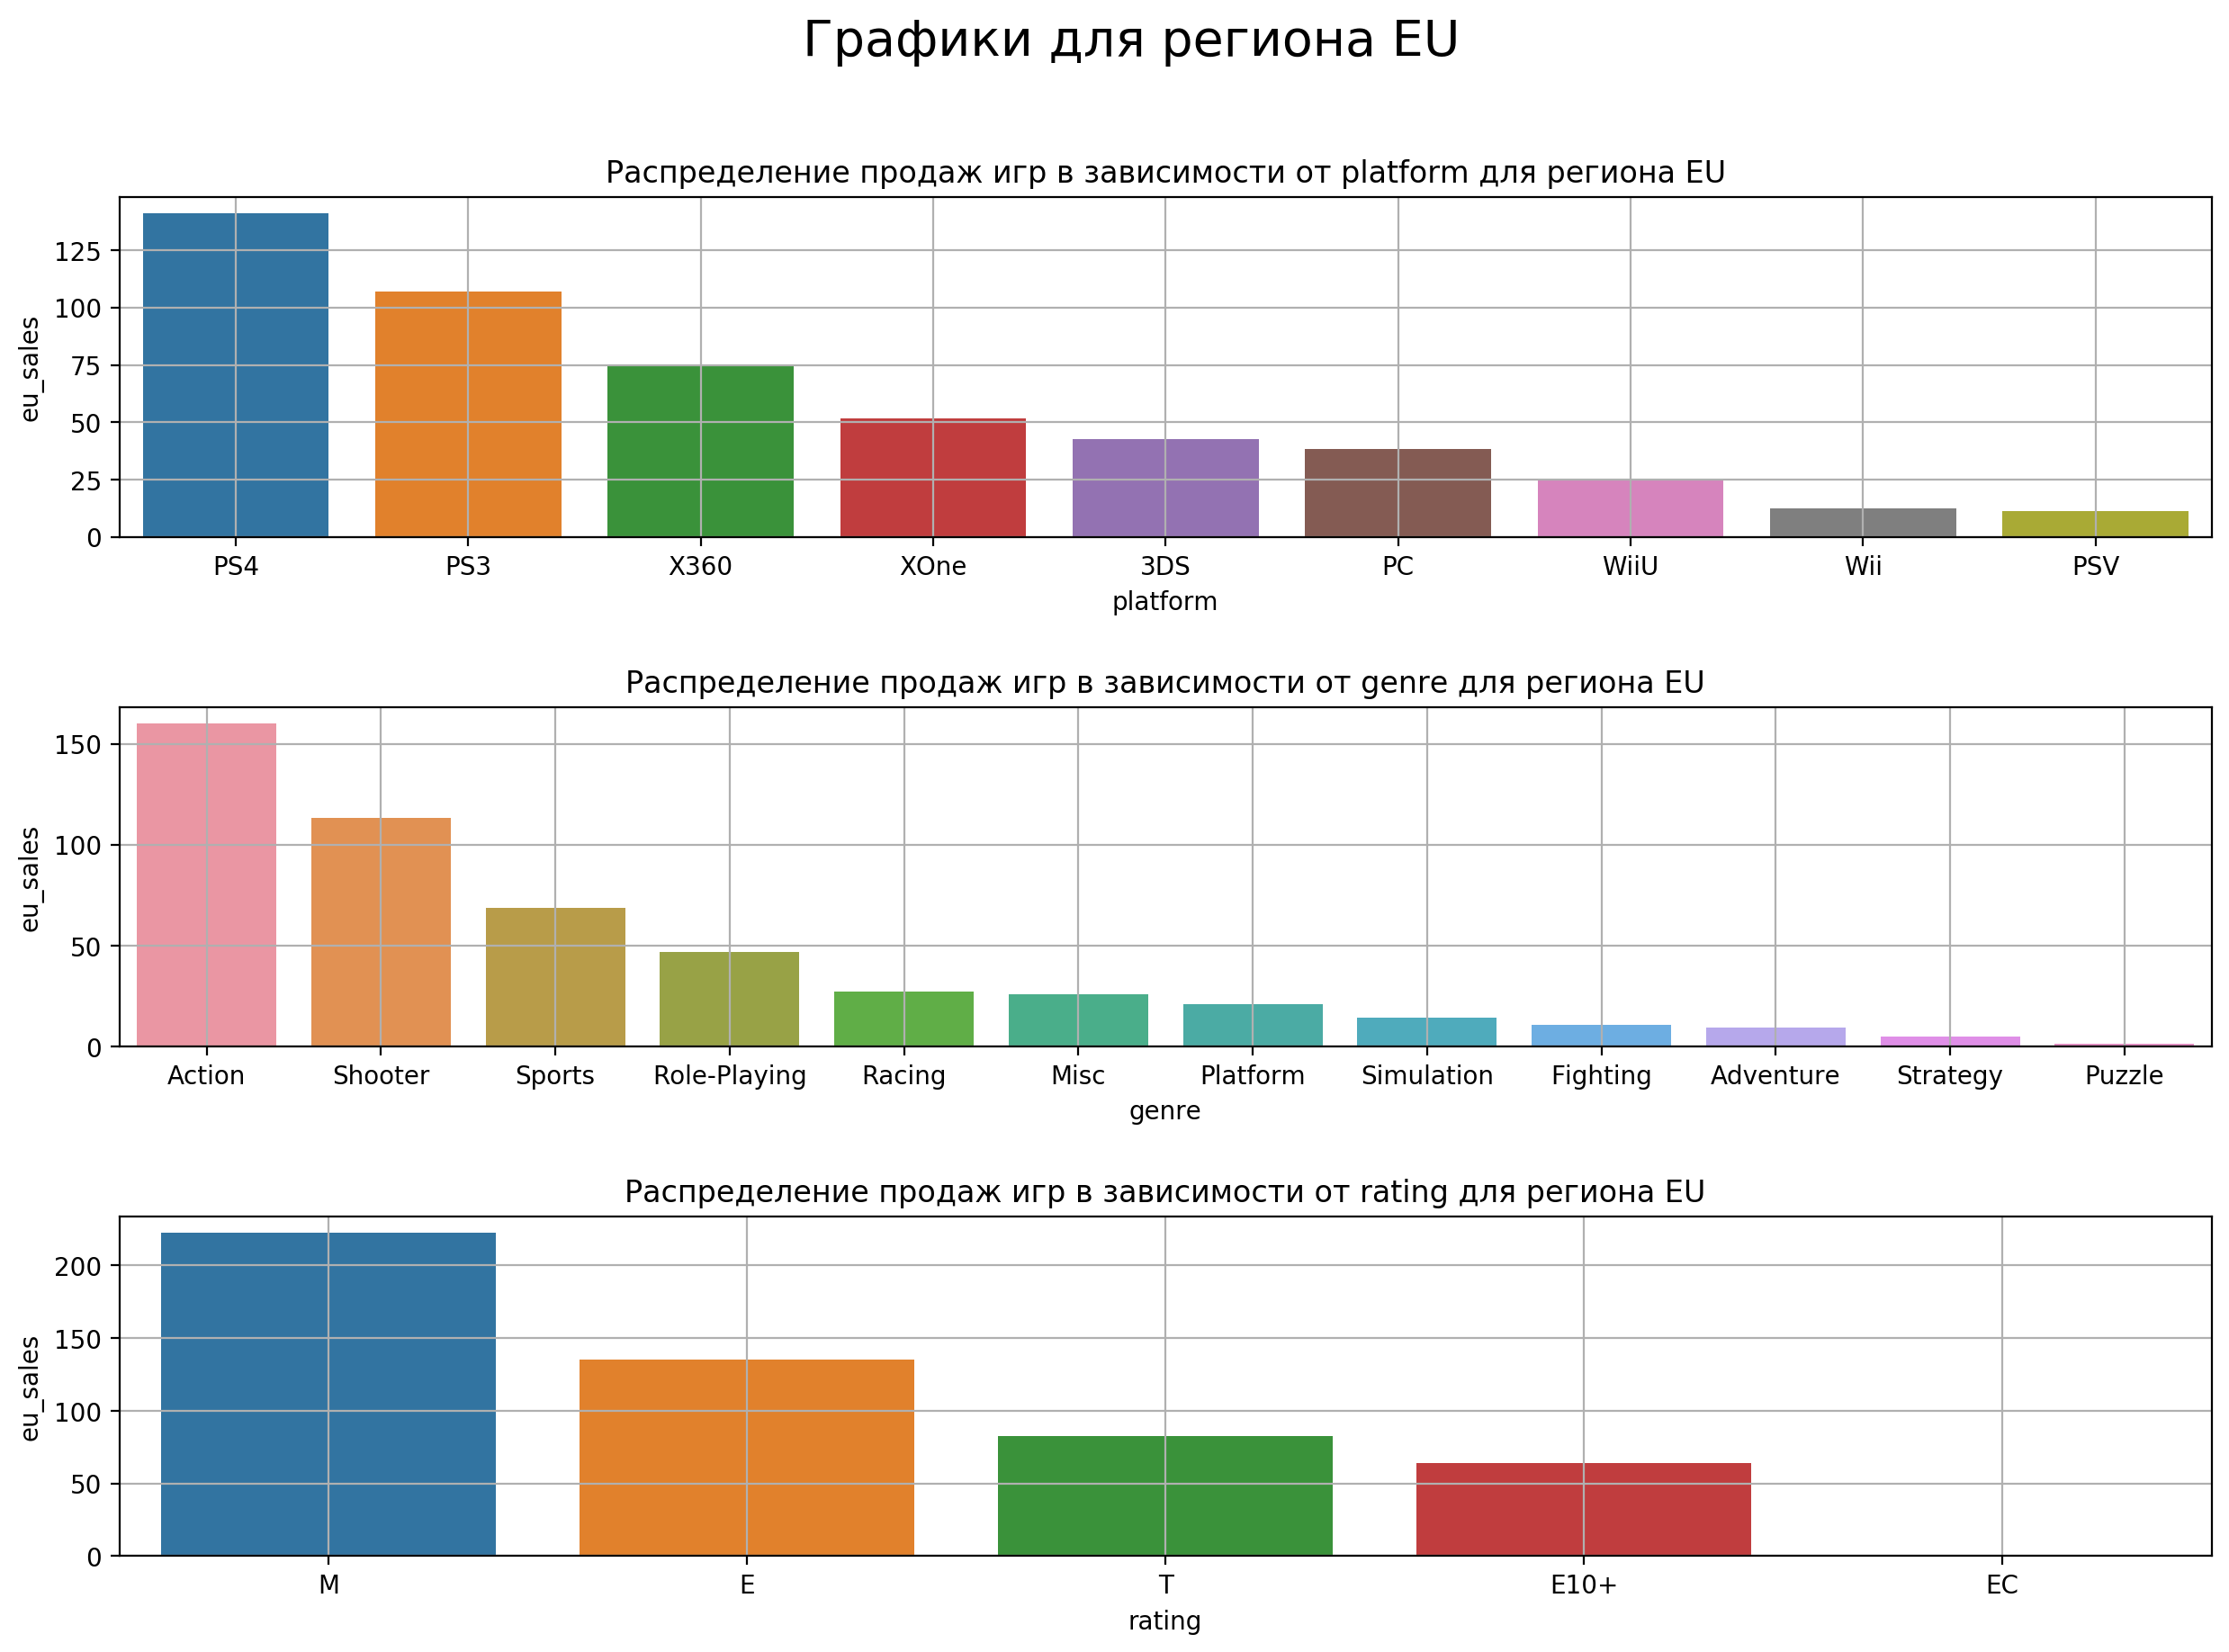

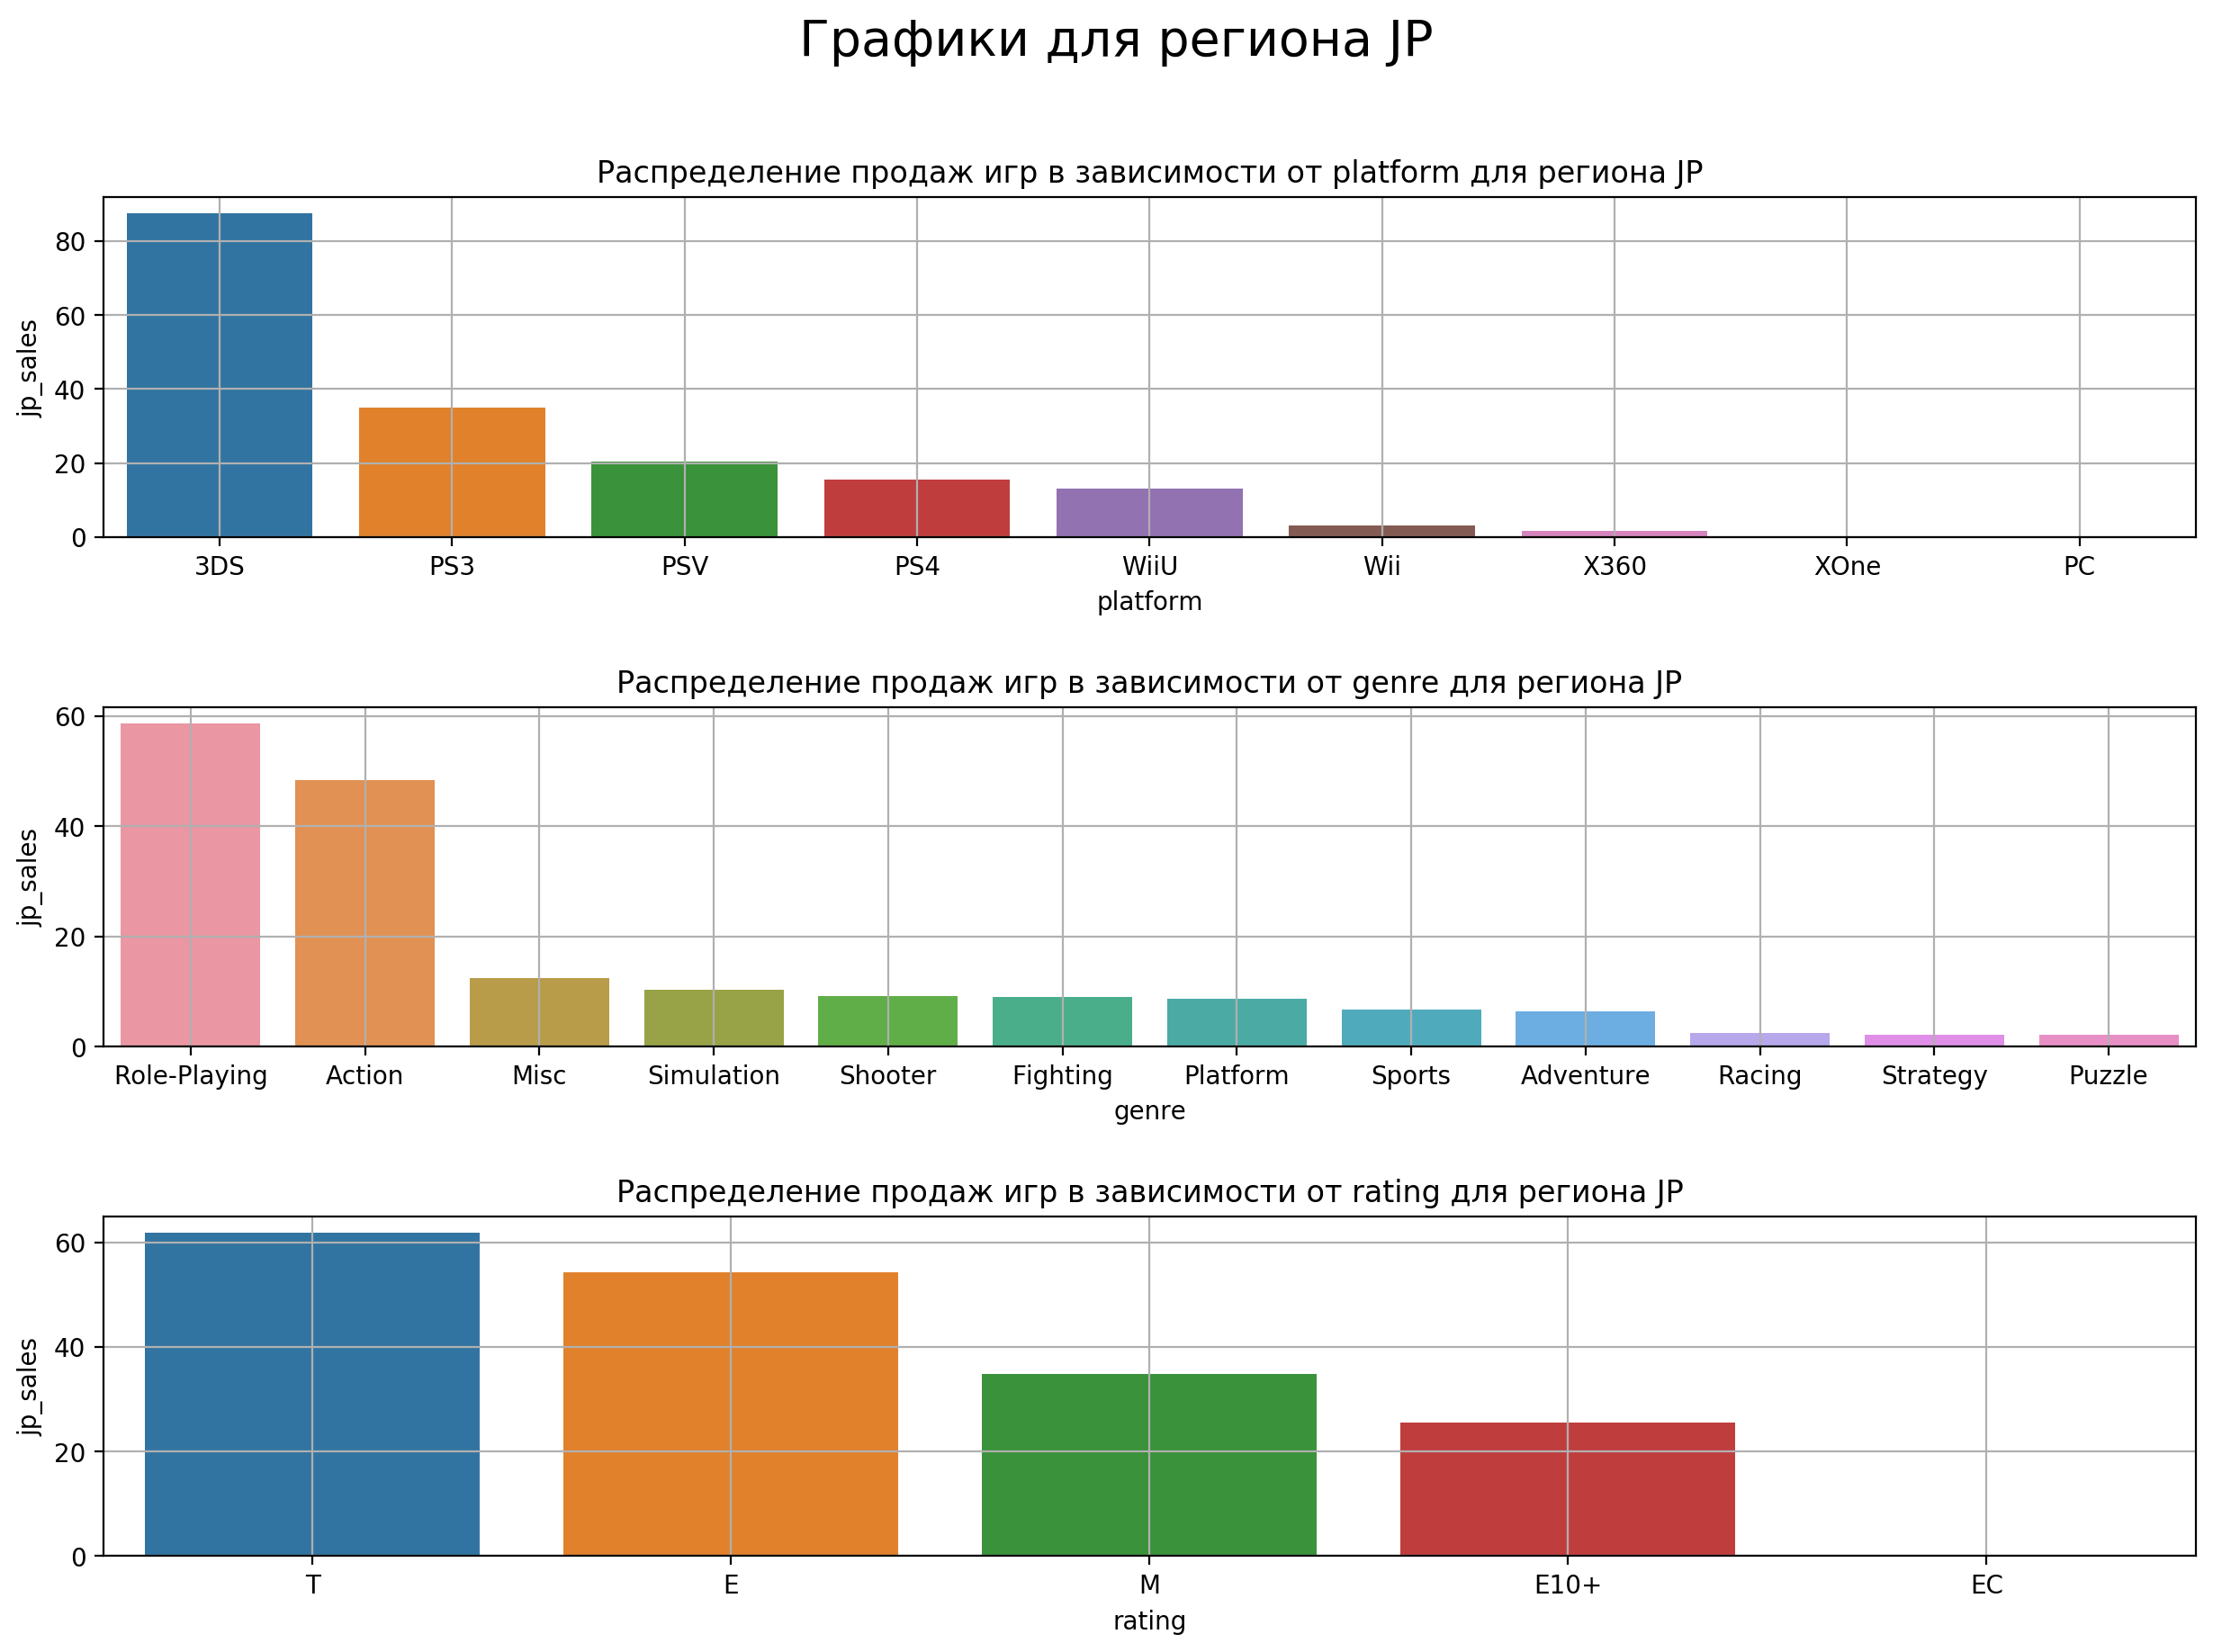

position platform_NA      genre_NA rating_NA platform_EU      genre_EU  \
0         1        X360        Action         M         PS4        Action   
1         2         PS4       Shooter         E         PS3       Shooter   
2         3         PS3        Sports         T        X360        Sports   
3         4        XOne  Role-Playing      E10+        XOne  Role-Playing   
4         5         3DS          Misc        EC         3DS        Racing   

  rating_EU platform_JP      genre_JP rating_JP  
0         M         3DS  Role-Playing         T  
1         E         PS3        Action         E  
2         T         PSV          Misc         M  
3      E10+         PS4    Simulation      E10+  
4        EC        WiiU       Shooter        EC

In [82]:
# Создание словаря - {название региона: название столбца}:
region_dict = {'NA': 'na_sales', 'EU': 'eu_sales', 'JP': 'jp_sales'}
# Создание первого столбца для общей таблицы для дальнейшего присоединение таблиц по каждому региону:
top5_by_region = pd.DataFrame(columns = ['position'], data = [1, 2, 3, 4, 5])

# Цикл по значениям в словаре:
for key in region_dict:
    summary_table = region_user(relevant_data, region_dict[key], key)
    top5_by_region = top5_by_region.join(summary_table)
    
display (top5_by_region)    


### <a id="conclution4"><a>Общий вывод по шагу 4:

По полученным данным можно сказать, что пользователи в разных регионах отличаются по своим предпочтениям:
- Больше всего выделяются пользователи региона "JP" (Япония): лидирующее место, со значительным отрывом имеет платформа "3DS", они отдают предпочтение играм жанров "Role-Playing" и "Action" и чаще всего выбирают игры с рейтингом "T"
- Пользователи регионов "NA" (Северная Америка) и "EU" (Европа) полностью сходятся в своих предпочтениях по жанру и возрастному рейтингу, отличаются лишь выбором платформы: для "NA" наиболее популярная платформа - это "X360", тогда как для региона "EU" - это "PS4"
- Полученные данные по предпочтениям игровых платформ по регионам подтвердает наш вывод по пункту <a href='#step3.5'>3.5 Глобальные продажи игр в разбивке по платформам</a> о суммах продаж по игровым платформам, а именно: логично предположить, что уровни продаж в регионе "JP" не такой большой (именно в этом регионе популярна платформа "3DS"), по сравнению с уровнями продаж в регионах "NA" и "EU", где данная платформа занимает лишь 5 место, в то время как платформы "X360" и "PS4" являются лидерами, либо располагаются на 2-3 месте.


<a href='#content'>*К содержанию*</a>


## <a id="step5"><a>Шаг 5. Проверка гипотез

### <a id="step5.1"><a>5.1 Сравнение пользовательских рейтингов платформ Xbox One и PC

**H0 :** Средний пользовательский рейтинг платформы Xbox One равен среднему пользовательскому рейтингу PC

**H1 :** Средний пользовательский рейтинг платформы Xbox One отличается от  среднего пользовательского рейтинга PC

In [83]:
# Функция для проведения статистического теста сравнения двух средних:
def H0_check(array1, array2, alpha, equal_var):
    '''
    Функция принимает на вход два набора данных 
    и значение уровня статистической значимости.
    Действие функции:
    - Вычисляет и выводит средние значения по каждой выборке.
    - Для проверки нулевой гипотезы проводит t-тест.
    - Выводит результат проведения статистического теста.
    '''
    
    print ('Среднее значение для первого набора данных: {:.2f}'.format(array1.mean()))
    print ('Среднее значение для второго набора данных: {:.2f}'.format(array2.mean()))
    
    result = st.ttest_ind(array1, array2, equal_var=equal_var)
    print ('p - значение:', result.pvalue)

    if (result.pvalue < alpha):
        print ('Отвергаем нулевую гипотезу')
    else:
        print ('Не получется отвергнуть нулевую гипотезу')


In [84]:
# Создание набор данных для платформы "XOne" (исключаем пропуски и метки "1000" в столбце "user_score"):
relevant_data_XOne = (relevant_data
                      .query('platform == "XOne" & user_score != 1000 & user_score.isna() != True')['user_score']
                     )

# Создание набор данных для платформы "PC" (исключаем пропуски и метки "1000" в столбце "user_score"):
relevant_data_PC = (relevant_data
                    .query('platform == "PC" & user_score != 1000 & user_score.isna() != True')['user_score']
                   )
# Расчет и вывод значений дисперсий:
var_est_XOne = np.var(relevant_data_XOne, ddof = 1)
print ('Дисперсия "user_score" для "XOne" = ', var_est_XOne)
var_est_PC = np.var(relevant_data_PC, ddof = 1)
print ('Дисперсия "user_score" для "PC" = ', var_est_PC)


Дисперсия "user_score" для "XOne" =  1.8917261793323055
Дисперсия "user_score" для "PC" =  2.772101478905552


In [85]:
# Вызов функции "H0_check()" для проверки нулевой гипотезы:
H0_check(relevant_data_XOne, relevant_data_PC, 0.05, False)

Среднее значение для первого набора данных: 6.58
Среднее значение для второго набора данных: 6.45
p - значение: 0.38524854854348356
Не получется отвергнуть нулевую гипотезу


#### Вывод:
- По результатам статистического теста не получается отвергнуть нулевую гипотезу о том, что "H0 : Средний пользовательский рейтинг платформы Xbox One равен среднему пользовательскому рейтингу PC"


<a href='#content'>*К содержанию*</a>


### <a id="step5.2"><a>5.2 Средние пользовательские рейтинги жанров Action и Sports разные.

**H0 :** Средний пользовательский рейтинг жанра Action равен среднему пользовательскому рейтингу жанра Sports

**H1 :** Средний пользовательский рейтинг жанра Action отличается от  среднего пользовательского рейтинга жанра Sports


In [86]:
# Создание набор данных для жанра "Action" (исключаем пропуски и метки "1000" в столбце "user_score"):
relevant_data_Action= (relevant_data
                        .query('genre == "Action" & user_score != 1000 & user_score.isna() != True')['user_score']
                       )
# Создание набор данных для жанра "Sports" (исключаем пропуски и метки "1000" в столбце "user_score"):
relevant_data_Sports = (relevant_data
                       .query('genre == "Sports" & user_score != 1000 & user_score.isna() != True')['user_score']
                      )

# Расчет и вывод значений дисперсий:
var_est_Action = np.var(relevant_data_Action, ddof = 1)
print ('Дисперсия "user_score" для "Action" = ', var_est_Action)
var_est_Sports = np.var(relevant_data_Sports, ddof = 1)
print ('Дисперсия "user_score" для "Sports" = ', var_est_Sports)


Дисперсия "user_score" для "Action" =  1.8452510428722995
Дисперсия "user_score" для "Sports" =  2.974452625760088


In [87]:
# Вызов функции "H0_check()" для проверки нулевой гипотезы:
H0_check(relevant_data_Action, relevant_data_Sports, 0.05, False)

Среднее значение для первого набора данных: 6.89
Среднее значение для второго набора данных: 5.47
p - значение: 1.716155852391553e-22
Отвергаем нулевую гипотезу


#### Вывод:
- По результатам проведенного статичтического теста отвергаем нулевую гипотезу и принимаем альтернативную: "H1 : Средний пользовательский рейтинг жанра Action отличается от среднего пользовательского рейтинга жанра Sports"


<a href='#content'>*К содержанию*</a>


### <a id="step6"><a>Шаг 6. Общий вывод

- В целом, была проведена большая работа по подготовке данных к исследовательскому анализу и проверке выдвинутых гипотез.
- При планировании кампании на следующих год, необходимо, прежде всего учитывать регион.
- Для Японии предпочтение необходимо отдавать играм жанров "Role-Playing" и "Action" с рейтингом "T" выпускаемых для платформы "3DS"
- Выбор жанров и рейтинга для Европы и Северной Америки совпадает: жанры 'Action', 'Shooter', 'Sports' с рейтингом "M"
- Для Европейского рынка следует отдавать предпочтение платформам "PS4" и "X360" (хотя "PS3" и находится на второй позиции, игры для нее уже выпускаются в течение 11 лет и продажи за последний год минимальны)
- Для Северной Америки предпочтение следуетс отдать этим же платформам, но в другом порядке.
- Во всех регионах будут востребованы игры с рейтингом "Е".
- Следует иметь ввиду и возможное скорое обновление игровых платформ.
- Не стоит забывать о играх для "PC" - хотя их продажи и выпуск значительно отличаются в меньшую сторону по сравнению с топовыми платформами, он отличаются некой стабильностью.
- Что касается оценок: оценки критиков влияют на продажи незначительно, но все же рассчитывать, что игра с заведомо низкой оценкой будет иметь высокие продажи не стоит.